# 1. Data Exploration

In [1]:
# Importing libraries 
# importing libraries
!pip install missingno
import pandas as pd # importing, data manipulation, subsetting
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# reading in the csv file 
data = pd.read_csv("database.csv")

data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_31424\4287007425.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("database.csv")


Record ID Agency Code Agency Name       Agency Type       City   State  \
0          1     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
1          2     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
2          3     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
3          4     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
4          5     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   

   Year    Month  Incident              Crime Type  ... Victim Ethnicity  \
0  1980  January         1  Murder or Manslaughter  ...          Unknown   
1  1980    March         1  Murder or Manslaughter  ...          Unknown   
2  1980    March         2  Murder or Manslaughter  ...          Unknown   
3  1980    April         1  Murder or Manslaughter  ...          Unknown   
4  1980    April         2  Murder or Manslaughter  ...          Unknown   

  Perpetrator Sex  Perpetrator Age               Perpetrator Race  \
0            Male               15  Native American/Alaska Native   
1            Male               42                          White   
2         Unknown                0                        Unknown   
3            Male               42                          White   
4         Unknown                0                        Unknown   

  Perpetrator Ethnicity  Relationship         Weapon Victim Count  \
0               Unknown  Acquaintance   Blunt Object            0   
1               Unknown  Acquaintance  Strangulation            0   
2               Unknown       Unknown        Unknown            0   
3               Unknown  Acquaintance  Strangulation            0   
4               Unknown       Unknown        Unknown            0   

  Perpetrator Count Record Source  
0                 0           FBI  
1                 0           FBI  
2                 0           FBI  
3                 0           FBI  
4                 1           FBI  

[5 rows x 24 columns]

In [7]:
from pyspark.sql import SparkSession

# Initialize a Spark session
spark = SparkSession.builder.appName("US_Homicide_Report").getOrCreate()

# Read the CSV file into a PySpark DataFrame
data = spark.read.csv("database.csv", header=True, inferSchema=True)

# Show the first few rows of the DataFrame (equivalent to pandas' head())
data.show(5)

+---------+-----------+-----------+----------------+---------+------+----+-------+--------+--------------------+------------+----------+----------+--------------------+----------------+---------------+---------------+--------------------+---------------------+------------+-------------+------------+-----------------+-------------+
|Record ID|Agency Code|Agency Name|     Agency Type|     City| State|Year|  Month|Incident|          Crime Type|Crime Solved|Victim Sex|Victim Age|         Victim Race|Victim Ethnicity|Perpetrator Sex|Perpetrator Age|    Perpetrator Race|Perpetrator Ethnicity|Relationship|       Weapon|Victim Count|Perpetrator Count|Record Source|
+---------+-----------+-----------+----------------+---------+------+----+-------+--------+--------------------+------------+----------+----------+--------------------+----------------+---------------+---------------+--------------------+---------------------+------------+-------------+------------+-----------------+-------------+
|

In [6]:
# Data inspection
# Most of the data is categorical 
# from our output and warning we see that "Perpetrator Age" column is considered and object while it should be an integer
# no-null values found yet 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int64 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

In [8]:
# Print the schema (provides column names and data types)
data.printSchema()

root
 |-- Record ID: integer (nullable = true)
 |-- Agency Code: string (nullable = true)
 |-- Agency Name: string (nullable = true)
 |-- Agency Type: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: string (nullable = true)
 |-- Incident: integer (nullable = true)
 |-- Crime Type: string (nullable = true)
 |-- Crime Solved: string (nullable = true)
 |-- Victim Sex: string (nullable = true)
 |-- Victim Age: integer (nullable = true)
 |-- Victim Race: string (nullable = true)
 |-- Victim Ethnicity: string (nullable = true)
 |-- Perpetrator Sex: string (nullable = true)
 |-- Perpetrator Age: string (nullable = true)
 |-- Perpetrator Race: string (nullable = true)
 |-- Perpetrator Ethnicity: string (nullable = true)
 |-- Relationship: string (nullable = true)
 |-- Weapon: string (nullable = true)
 |-- Victim Count: integer (nullable = true)
 |-- Perpetrator Count: integer (nullable = true)
 |

In [4]:
# Looking into perpetrator age 
# notice strings, spaces and too small ages for perpetrators 
data['Perpetrator Age'].unique()


array([15, 42, 0, 36, 27, 35, 40, 49, 39, 29, 19, 23, 33, 26, 41, 28, 61,
       25, 7, 17, 34, 21, 43, 38, 66, 32, 37, 22, 30, 24, 65, 51, 60, 45,
       64, 18, 20, 44, 73, 62, 69, 52, 16, 90, 56, 47, 57, 31, 46, 14, 55,
       50, 54, 68, 77, 53, 67, 48, 76, 58, 71, 63, 89, 13, 75, 72, 93, 59,
       10, 11, 79, 74, 99, 70, 78, 80, 9, 12, 81, 6, 87, 82, 83, 8, 84,
       85, 86, 5, 3, 1, 88, 95, 4, 91, 92, 96, 94, 2, 98, 97, '22', '52',
       '21', '0', '25', '61', '32', '28', '20', '38', '18', '17', '53',
       '30', '24', '84', '43', '16', '47', '54', '50', '42', '23', '36',
       '35', '60', '27', '19', '14', '57', '63', '81', '31', '58', '51',
       '15', '40', '33', '26', '41', '29', '34', '37', '69', '44', '48',
       '55', '49', '56', '39', '45', '65', '59', '70', '46', '11', '77',
       '67', '76', '85', '72', '13', '89', '74', '71', '64', '62', '3',
       '80', '73', '75', '83', '78', '68', '66', '86', '87', '95', '90',
       '6', '12', '99', '88', '9', '93', '10', 

In [9]:
# Select the 'Perpetrator Age' column and get distinct values
unique_perpetrator_ages = data.select('Perpetrator Age').distinct()

# Show the unique values
unique_perpetrator_ages.show(truncate=False)

+---------------+
|Perpetrator Age|
+---------------+
|7              |
|51             |
|15             |
|54             |
|11             |
|29             |
|69             |
|42             |
|73             |
|87             |
|64             |
|3              |
|30             |
|34             |
|59             |
|8              |
|28             |
|22             |
|85             |
|35             |
+---------------+
only showing top 20 rows



In [5]:
# Count the values for each unique age
# notice a lot of 0 values 
data['Perpetrator Age'].value_counts()

0     211079
20     21158
19     19807
21     18509
18     18477
       ...  
9          1
88         1
89         1
95         1
1          1
Name: Perpetrator Age, Length: 191, dtype: int64

In [10]:
from pyspark.sql.functions import col

# Group by 'Perpetrator Age' and count the occurrences
age_counts = data.groupBy('Perpetrator Age').count()

# Order by count in descending order to mimic pandas' value_counts()
age_counts_ordered = age_counts.orderBy(col('count').desc())

# Show the result
age_counts_ordered.show(truncate=False)

+---------------+------+
|Perpetrator Age|count |
+---------------+------+
|0              |216327|
|20             |21625 |
|19             |20250 |
|21             |18983 |
|18             |18834 |
|22             |18433 |
|23             |17604 |
|25             |17542 |
|24             |16379 |
|26             |14716 |
|17             |14196 |
|27             |14136 |
|30             |13611 |
|28             |13478 |
|29             |12468 |
|31             |10932 |
|32             |10821 |
|33             |9888  |
|35             |9693  |
|16             |9423  |
+---------------+------+
only showing top 20 rows



In [6]:
# Is the unsolved crime connected to some values 
data[data["Crime Solved"]=="No"].count()

Record ID                190282
Agency Code              190282
Agency Name              190282
Agency Type              190282
City                     190282
State                    190282
Year                     190282
Month                    190282
Incident                 190282
Crime Type               190282
Crime Solved             190282
Victim Sex               190282
Victim Age               190282
Victim Race              190282
Victim Ethnicity         190282
Perpetrator Sex          190282
Perpetrator Age          190282
Perpetrator Race         190282
Perpetrator Ethnicity    190282
Relationship             190282
Weapon                   190282
Victim Count             190282
Perpetrator Count        190282
Record Source            190282
dtype: int64

In [11]:
# Filter the DataFrame where "Crime Solved" is "No"
unsolved_crimes = data.filter(data["Crime Solved"] == "No")

# Count the number of occurrences for each column
unsolved_crime_counts = unsolved_crimes.count()

# Show the result
print(f"Number of unsolved crimes: {unsolved_crime_counts}")

Number of unsolved crimes: 190282


In [7]:
# Are unsolved crimes and 0 values for ages connected 
# almost all of the crimes that are not solved are market with 0 for the perpetrator age
data[(data["Crime Solved"]=="No") & (data["Perpetrator Age"]==0)].count()

Record ID                184980
Agency Code              184980
Agency Name              184980
Agency Type              184980
City                     184980
State                    184980
Year                     184980
Month                    184980
Incident                 184980
Crime Type               184980
Crime Solved             184980
Victim Sex               184980
Victim Age               184980
Victim Race              184980
Victim Ethnicity         184980
Perpetrator Sex          184980
Perpetrator Age          184980
Perpetrator Race         184980
Perpetrator Ethnicity    184980
Relationship             184980
Weapon                   184980
Victim Count             184980
Perpetrator Count        184980
Record Source            184980
dtype: int64

In [12]:
# Filter the DataFrame where "Crime Solved" is "No" and "Perpetrator Age" is 0
unsolved_crimes_with_zero_age = data.filter((data["Crime Solved"] == "No") & (data["Perpetrator Age"] == 0))

# Count the number of occurrences
count_unsolved_zero_age = unsolved_crimes_with_zero_age.count()

# Show the result
print(f"Number of unsolved crimes with perpetrator age 0: {count_unsolved_zero_age}")

Number of unsolved crimes with perpetrator age 0: 189627


In [13]:
# Filter the DataFrame where "Crime Solved" is "No" and "Perpetrator Ethnicity" is "Unknown"
unsolved_crimes_with_unknown_ethnicity = data.filter((data["Crime Solved"] == "No") & (data["Perpetrator Ethnicity"] == "Unknown"))

# Count the number of occurrences
count_unsolved_unknown_ethnicity = unsolved_crimes_with_unknown_ethnicity.count()

# Show the result
print(f"Number of unsolved crimes with unknown perpetrator ethnicity: {count_unsolved_unknown_ethnicity}")

Number of unsolved crimes with unknown perpetrator ethnicity: 190036


In [9]:
# Looking for mistakes in victim age - unique values
# notice 998
data['Victim Age'].unique()

array([ 14,  43,  30,  42,  99,  32,  38,  36,  20,  48,  31,  16,  33,
        27,  21,  60,  40,  18,   8,  25,  24,  46,  23,  22,  45,  26,
        58,  17,  29,  41,  68,  13,  35,  44,  54,  37,  51,  90,  50,
        52,  61,  63,  19,  28,  70,  72,  74,  53,  57,  76,  79,  69,
        34,  66,  55,  67,  65,  47,   1,  49,  62,  75,  56,  59,  78,
        39,  15,   0,  71,  77,   2,   4,  64,  82,  85,   6,   5,   7,
         9,  84,  10,  86,  11,  73,  83, 998,  81,  87,  80,   3,  12,
        94,  93,  92,  89,  97,  88,  91,  95,  98,  96], dtype=int64)

In [14]:
# Select the 'Victim Age' column and get distinct values
unique_victim_ages = data.select('Victim Age').distinct()

# Show the unique values
unique_victim_ages.show(truncate=False)

+----------+
|Victim Age|
+----------+
|31        |
|85        |
|65        |
|53        |
|78        |
|34        |
|81        |
|28        |
|76        |
|27        |
|26        |
|44        |
|12        |
|91        |
|22        |
|93        |
|47        |
|1         |
|52        |
|13        |
+----------+
only showing top 20 rows



In [10]:
# Count the values for each unique age
# here we do not see a lot of 0 values (more known values)
data['Victim Age'].value_counts()

22    23049
20    23031
25    22939
21    22796
23    22438
      ...  
94      116
95       82
97       39
96       37
98       33
Name: Victim Age, Length: 101, dtype: int64

In [15]:
# Group by 'Victim Age' and count the occurrences
victim_age_counts = data.groupBy('Victim Age').count()

# Order by count in descending order to mimic pandas' value_counts()
victim_age_counts_ordered = victim_age_counts.orderBy(col('count').desc())

# Show the result
victim_age_counts_ordered.show(truncate=False)

+----------+-----+
|Victim Age|count|
+----------+-----+
|22        |23049|
|20        |23031|
|25        |22939|
|21        |22796|
|23        |22438|
|19        |21939|
|24        |21830|
|26        |20469|
|27        |19465|
|30        |18966|
|18        |18469|
|28        |18199|
|29        |18037|
|32        |15812|
|31        |15762|
|33        |14463|
|35        |14314|
|34        |14296|
|17        |14030|
|36        |12502|
+----------+-----+
only showing top 20 rows



In [11]:
# There clearly is a pattern here as well 
data[(data["Crime Solved"]=="No") & (data["Victim Ethnicity"]=='Unknown')].count()

Record ID                113271
Agency Code              113271
Agency Name              113271
Agency Type              113271
City                     113271
State                    113271
Year                     113271
Month                    113271
Incident                 113271
Crime Type               113271
Crime Solved             113271
Victim Sex               113271
Victim Age               113271
Victim Race              113271
Victim Ethnicity         113271
Perpetrator Sex          113271
Perpetrator Age          113271
Perpetrator Race         113271
Perpetrator Ethnicity    113271
Relationship             113271
Weapon                   113271
Victim Count             113271
Perpetrator Count        113271
Record Source            113271
dtype: int64

In [16]:
# Filter the DataFrame where "Crime Solved" is "No" and "Victim Ethnicity" is "Unknown"
unsolved_crimes_with_unknown_victim_ethnicity = data.filter((data["Crime Solved"] == "No") & (data["Victim Ethnicity"] == "Unknown"))

# Count the number of occurrences
count_unsolved_unknown_victim_ethnicity = unsolved_crimes_with_unknown_victim_ethnicity.count()

# Show the result
print(f"Number of unsolved crimes with unknown victim ethnicity: {count_unsolved_unknown_victim_ethnicity}")

Number of unsolved crimes with unknown victim ethnicity: 113271


In [12]:
# Are unsolved crimes and 0 values for ages connected 
# almost all of the crimes that are not solved are market with 0 for the perpetrator age
data[(data["Crime Solved"]=="No") & (data["Relationship"]=='Unknown')].count()

Record ID                178121
Agency Code              178121
Agency Name              178121
Agency Type              178121
City                     178121
State                    178121
Year                     178121
Month                    178121
Incident                 178121
Crime Type               178121
Crime Solved             178121
Victim Sex               178121
Victim Age               178121
Victim Race              178121
Victim Ethnicity         178121
Perpetrator Sex          178121
Perpetrator Age          178121
Perpetrator Race         178121
Perpetrator Ethnicity    178121
Relationship             178121
Weapon                   178121
Victim Count             178121
Perpetrator Count        178121
Record Source            178121
dtype: int64

In [17]:
# Filter the DataFrame where "Crime Solved" is "No" and "Relationship" is "Unknown"
unsolved_crimes_with_unknown_relationship = data.filter((data["Crime Solved"] == "No") & (data["Relationship"] == "Unknown"))

# Count the number of occurrences
count_unsolved_unknown_relationship = unsolved_crimes_with_unknown_relationship.count()

# Show the result
print(f"Number of unsolved crimes with unknown relationship: {count_unsolved_unknown_relationship}")

Number of unsolved crimes with unknown relationship: 178121


In [18]:
# Select the 'Perpetrator Count' column and get distinct values
unique_perpetrator_counts = data.select('Perpetrator Count').distinct()

# Show the unique values
unique_perpetrator_counts.show(truncate=False)

+-----------------+
|Perpetrator Count|
+-----------------+
|1                |
|6                |
|3                |
|5                |
|9                |
|4                |
|8                |
|7                |
|10               |
|2                |
|0                |
+-----------------+



In [14]:
data[(data["Crime Solved"]=="No") & (data["Perpetrator Count"]==0)].count()

Record ID                184069
Agency Code              184069
Agency Name              184069
Agency Type              184069
City                     184069
State                    184069
Year                     184069
Month                    184069
Incident                 184069
Crime Type               184069
Crime Solved             184069
Victim Sex               184069
Victim Age               184069
Victim Race              184069
Victim Ethnicity         184069
Perpetrator Sex          184069
Perpetrator Age          184069
Perpetrator Race         184069
Perpetrator Ethnicity    184069
Relationship             184069
Weapon                   184069
Victim Count             184069
Perpetrator Count        184069
Record Source            184069
dtype: int64

In [19]:
# Filter the DataFrame where "Crime Solved" is "No" and "Perpetrator Count" is 0
unsolved_crimes_with_zero_perpetrators = data.filter((data["Crime Solved"] == "No") & (data["Perpetrator Count"] == 0))

# Count the number of occurrences
count_unsolved_zero_perpetrators = unsolved_crimes_with_zero_perpetrators.count()

# Show the result
print(f"Number of unsolved crimes with 0 perpetrators: {count_unsolved_zero_perpetrators}")

Number of unsolved crimes with 0 perpetrators: 184069


In [15]:
# Unique values for perpetrator count
data['Victim Count'].unique()

array([ 0,  2,  1,  3,  6,  4,  5,  9,  7,  8, 10], dtype=int64)

In [20]:
# Select the 'Victim Count' column and get distinct values
unique_victim_counts = data.select('Victim Count').distinct()

# Show the unique values
unique_victim_counts.show(truncate=False)

+------------+
|Victim Count|
+------------+
|1           |
|6           |
|3           |
|5           |
|9           |
|4           |
|8           |
|7           |
|2           |
|0           |
|10          |
+------------+



Here we take a look of how many unique states there are in the dataset. There is supposed to be only 50 so, let's take a closer look.

In [16]:
len(data['State'].unique())

51

In [21]:
# Select the 'State' column and get distinct values
unique_states = data.select('State').distinct()

# Count the number of unique values
num_unique_states = unique_states.count()

# Show the result
print(f"Number of unique states: {num_unique_states}")

Number of unique states: 51


District of Columbia is not a state. Although, it might be viable to keep it if it has enough data. 

In [17]:
data['State'].unique()

array(['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California',
       'Colorado', 'Connecticut', 'District of Columbia', 'Delaware',
       'Florida', 'Georgia', 'Hawaii', 'Iowa', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts',
       'Maryland', 'Maine', 'Michigan', 'Minnesota', 'Missouri',
       'Mississippi', 'Montana', 'Nebraska', 'North Carolina',
       'North Dakota', 'New Hampshire', 'New Jersey', 'New Mexico',
       'Nevada', 'New York', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhodes Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Virginia', 'Vermont', 'Washington', 'Wisconsin',
       'West Virginia', 'Wyoming'], dtype=object)

In [22]:
# Select the 'State' column and get distinct values
unique_states = data.select('State').distinct()

# Show the unique values
unique_states.show(truncate=False)

+--------------------+
|State               |
+--------------------+
|Utah                |
|Hawaii              |
|Minnesota           |
|Ohio                |
|Arkansas            |
|Oregon              |
|Texas               |
|North Dakota        |
|Pennsylvania        |
|Connecticut         |
|Nebraska            |
|Vermont             |
|Nevada              |
|Washington          |
|Illinois            |
|Oklahoma            |
|District of Columbia|
|Delaware            |
|Alaska              |
|New Mexico          |
+--------------------+
only showing top 20 rows



District of Columbia has a significant amount of observations so, we decided to treat it as a state.

In [18]:
data[data['State']=='District of Columbia'].count()

Record ID                7115
Agency Code              7115
Agency Name              7115
Agency Type              7115
City                     7115
State                    7115
Year                     7115
Month                    7115
Incident                 7115
Crime Type               7115
Crime Solved             7115
Victim Sex               7115
Victim Age               7115
Victim Race              7115
Victim Ethnicity         7115
Perpetrator Sex          7115
Perpetrator Age          7115
Perpetrator Race         7115
Perpetrator Ethnicity    7115
Relationship             7115
Weapon                   7115
Victim Count             7115
Perpetrator Count        7115
Record Source            7115
dtype: int64

In [23]:
# Filter the DataFrame where "State" is "District of Columbia"
dc_data = data.filter(data['State'] == 'District of Columbia')

# Count the number of occurrences
dc_data_count = dc_data.count()

# Show the result
print(f"Number of records for District of Columbia: {dc_data_count}")

Number of records for District of Columbia: 7115


In [19]:
# no null values found
# that does not mean there are no mistakes 
data.isnull().sum()

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

In [24]:
from pyspark.sql.functions import col, sum as _sum, when

# Create a DataFrame that counts the number of nulls in each column
null_counts = data.select([_sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in data.columns])

# Show the number of nulls for each column
null_counts.show()

+---------+-----------+-----------+-----------+----+-----+----+-----+--------+----------+------------+----------+----------+-----------+----------------+---------------+---------------+----------------+---------------------+------------+------+------------+-----------------+-------------+
|Record ID|Agency Code|Agency Name|Agency Type|City|State|Year|Month|Incident|Crime Type|Crime Solved|Victim Sex|Victim Age|Victim Race|Victim Ethnicity|Perpetrator Sex|Perpetrator Age|Perpetrator Race|Perpetrator Ethnicity|Relationship|Weapon|Victim Count|Perpetrator Count|Record Source|
+---------+-----------+-----------+-----------+----+-----+----+-----+--------+----------+------------+----------+----------+-----------+----------------+---------------+---------------+----------------+---------------------+------------+------+------------+-----------------+-------------+
|        0|          0|          0|          0|   0|    0|   0|    0|       0|         0|           0|         0|         0|      

.describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.
Here we see that mean victim age is 35. Moreover, we spot the error for its max value of 998. 75% of the data is for the victims below the age of 42.

In [20]:
data.describe()

Record ID           Year       Incident     Victim Age  \
count  638454.00000  638454.000000  638454.000000  638454.000000   
mean   319227.50000    1995.801102      22.967924      35.033512   
std    184305.93872       9.927693      92.149821      41.628306   
min         1.00000    1980.000000       0.000000       0.000000   
25%    159614.25000    1987.000000       1.000000      22.000000   
50%    319227.50000    1995.000000       2.000000      30.000000   
75%    478840.75000    2004.000000      10.000000      42.000000   
max    638454.00000    2014.000000     999.000000     998.000000   

        Victim Count  Perpetrator Count  
count  638454.000000      638454.000000  
mean        0.123334           0.185224  
std         0.537733           0.585496  
min         0.000000           0.000000  
25%         0.000000           0.000000  
50%         0.000000           0.000000  
75%         0.000000           0.000000  
max        10.000000          10.000000

In [25]:
# Get summary statistics for the DataFrame
data_summary = data.describe()

# Show the summary statistics
data_summary.show(truncate=False)

+-------+------------------+-----------+-----------+-------------+---------+-------+-----------------+---------+------------------+--------------------------+------------+----------+------------------+----------------------+----------------+---------------+------------------+----------------------+---------------------+------------+------------+------------------+-------------------+-------------+
|summary|Record ID         |Agency Code|Agency Name|Agency Type  |City     |State  |Year             |Month    |Incident          |Crime Type                |Crime Solved|Victim Sex|Victim Age        |Victim Race           |Victim Ethnicity|Perpetrator Sex|Perpetrator Age   |Perpetrator Race      |Perpetrator Ethnicity|Relationship|Weapon      |Victim Count      |Perpetrator Count  |Record Source|
+-------+------------------+-----------+-----------+-------------+---------+-------+-----------------+---------+------------------+--------------------------+------------+----------+----------------

### Display data nullness
   Convert the unknown data to NaN for display

In [21]:
# Make a copy as we only wish to show not alter the data
nunality = data.copy()

# Subset the unknown data and convert it to nan numpy type
vic_age_limit = nunality["Victim Age"] > 99
data["Victim Age"][vic_age_limit] = np.nan

perp_age_null = nunality['Perpetrator Age'] == 0 
nunality["Perpetrator Age"][perp_age_null] = np.nan

vic_sex_null = nunality['Victim Sex'] == 'Unknown' 
nunality["Victim Sex"][vic_sex_null] = np.nan

vic_Race_null = nunality['Victim Race'] == 'Unknown' 
nunality["Victim Race"][vic_Race_null] = np.nan

vic_Ethnicity_null = nunality['Victim Ethnicity'] == 'Unknown' 
nunality["Victim Ethnicity"][vic_Ethnicity_null] = np.nan

perp_sex_null = nunality['Perpetrator Sex'] == 'Unknown' 
nunality["Perpetrator Sex"][perp_sex_null] = np.nan

perp_Race_null = nunality['Perpetrator Race'] == 'Unknown' 
nunality["Perpetrator Race"][perp_Race_null] = np.nan

perp_Ethnicity_null = nunality['Perpetrator Ethnicity'] == 'Unknown' 
nunality["Perpetrator Ethnicity"][perp_Ethnicity_null] = np.nan

relationship_null = nunality['Relationship'] == 'Unknown' 
nunality['Relationship'][relationship_null] = np.nan

weapon_null = nunality['Weapon'] == 'Unknown' 
nunality['Weapon'][weapon_null] = np.nan

C:\Users\Admin\AppData\Local\Temp\ipykernel_31060\1690137620.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Victim Age"][vic_age_limit] = np.nan
C:\Users\Admin\AppData\Local\Temp\ipykernel_31060\1690137620.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nunality["Perpetrator Age"][perp_age_null] = np.nan
C:\Users\Admin\AppData\Local\Temp\ipykernel_31060\1690137620.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuna

In [26]:
from pyspark.sql.functions import when, col

# Create a copy of the DataFrame by reassigning it
nunality = data

# Subset the unknown data and replace it with null
nunality = nunality.withColumn("Victim Age", when(col("Victim Age") > 99, None).otherwise(col("Victim Age")))

nunality = nunality.withColumn("Perpetrator Age", when(col("Perpetrator Age") == 0, None).otherwise(col("Perpetrator Age")))

nunality = nunality.withColumn("Victim Sex", when(col("Victim Sex") == "Unknown", None).otherwise(col("Victim Sex")))

nunality = nunality.withColumn("Victim Race", when(col("Victim Race") == "Unknown", None).otherwise(col("Victim Race")))

nunality = nunality.withColumn("Victim Ethnicity", when(col("Victim Ethnicity") == "Unknown", None).otherwise(col("Victim Ethnicity")))

nunality = nunality.withColumn("Perpetrator Sex", when(col("Perpetrator Sex") == "Unknown", None).otherwise(col("Perpetrator Sex")))

nunality = nunality.withColumn("Perpetrator Race", when(col("Perpetrator Race") == "Unknown", None).otherwise(col("Perpetrator Race")))

nunality = nunality.withColumn("Perpetrator Ethnicity", when(col("Perpetrator Ethnicity") == "Unknown", None).otherwise(col("Perpetrator Ethnicity")))

nunality = nunality.withColumn("Relationship", when(col("Relationship") == "Unknown", None).otherwise(col("Relationship")))

nunality = nunality.withColumn("Weapon", when(col("Weapon") == "Unknown", None).otherwise(col("Weapon")))

<Axes: >

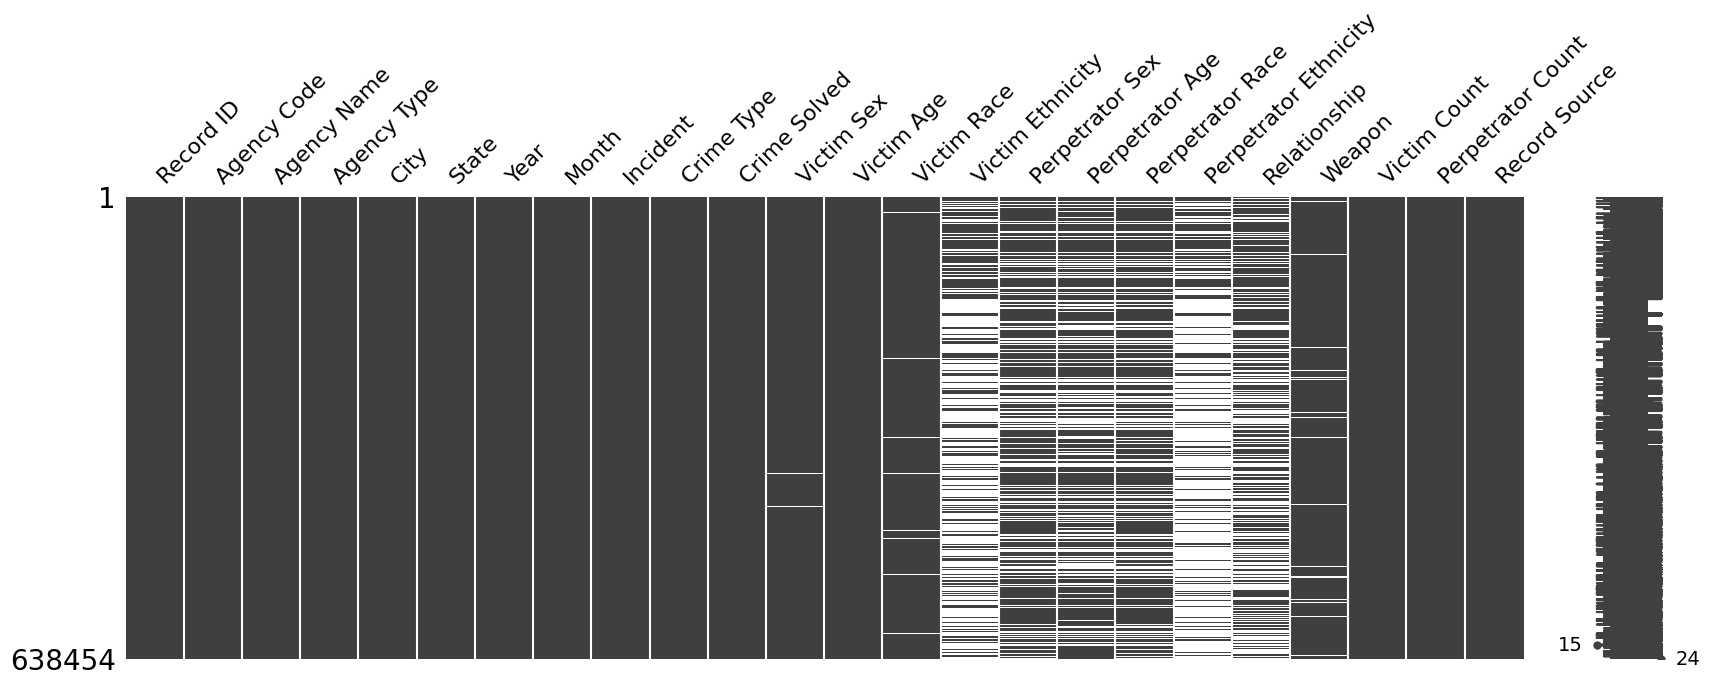

In [22]:
# plot the matrix for null values
mno.matrix(nunality, figsize = (20, 6))

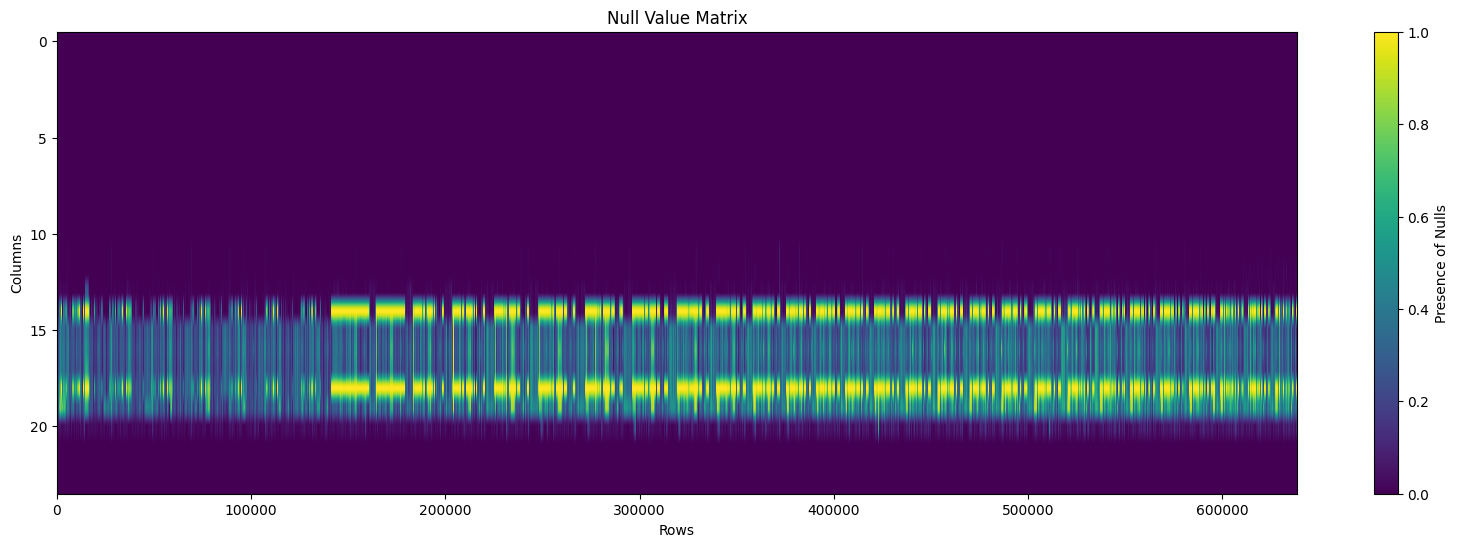

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Count the null values in each column
null_counts = nunality.select([((col(c).isNull()).cast("int")).alias(c) for c in nunality.columns])

# Convert the Spark DataFrame to Pandas for easier plotting
null_counts_pd = null_counts.toPandas()

# Plot the matrix for null values
plt.figure(figsize=(20, 6))
plt.imshow(null_counts_pd.T, aspect='auto', cmap='viridis')
plt.colorbar(label='Presence of Nulls')
plt.title('Null Value Matrix')
plt.ylabel('Columns')
plt.xlabel('Rows')
plt.show()

### Percentage of missing data
Display how much data is missing as a percentage

In [23]:
nunality_check = nunality.isna().sum()
nunality_pct = nunality_check/len(nunality)
nunality_pct_times = nunality_pct * 100
nunality_pct_times

Record ID                 0.000000
Agency Code               0.000000
Agency Name               0.000000
Agency Type               0.000000
City                      0.000000
State                     0.000000
Year                      0.000000
Month                     0.000000
Incident                  0.000000
Crime Type                0.000000
Crime Solved              0.000000
Victim Sex                0.154122
Victim Age                0.000000
Victim Race               1.045651
Victim Ethnicity         57.686693
Perpetrator Sex          29.816557
Perpetrator Age          33.060957
Perpetrator Race         30.706519
Perpetrator Ethnicity    69.920464
Relationship             42.761577
Weapon                    5.198808
Victim Count              0.000000
Perpetrator Count         0.000000
Record Source             0.000000
dtype: float64

In [28]:
from pyspark.sql.functions import col, sum as _sum

# Calculate the number of nulls in each column
nunality_check = nunality.select([_sum(col(c).isNull().cast("int")).alias(c) for c in nunality.columns])

# Convert to Pandas for easier calculation and visualization
nunality_check_pd = nunality_check.toPandas().T  # Transpose for easier handling

# Calculate the percentage of nulls
total_rows = nunality.count()
nunality_pct = (nunality_check_pd / total_rows) * 100

# Display the percentage of null values
nunality_pct.columns = ['Percentage of Nulls (%)']
nunality_pct

Percentage of Nulls (%)
Record ID                             0.000000
Agency Code                           0.000000
Agency Name                           0.000000
Agency Type                           0.000000
City                                  0.000000
State                                 0.000000
Year                                  0.000000
Month                                 0.000000
Incident                              0.000000
Crime Type                            0.000000
Crime Solved                          0.000000
Victim Sex                            0.154122
Victim Age                            0.152556
Victim Race                           1.045651
Victim Ethnicity                     57.686693
Perpetrator Sex                      29.816557
Perpetrator Age                      33.882942
Perpetrator Race                     30.706519
Perpetrator Ethnicity                69.920464
Relationship                         42.761577
Weapon                                5.198808
Victim Count                          0.000000
Perpetrator Count                     0.000000
Record Source                         0.000000

# 2. Data Cleaning

Replace all the blanks with 0 values and convert strings into integers. We want all missing data for ages to be 0 so, we can convert them to NaN dtype. Then we can simply fill the missing data with the method of our choosing. 

In [24]:
# make a copy of the original data to keep it safe
data2 = data.copy()

# replace blank strings with zeros
data2['Perpetrator Age'] = data2['Perpetrator Age'].replace(" ", 0)

# convert to integers
data2['Perpetrator Age'] = data2['Perpetrator Age'].astype(str).astype(int)

# See if the spaces are gone and that if strings became integers
data2['Perpetrator Age'].unique()

array([15, 42,  0, 36, 27, 35, 40, 49, 39, 29, 19, 23, 33, 26, 41, 28, 61,
       25,  7, 17, 34, 21, 43, 38, 66, 32, 37, 22, 30, 24, 65, 51, 60, 45,
       64, 18, 20, 44, 73, 62, 69, 52, 16, 90, 56, 47, 57, 31, 46, 14, 55,
       50, 54, 68, 77, 53, 67, 48, 76, 58, 71, 63, 89, 13, 75, 72, 93, 59,
       10, 11, 79, 74, 99, 70, 78, 80,  9, 12, 81,  6, 87, 82, 83,  8, 84,
       85, 86,  5,  3,  1, 88, 95,  4, 91, 92, 96, 94,  2, 98, 97])

In [29]:
from pyspark.sql.functions import when, col

# Step 1: Create a copy of the DataFrame by reassigning it
data2 = data

# Step 2: Replace blank strings with zeros in the 'Perpetrator Age' column
data2 = data2.withColumn('Perpetrator Age', when(col('Perpetrator Age') == " ", 0).otherwise(col('Perpetrator Age')))

# Step 3: Convert the 'Perpetrator Age' column to integers
data2 = data2.withColumn('Perpetrator Age', col('Perpetrator Age').cast('int'))

# Step 4: Check the unique values in the 'Perpetrator Age' column
unique_perpetrator_ages = data2.select('Perpetrator Age').distinct()

# Show the unique values
unique_perpetrator_ages.show(truncate=False)

+---------------+
|Perpetrator Age|
+---------------+
|31             |
|85             |
|65             |
|53             |
|78             |
|34             |
|81             |
|28             |
|76             |
|27             |
|26             |
|44             |
|12             |
|91             |
|22             |
|93             |
|47             |
|1              |
|52             |
|13             |
+---------------+
only showing top 20 rows



Subset the data for all the perpetrator ages below zero and convert them to NaN dtype. Age 6 was picked because the youngest homicide perpetrator in history was 6 years old.

In [25]:
# replacing perpetrators under the age 6 with NAN

# search for ages below 6
# This returns True/False
under_6 = data2["Perpetrator Age"] < 6

# replace them with nan values for that column
data2["Perpetrator Age"][under_6] = np.nan

C:\Users\Admin\AppData\Local\Temp\ipykernel_31060\1811497829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["Perpetrator Age"][under_6] = np.nan


In [30]:
from pyspark.sql.functions import when, col

# Step 1: Create a copy of the DataFrame
data2 = nunality  # PySpark doesn't have a direct copy method; reassigning works as a copy

# Step 2: Replace blank strings with zeros in 'Perpetrator Age'
data2 = data2.withColumn('Perpetrator Age', when(col('Perpetrator Age') == " ", 0).otherwise(col('Perpetrator Age')))

# Step 3: Convert 'Perpetrator Age' to integers
data2 = data2.withColumn('Perpetrator Age', col('Perpetrator Age').cast('int'))

# Step 4: Replace 'Perpetrator Age' values less than 6 with null
data2 = data2.withColumn('Perpetrator Age', when(col('Perpetrator Age') < 6, None).otherwise(col('Perpetrator Age')))

# Step 5: Check unique values to see if spaces are gone and if strings became integers
unique_perpetrator_ages = data2.select('Perpetrator Age').distinct()
unique_perpetrator_ages.show(truncate=False)

+---------------+
|Perpetrator Age|
+---------------+
|31             |
|85             |
|65             |
|53             |
|78             |
|34             |
|81             |
|28             |
|76             |
|27             |
|26             |
|44             |
|12             |
|91             |
|22             |
|93             |
|47             |
|null           |
|52             |
|13             |
+---------------+
only showing top 20 rows



Remove the error values from victim age. To our knowledge nobody could be that old.

In [26]:
# subset the age 998
vic_age_limit = data2["Victim Age"] == 998

# replace them with nan values for that column
data2["Victim Age"][vic_age_limit] = np.nan

C:\Users\Admin\AppData\Local\Temp\ipykernel_31060\3859598570.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["Victim Age"][vic_age_limit] = np.nan


In [33]:
from pyspark.sql.functions import when, col

# Replace 'Victim Age' values equal to 998 with null
data2 = data2.withColumn('Victim Age', when(col('Victim Age') == 998, None).otherwise(col('Victim Age')))

## Interpolate missing values (Victim, Perpetrator age)
    - Interpolate method makes a mean between the values before the missing data and the value after
    - Linear parameter is set as default to interpolate the missing values

In [27]:
# interapolate missing data
data2 = data2.interpolate()

# display first 5 rows
data2.head()

Record ID Agency Code Agency Name       Agency Type       City   State  \
0          1     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
1          2     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
2          3     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
3          4     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
4          5     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   

   Year    Month  Incident              Crime Type  ... Victim Ethnicity  \
0  1980  January         1  Murder or Manslaughter  ...          Unknown   
1  1980    March         1  Murder or Manslaughter  ...          Unknown   
2  1980    March         2  Murder or Manslaughter  ...          Unknown   
3  1980    April         1  Murder or Manslaughter  ...          Unknown   
4  1980    April         2  Murder or Manslaughter  ...          Unknown   

  Perpetrator Sex  Perpetrator Age               Perpetrator Race  \
0            Male             15.0  Native American/Alaska Native   
1            Male             42.0                          White   
2         Unknown             42.0                        Unknown   
3            Male             42.0                          White   
4         Unknown             39.0                        Unknown   

  Perpetrator Ethnicity  Relationship         Weapon Victim Count  \
0               Unknown  Acquaintance   Blunt Object            0   
1               Unknown  Acquaintance  Strangulation            0   
2               Unknown       Unknown        Unknown            0   
3               Unknown  Acquaintance  Strangulation            0   
4               Unknown       Unknown        Unknown            0   

  Perpetrator Count Record Source  
0                 0           FBI  
1                 0           FBI  
2                 0           FBI  
3                 0           FBI  
4                 1           FBI  

[5 rows x 24 columns]

In [35]:
from pyspark.sql.window import Window
from pyspark.sql.functions import col, last, when

# Define a window spec that orders by a column. You need to replace 'Year' with an appropriate column for your data.
window_spec = Window.orderBy("Year").rowsBetween(Window.unboundedPreceding, Window.currentRow)

# Forward fill 'Victim Age' for example
data2 = data2.withColumn('Victim Age', last(col('Victim Age'), ignorenulls=True).over(window_spec))

# Repeat for other columns as needed
data2 = data2.withColumn('Perpetrator Age', last(col('Perpetrator Age'), ignorenulls=True).over(window_spec))
data2 = data2.withColumn('Victim Sex', last(col('Victim Sex'), ignorenulls=True).over(window_spec))
# Add more columns as necessary

# Show the first 5 rows to verify
data2.show(5)

+---------+-----------+-----------+----------------+---------+------+----+-------+--------+--------------------+------------+----------+----------+--------------------+----------------+---------------+---------------+--------------------+---------------------+------------+-------------+------------+-----------------+-------------+
|Record ID|Agency Code|Agency Name|     Agency Type|     City| State|Year|  Month|Incident|          Crime Type|Crime Solved|Victim Sex|Victim Age|         Victim Race|Victim Ethnicity|Perpetrator Sex|Perpetrator Age|    Perpetrator Race|Perpetrator Ethnicity|Relationship|       Weapon|Victim Count|Perpetrator Count|Record Source|
+---------+-----------+-----------+----------------+---------+------+----+-------+--------+--------------------+------------+----------+----------+--------------------+----------------+---------------+---------------+--------------------+---------------------+------------+-------------+------------+-----------------+-------------+
|

Before we converted subsets to numpy NaN. This transformed the data series into a data type float. Now, we have to convert the age values back into integers. 

In [28]:
# Convert the column type to integers
data2['Perpetrator Age'] = data2['Perpetrator Age'].astype(int)
data2['Victim Age'] = data2['Victim Age'].astype(int)

# Check if the data is converted 
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int32 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

In [36]:
from pyspark.sql.functions import col

# Convert the 'Perpetrator Age' column to integer type
data2 = data2.withColumn('Perpetrator Age', col('Perpetrator Age').cast('int'))

# Convert the 'Victim Age' column to integer type
data2 = data2.withColumn('Victim Age', col('Victim Age').cast('int'))

# Check if the data is converted by printing the schema
data2.printSchema()

root
 |-- Record ID: integer (nullable = true)
 |-- Agency Code: string (nullable = true)
 |-- Agency Name: string (nullable = true)
 |-- Agency Type: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: string (nullable = true)
 |-- Incident: integer (nullable = true)
 |-- Crime Type: string (nullable = true)
 |-- Crime Solved: string (nullable = true)
 |-- Victim Sex: string (nullable = true)
 |-- Victim Age: integer (nullable = true)
 |-- Victim Race: string (nullable = true)
 |-- Victim Ethnicity: string (nullable = true)
 |-- Perpetrator Sex: string (nullable = true)
 |-- Perpetrator Age: integer (nullable = true)
 |-- Perpetrator Race: string (nullable = true)
 |-- Perpetrator Ethnicity: string (nullable = true)
 |-- Relationship: string (nullable = true)
 |-- Weapon: string (nullable = true)
 |-- Victim Count: integer (nullable = true)
 |-- Perpetrator Count: integer (nullable = true)
 

## Perpetrator & Victim count - fill missing values
    - Victim and perpetrator count 0 values correlate with crimes that were unsolved. 
    - Hence, we regard these 0 zero values as unknown values as before. 
    - Here we will subset the zero values and convert them to numpy NaN
    - Calculate the mean that now does not include 0, and use it to fill the NaN values
    - .fillna() method is very useful for that 
        - There are other methods to choose how to fill the NaN values such as backward, forward fill etc. 

In [29]:
# subset the age 998
pepr_count = data2["Perpetrator Count"] == 0

# replace them with nan values for that column
data2["Perpetrator Count"][pepr_count] = np.nan

# subset the age 998
vic_count = data2["Victim Count"] == 0

# replace them with nan values for that column
data2["Victim Count"][vic_count] = np.nan

# Mean of perpetrator and victim count
# Its 1 for both
perp_mean = data2["Perpetrator Count"].mean()
vic_mean = data2["Victim Count"].mean()

# Fill missing values with the mean
data2["Perpetrator Count"] = data2["Perpetrator Count"].fillna(perp_mean).round()
data2["Victim Count"] = data2["Victim Count"].fillna(vic_mean).round()

# Convert from float to integer
data2["Perpetrator Count"] = data2["Perpetrator Count"].astype(int)
data2["Victim Count"] = data2["Victim Count"].astype(int)

data2.info()

C:\Users\Admin\AppData\Local\Temp\ipykernel_31060\1950219075.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["Perpetrator Count"][pepr_count] = np.nan
C:\Users\Admin\AppData\Local\Temp\ipykernel_31060\1950219075.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["Victim Count"][vic_count] = np.nan


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int32 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

In [37]:
from pyspark.sql.functions import col, when, mean

# Step 1: Replace 'Perpetrator Count' values of 0 with null
data2 = data2.withColumn('Perpetrator Count', when(col('Perpetrator Count') == 0, None).otherwise(col('Perpetrator Count')))

# Replace 'Victim Count' values of 0 with null
data2 = data2.withColumn('Victim Count', when(col('Victim Count') == 0, None).otherwise(col('Victim Count')))

# Step 2: Calculate the mean of 'Perpetrator Count' and 'Victim Count'
perp_mean = data2.select(mean(col('Perpetrator Count'))).first()[0]
vic_mean = data2.select(mean(col('Victim Count'))).first()[0]

# Step 3: Fill missing values with the mean and round the results
data2 = data2.withColumn('Perpetrator Count', when(col('Perpetrator Count').isNull(), round(perp_mean)).otherwise(col('Perpetrator Count')))
data2 = data2.withColumn('Victim Count', when(col('Victim Count').isNull(), round(vic_mean)).otherwise(col('Victim Count')))

# Convert from float to integer
data2 = data2.withColumn('Perpetrator Count', col('Perpetrator Count').cast('int'))
data2 = data2.withColumn('Victim Count', col('Victim Count').cast('int'))

# Step 4: Check the schema to verify the changes
data2.printSchema()

root
 |-- Record ID: integer (nullable = true)
 |-- Agency Code: string (nullable = true)
 |-- Agency Name: string (nullable = true)
 |-- Agency Type: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: string (nullable = true)
 |-- Incident: integer (nullable = true)
 |-- Crime Type: string (nullable = true)
 |-- Crime Solved: string (nullable = true)
 |-- Victim Sex: string (nullable = true)
 |-- Victim Age: integer (nullable = true)
 |-- Victim Race: string (nullable = true)
 |-- Victim Ethnicity: string (nullable = true)
 |-- Perpetrator Sex: string (nullable = true)
 |-- Perpetrator Age: integer (nullable = true)
 |-- Perpetrator Race: string (nullable = true)
 |-- Perpetrator Ethnicity: string (nullable = true)
 |-- Relationship: string (nullable = true)
 |-- Weapon: string (nullable = true)
 |-- Victim Count: integer (nullable = true)
 |-- Perpetrator Count: integer (nullable = true)
 

### Drop Ethnicity Columns
    - The ethnicity data is categorical and more than 60% of the data is missing 
    - Moreover, during our analysis we did not find it particulary useful as it only has 2 data point options 
        (hispanic, not hispanic)
    - Instead, perpetrator and victim race columns provide much more data and will be used for profiling. 

In [30]:
# Drop the ethnicity column due to too many missing values
data2 = data2.drop(columns=['Perpetrator Ethnicity', 'Victim Ethnicity'])

# check if columns are removed
data2.columns

Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Perpetrator Sex',
       'Perpetrator Age', 'Perpetrator Race', 'Relationship', 'Weapon',
       'Victim Count', 'Perpetrator Count', 'Record Source'],
      dtype='object')

In [38]:
# Drop the 'Perpetrator Ethnicity' and 'Victim Ethnicity' columns
data2 = data2.drop('Perpetrator Ethnicity', 'Victim Ethnicity')

# Check if the columns are removed by listing the remaining columns
remaining_columns = data2.columns
print(remaining_columns)

['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City', 'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved', 'Victim Sex', 'Victim Age', 'Victim Race', 'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race', 'Relationship', 'Weapon', 'Victim Count', 'Perpetrator Count', 'Record Source']


### Convert Object to Category dtype
    - While it is not neccessary the object data types will be converted into category datatype
    - It is faster to filter through categorical data

In [31]:
# Shorthand explanation: x /= 3, equivalent to x = x / 3
# select only the object data types
# use the apply function to convert them to a category type
data2.loc[:, data2.dtypes == 'object'] =\
    data2.select_dtypes(['object'])\
    .apply(lambda x: x.astype('category'))

data2.info()

C:\Users\Admin\AppData\Local\Temp\ipykernel_31060\391038230.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data2.loc[:, data2.dtypes == 'object'] =\


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Record ID          638454 non-null  int64   
 1   Agency Code        638454 non-null  category
 2   Agency Name        638454 non-null  category
 3   Agency Type        638454 non-null  category
 4   City               638454 non-null  category
 5   State              638454 non-null  category
 6   Year               638454 non-null  int64   
 7   Month              638454 non-null  category
 8   Incident           638454 non-null  int64   
 9   Crime Type         638454 non-null  category
 10  Crime Solved       638454 non-null  category
 11  Victim Sex         638454 non-null  category
 12  Victim Age         638454 non-null  int32   
 13  Victim Race        638454 non-null  category
 14  Perpetrator Sex    638454 non-null  category
 15  Perpetrator Age    638454 non-null

In [39]:
from pyspark.sql.functions import col

# Step 1: Identify string columns (which are similar to pandas 'object' dtype)
string_columns = [col_name for col_name, dtype in data2.dtypes if dtype == 'string']

# Step 2: Convert these columns to string type (they are already strings, so this is a placeholder for any categorical operation you might want)
for col_name in string_columns:
    data2 = data2.withColumn(col_name, col(col_name).cast('string'))

# Step 3: Check the schema to verify the changes
data2.printSchema()

root
 |-- Record ID: integer (nullable = true)
 |-- Agency Code: string (nullable = true)
 |-- Agency Name: string (nullable = true)
 |-- Agency Type: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: string (nullable = true)
 |-- Incident: integer (nullable = true)
 |-- Crime Type: string (nullable = true)
 |-- Crime Solved: string (nullable = true)
 |-- Victim Sex: string (nullable = true)
 |-- Victim Age: integer (nullable = true)
 |-- Victim Race: string (nullable = true)
 |-- Perpetrator Sex: string (nullable = true)
 |-- Perpetrator Age: integer (nullable = true)
 |-- Perpetrator Race: string (nullable = true)
 |-- Relationship: string (nullable = true)
 |-- Weapon: string (nullable = true)
 |-- Victim Count: integer (nullable = true)
 |-- Perpetrator Count: integer (nullable = true)
 |-- Record Source: string (nullable = true)



# 3. Descriptive analysis and Visualization
Now the data is clean and prepared to answer the question. Here there are questions from before that we will tackle:
        1. Time series for homicede incidences 
            - Has the homocide rates decrease from 1980-2014?
            - What events caused homicide rates to increase?
            - What states have the highest and lowest number of incidences from 1980-2014?
            - What states had the highest and lowest murder rate in 2014?
        2. Age distribution
            - What age group is the most predominent for perpetrators and victims?
            - Has the age distribution change over the years?
            - What ages encompass the most perpetrators? 
        3. Race and sex 
            - Perpetrator and victim sex distribution for each race?
            - What is the age group distribution for each race?
            - What perpetrator and victim race has the highest homicide incidences?
        4. Relationship
            - What relationship result in most murders from 1980-2014?
            - What victim relationship result in most murders from 1980-2014?
            - What relationship group has the most homicides?
        5. Weapon
            - What weapons are most and least commonly used for murder over the time period?
        6. Perpetrator and Victim Count
            - Are there more perpetrators than victims?
        7. Correlation
            - How is the homicide data correlated?
        8. Decision Tree
            - Can we predict whether the crime will be solved or unsolved for victims?
        9. How to reduce the crime rate in Hartford, CT?

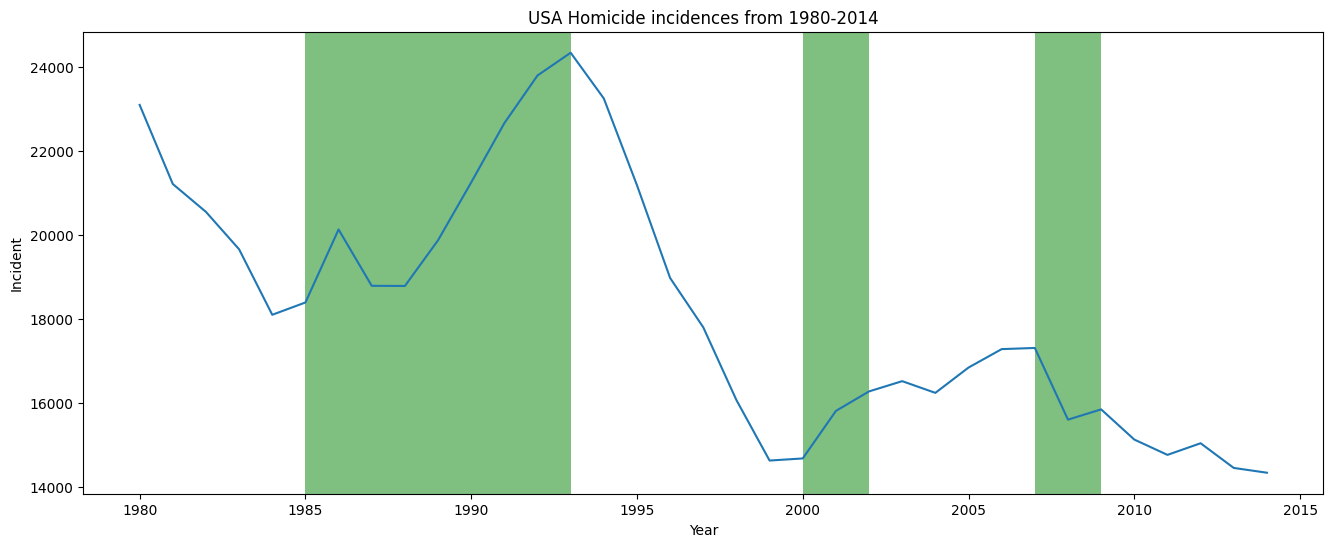

In [32]:
# Group the count of incident by year 
# Reset index for plotting
country_incidences = data2.groupby('Year')['Incident'].agg('count')
country_incidences = country_incidences.reset_index()

# Create a lineplot over for all the years of data
plt.figure(figsize=(16, 6))
sns.lineplot(data=country_incidences, x='Year',y='Incident').set_title("USA Homicide incidences from 1980-2014")

# mark the financial crises on the graph
plt.axvspan(2000,2002,facecolor='g', alpha=0.5)
plt.axvspan(2007,2009,facecolor='g', alpha=0.5)
plt.axvspan(1985,1993,facecolor='g', alpha=0.5)

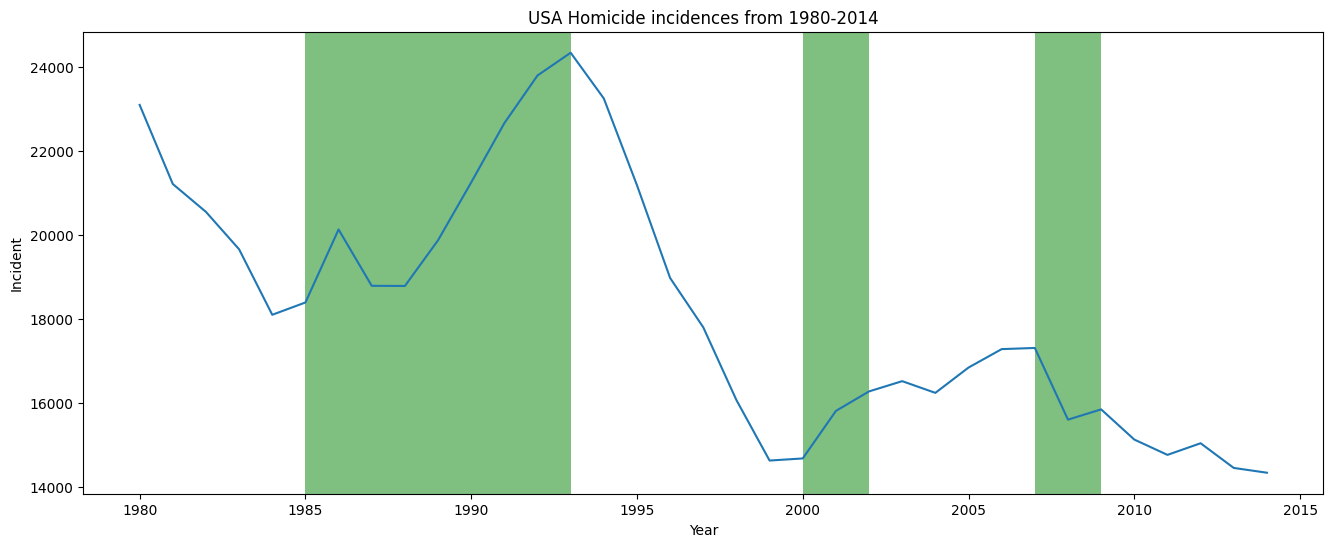

In [40]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group the data by 'Year' and count the 'Incident' occurrences
country_incidences = data2.groupBy('Year').agg(F.count('Incident').alias('Incident'))

# Step 2: Convert the result to a Pandas DataFrame for plotting
country_incidences_pd = country_incidences.toPandas()

# Step 3: Plot the line plot using Matplotlib and Seaborn
plt.figure(figsize=(16, 6))
sns.lineplot(data=country_incidences_pd, x='Year', y='Incident').set_title("USA Homicide incidences from 1980-2014")

# Step 4: Mark the financial crises on the graph
plt.axvspan(2000, 2002, facecolor='g', alpha=0.5)
plt.axvspan(2007, 2009, facecolor='g', alpha=0.5)
plt.axvspan(1985, 1993, facecolor='g', alpha=0.5)

# Display the plot
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_31060\734669053.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pct_change["pct_change"] = pct_change["Incident"].pct_change()*100


Text(0.5, 1.0, 'Percentage Change of USA Homicides during 1980-2014')

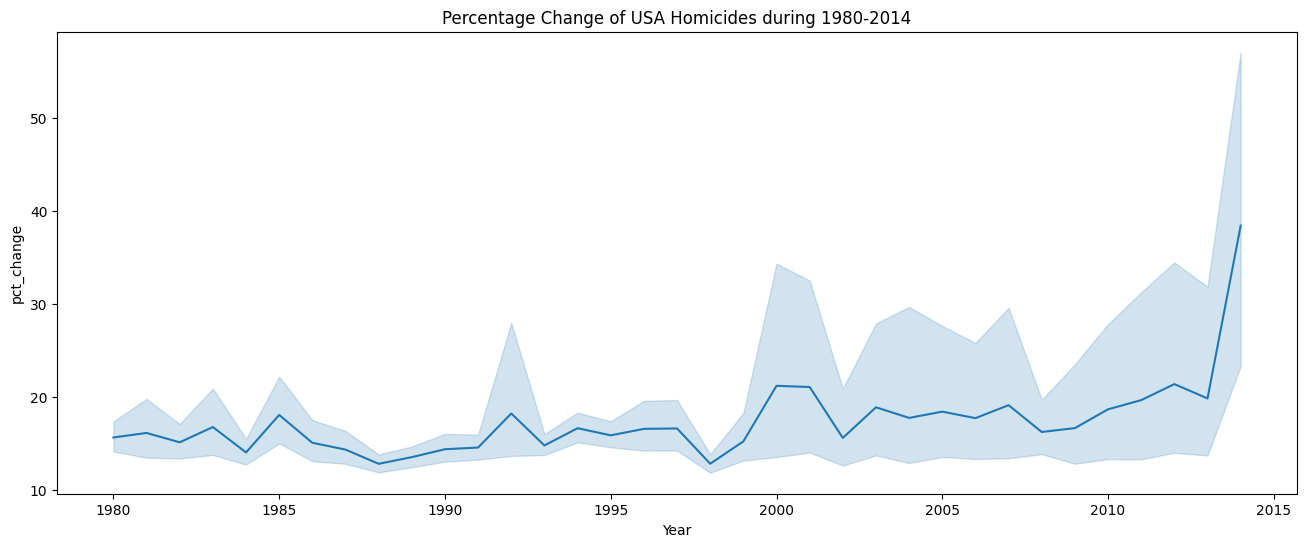

In [33]:
# subset the data we need for the plot (year and incident)
pct_change = data2[['Year','Incident']]

# Create a new column and apply the formula that calculates the pct change and multiply it to create a percentage
pct_change["pct_change"] = pct_change["Incident"].pct_change()*100

# plot and add the tittle 
plt.figure(figsize=(16, 6))
sns.lineplot(x='Year',y='pct_change',data=pct_change).set_title("Percentage Change of USA Homicides during 1980-2014")

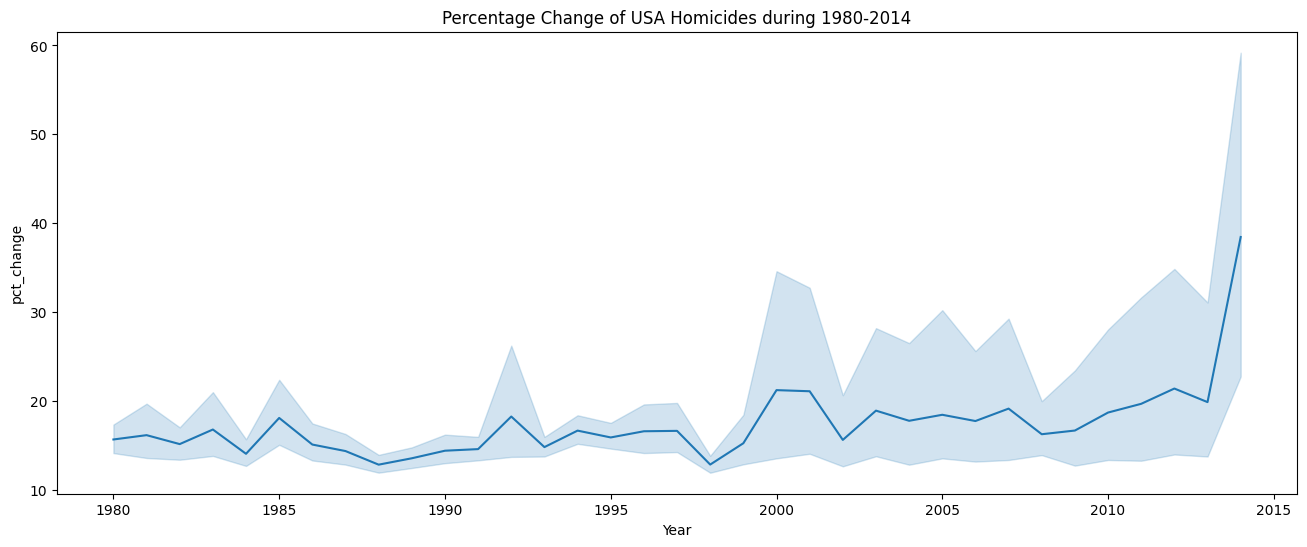

In [41]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select the necessary columns
pct_change = data2.select('Year', 'Incident')

# Step 2: Calculate the percentage change using a window function
# Define the window specification
window_spec = Window.orderBy("Year")

# Calculate the percentage change
pct_change = pct_change.withColumn('pct_change', 
                                   (F.col('Incident') - F.lag('Incident').over(window_spec)) / F.lag('Incident').over(window_spec) * 100)

# Step 3: Convert the result to a Pandas DataFrame for plotting
pct_change_pd = pct_change.toPandas()

# Step 4: Plot the percentage change using Matplotlib and Seaborn
plt.figure(figsize=(16, 6))
sns.lineplot(x='Year', y='pct_change', data=pct_change_pd).set_title("Percentage Change of USA Homicides during 1980-2014")

# Display the plot
plt.show()

**What states have the highest number of incidences from 1980-2014?**

Text(0.5, 1.0, 'Top 20 States with the Highest Number of Homicide Incidences')

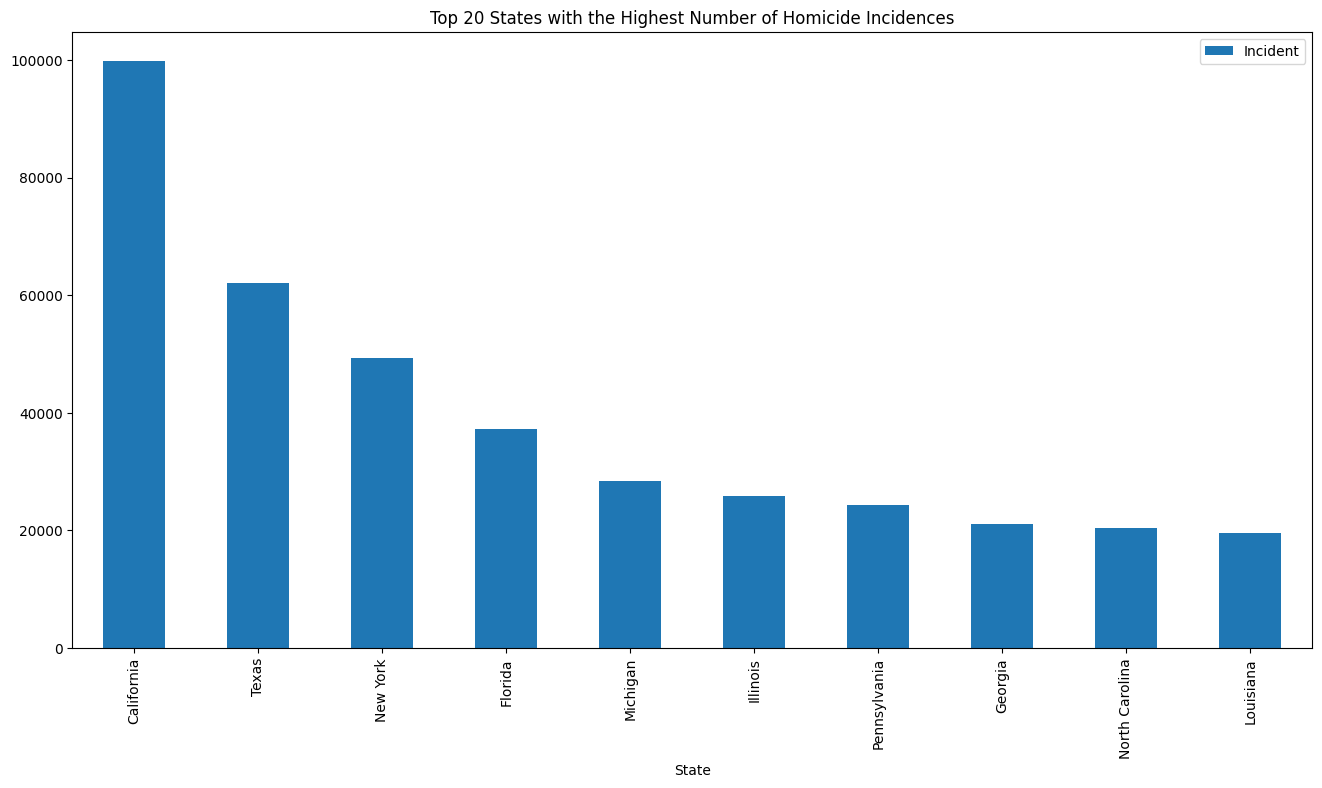

In [34]:
state_inc_years = data2.groupby('State')['Incident'].agg('count')
state_inc_years = state_inc_years.reset_index().sort_values("Incident", ascending = False)
state_inc_years.head(10).plot(x='State',y='Incident',kind='bar',figsize=[16,8])
plt.title("Top 20 States with the Highest Number of Homicide Incidences")

Text(0.5, 1.0, 'Top 10 States with the Highest Number of Homicide Incidences')

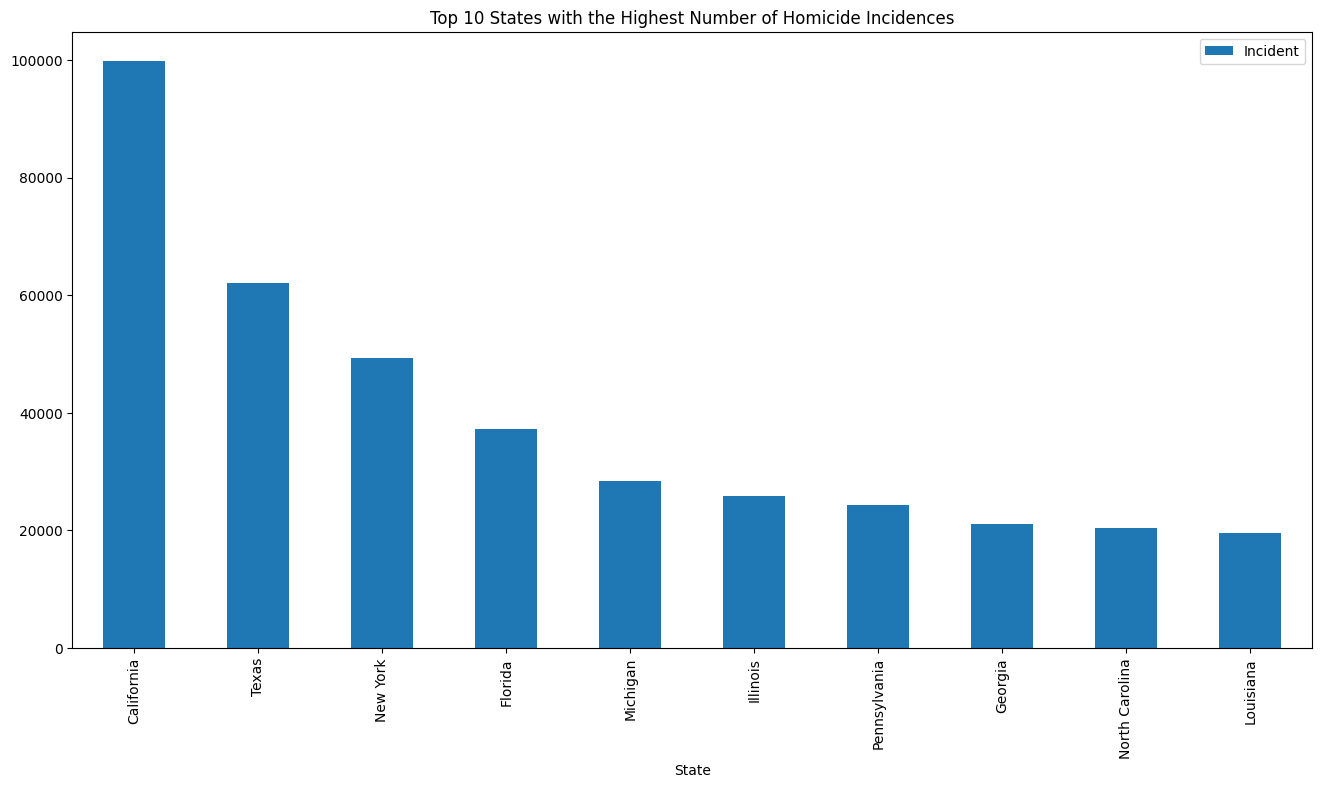

In [42]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# Step 1: Group by 'State' and count the number of 'Incident' occurrences
state_inc_years = data2.groupBy('State').agg(F.count('Incident').alias('Incident'))

# Step 2: Sort the results by the 'Incident' count in descending order
state_inc_years = state_inc_years.orderBy(F.col('Incident').desc())

# Step 3: Convert the result to a Pandas DataFrame for plotting
state_inc_years_pd = state_inc_years.toPandas()

# Step 4: Plot the top 10 states using a bar plot
state_inc_years_pd.head(10).plot(x='State', y='Incident', kind='bar', figsize=[16, 8])

# Add title to the plot
plt.title("Top 10 States with the Highest Number of Homicide Incidences")

**What states have the lowest number of incidences from 1980-2014?**

<Axes: xlabel='State'>

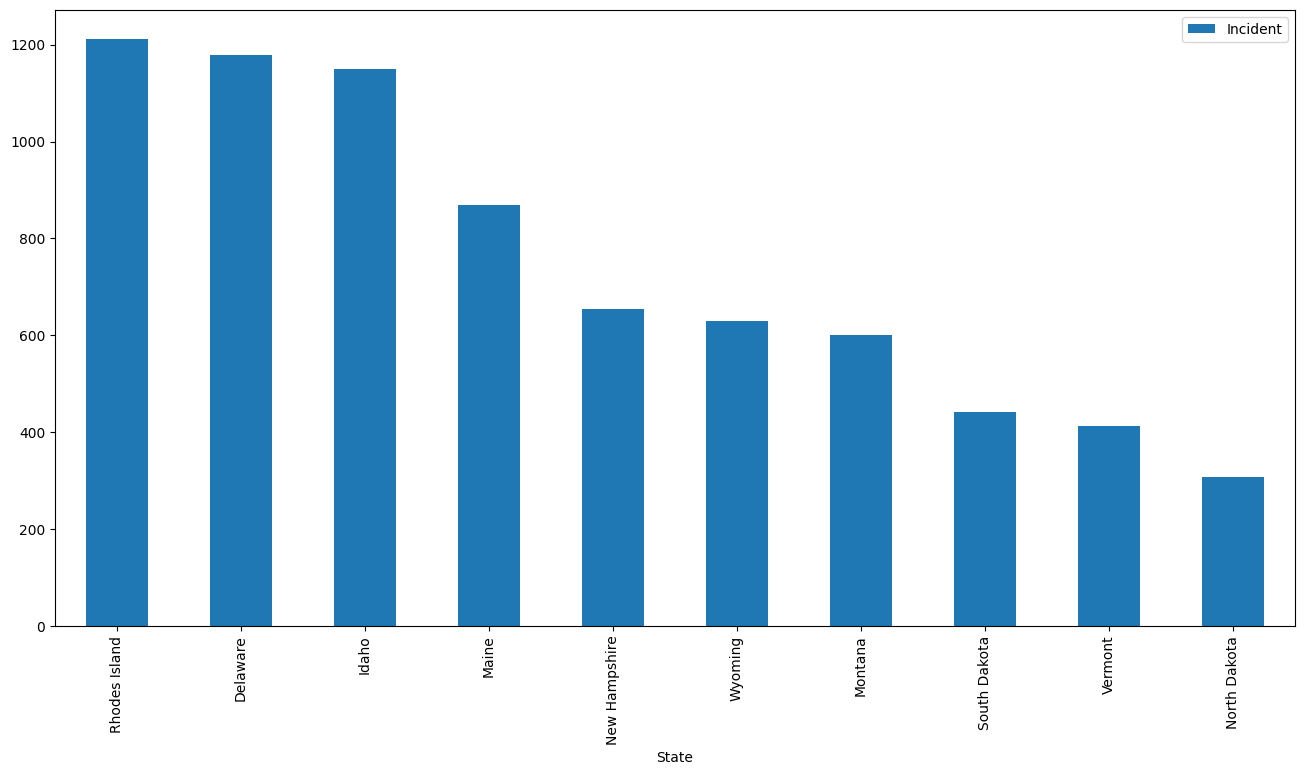

In [35]:
state_inc_years.tail(10).plot(x='State',y='Incident',kind='bar',figsize=[16,8])

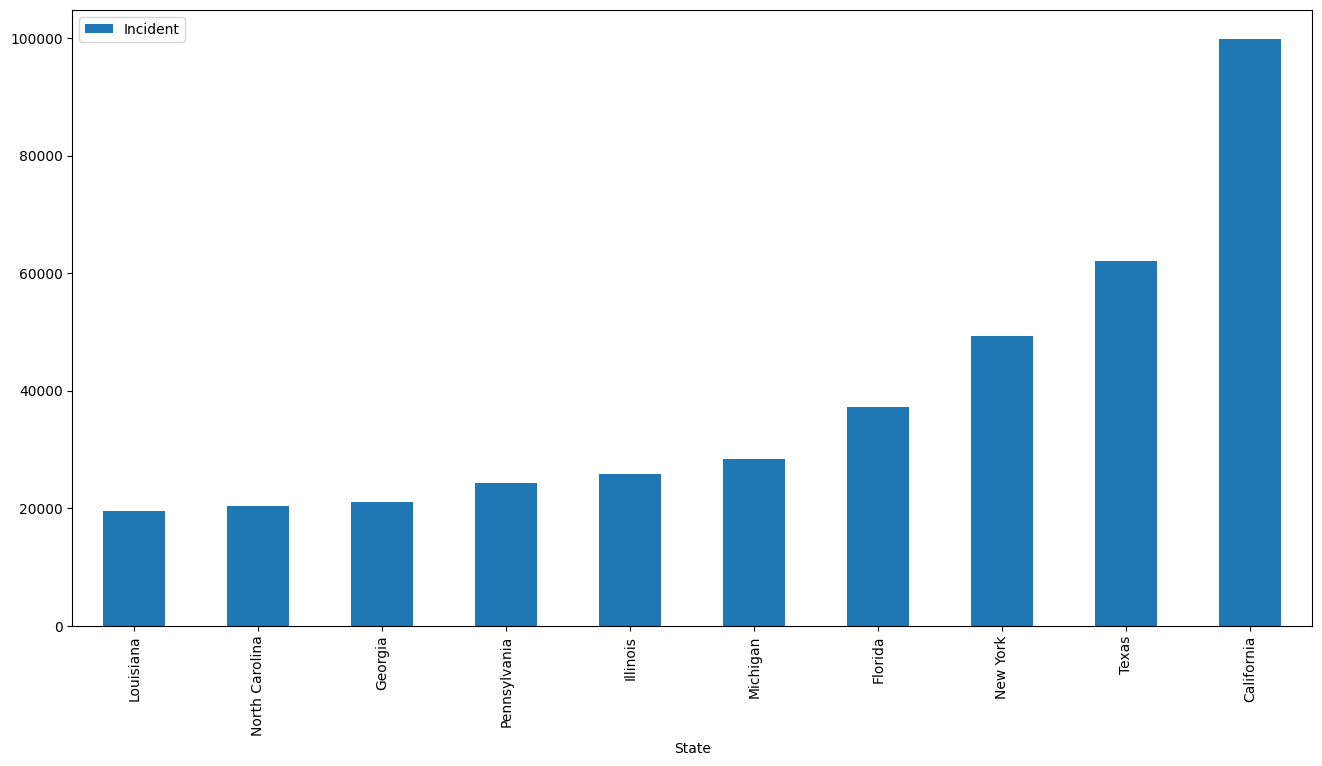

In [43]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# Step 1: Group by 'State' and count the number of 'Incident' occurrences
state_inc_years = data2.groupBy('State').agg(F.count('Incident').alias('Incident'))

# Step 2: Sort the results by the 'Incident' count in ascending order
state_inc_years = state_inc_years.orderBy(F.col('Incident').asc())

# Step 3: Convert the result to a Pandas DataFrame for plotting
state_inc_years_pd = state_inc_years.toPandas()

# Step 4: Plot the bottom 10 states using a bar plot
state_inc_years_pd.tail(10).plot(x='State', y='Incident', kind='bar', figsize=[16, 8])

# Display the plot
plt.show()

### 2. Data distribution
Lets check how the numerical data is distributed. 

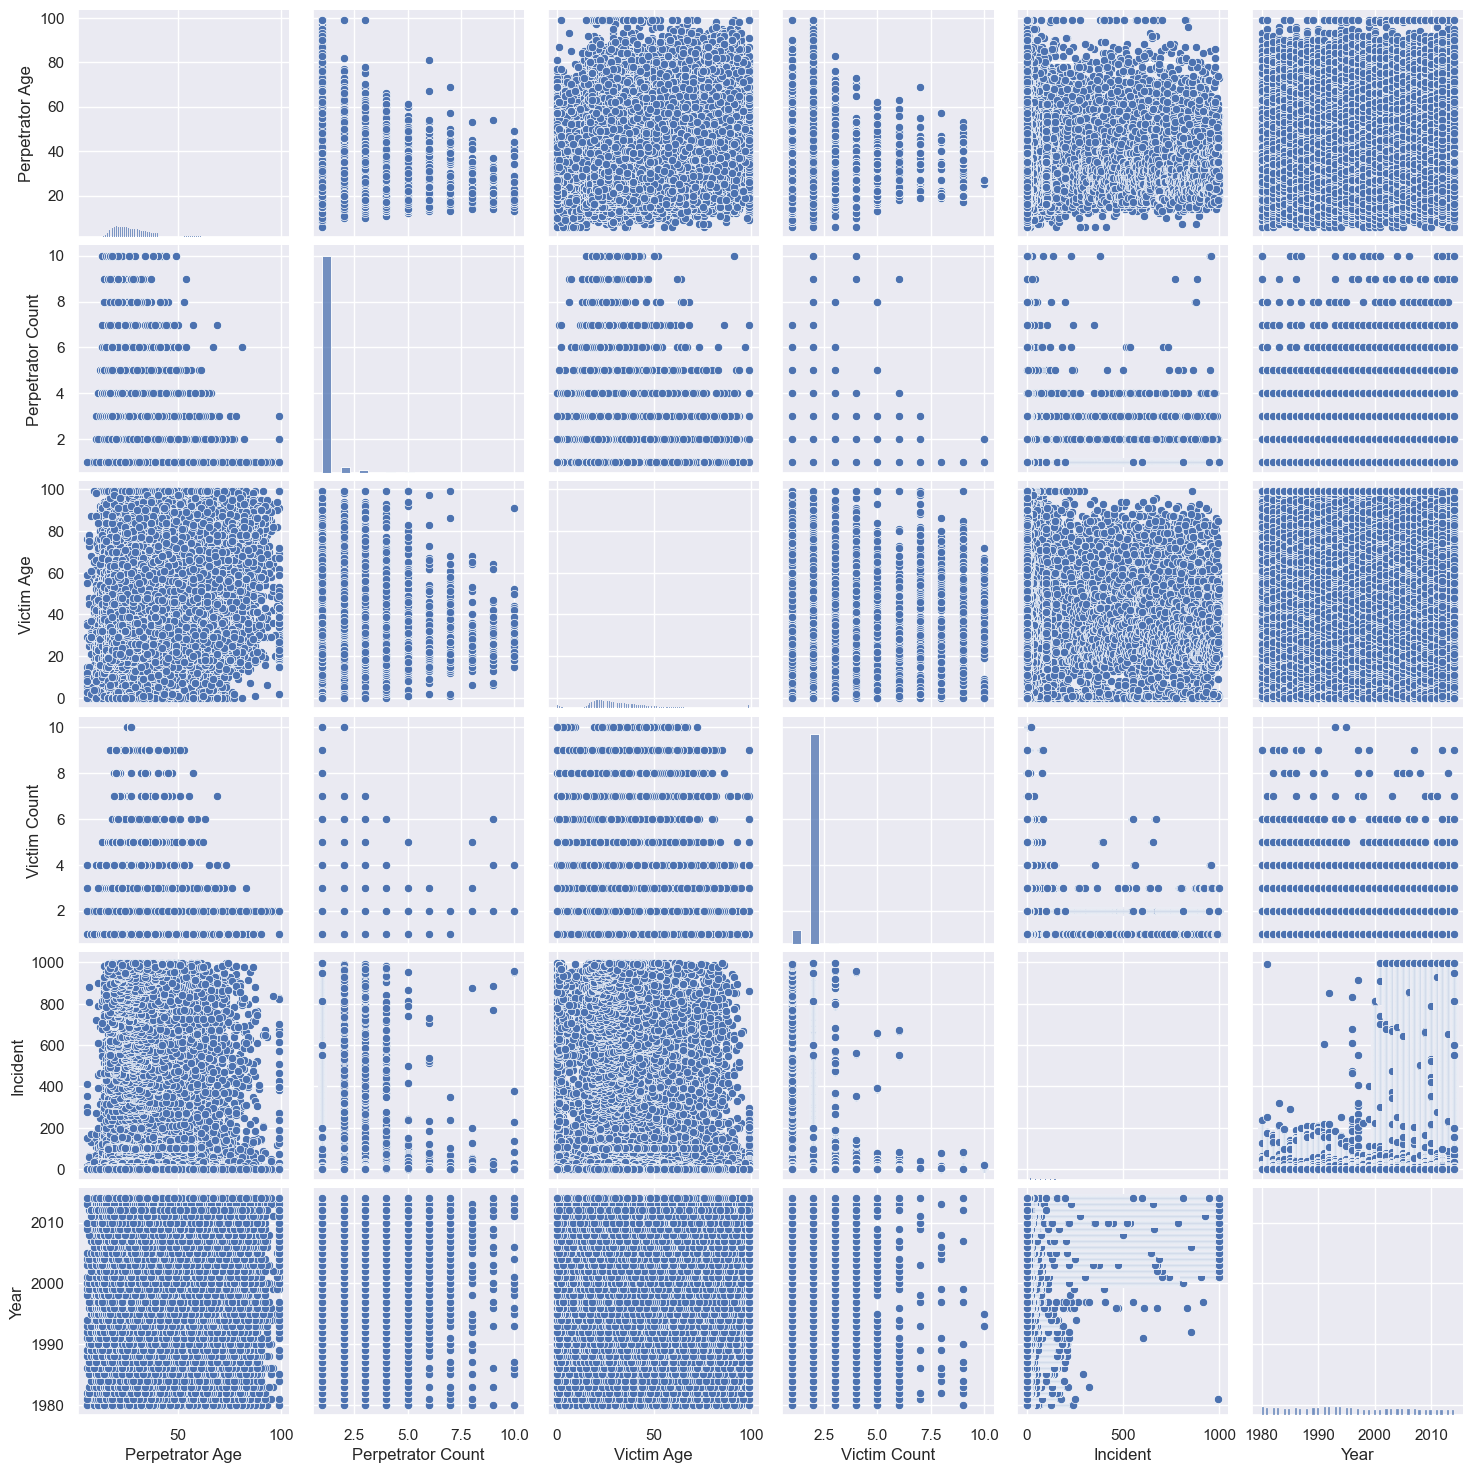

In [36]:
# set space for seaborn subplots
sns.set()
# Select the columns that have the numerical data 

cols = ['Perpetrator Age', 'Perpetrator Count', 'Victim Age', 'Victim Count', 'Incident', 'Year']

# Create a pairplot for the selected columns from the clean dataset 
# adjust the hight of the plots
sns.pairplot(data2[cols], height = 2.5)

# show the plot
plt.show();

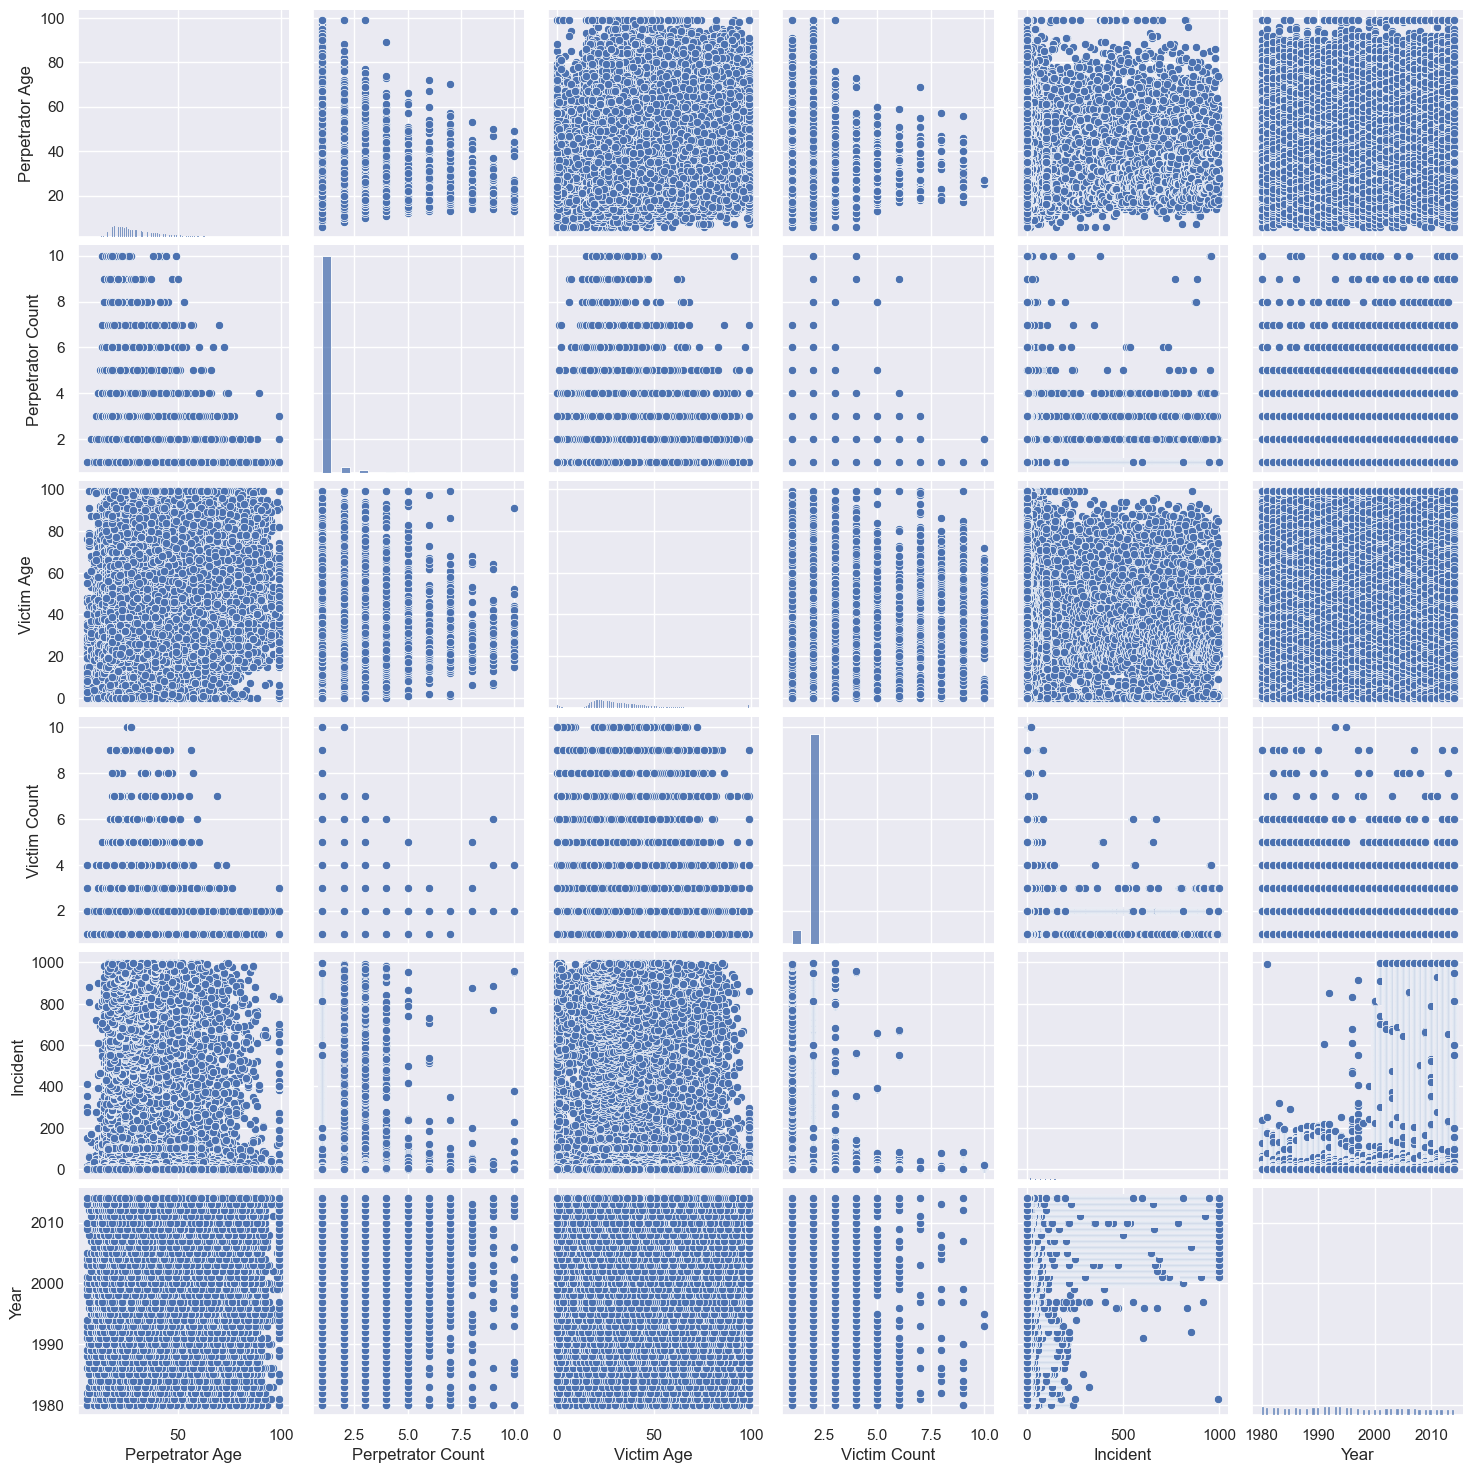

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Convert the relevant columns to a Pandas DataFrame
cols = ['Perpetrator Age', 'Perpetrator Count', 'Victim Age', 'Victim Count', 'Incident', 'Year']
data_subset_pd = data2.select(cols).toPandas()

# Step 2: Set up Seaborn and create the pairplot
sns.set()
sns.pairplot(data_subset_pd, height=2.5)

# Step 3: Show the plot
plt.show()

**Closer look at the distribution over the years**<br>
We can clearly see the number of homicide incidences decreased over the years. From 1980 to 2014 incidences decreased by approximetely 7,000. That is about 30% decrease. Moreover, we can clearly see the effects of crack epidemic and its decrease in the late 1990's. There is a slight increase in homicide incidences during the periods of the financial crisis. 

<Axes: xlabel='Year'>

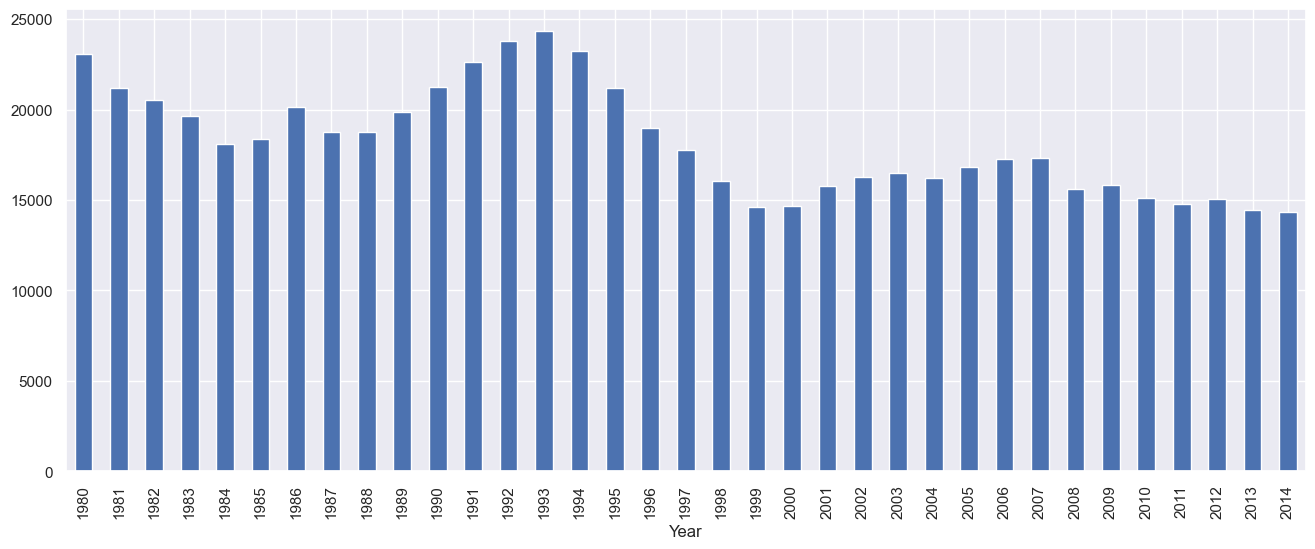

In [37]:
data2.groupby('Year')['Incident'].agg('count').plot(kind='bar',figsize=[16,6])

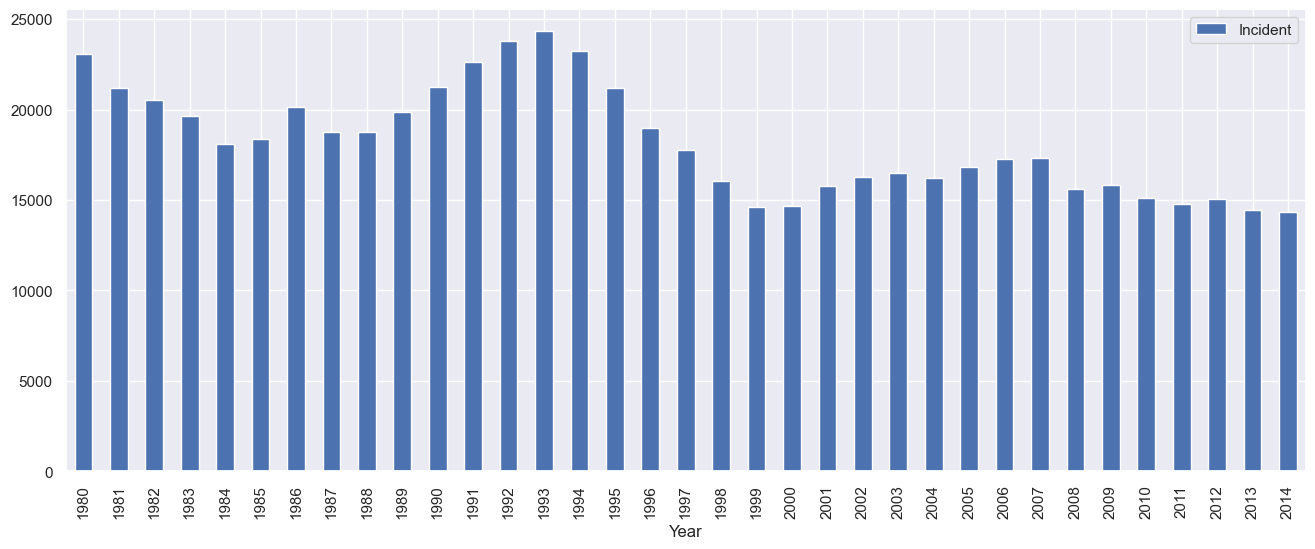

In [45]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# Step 1: Group by 'Year' and count the number of 'Incident' occurrences
yearly_incidents = data2.groupBy('Year').agg(F.count('Incident').alias('Incident'))

# Step 2: Convert the result to a Pandas DataFrame for plotting
yearly_incidents_pd = yearly_incidents.orderBy('Year').toPandas()

# Step 3: Create the bar plot using Matplotlib
yearly_incidents_pd.plot(x='Year', y='Incident', kind='bar', figsize=[16, 6])

# Display the plot
plt.show()

<Axes: >

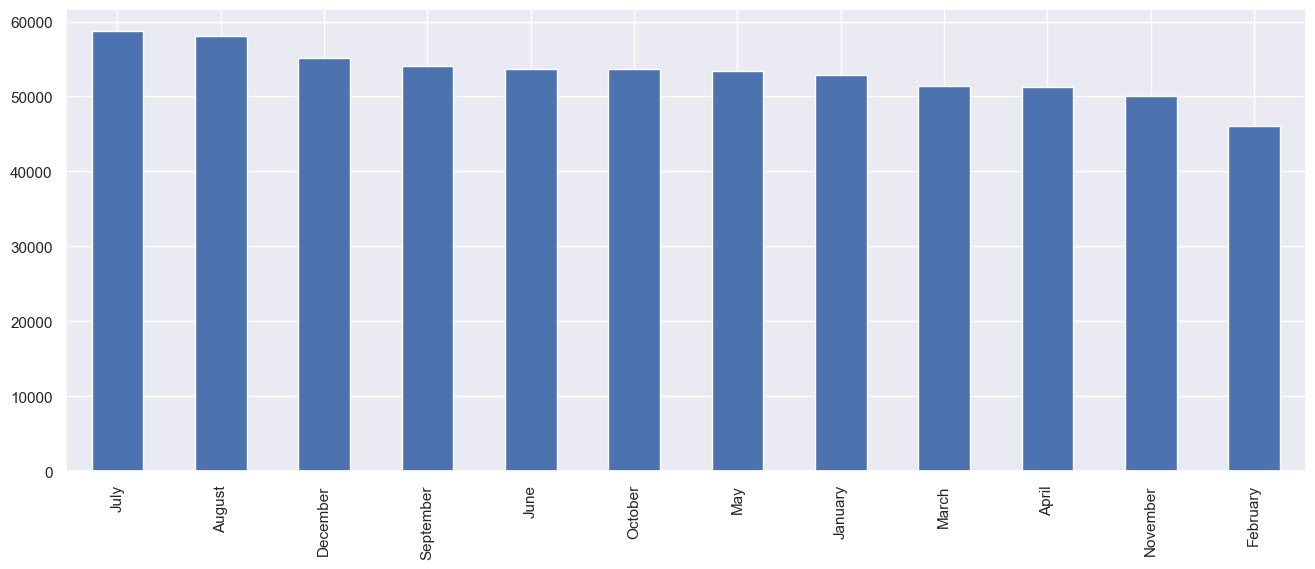

In [38]:
data2['Month'].value_counts().plot(kind='bar',figsize=[16,6])

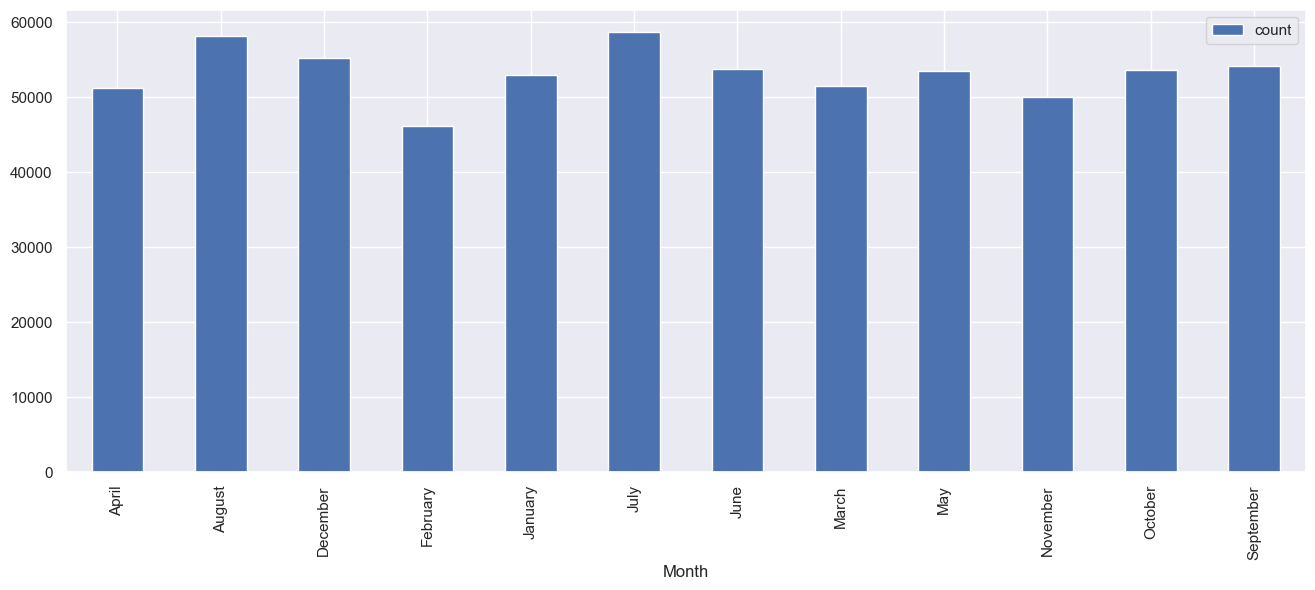

In [46]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# Step 1: Count the occurrences of each month
month_counts = data2.groupBy('Month').agg(F.count('Month').alias('count'))

# Step 2: Convert the result to a Pandas DataFrame for plotting
month_counts_pd = month_counts.orderBy('Month').toPandas()

# Step 3: Create the bar plot using Matplotlib
month_counts_pd.plot(x='Month', y='count', kind='bar', figsize=[16, 6])

# Display the plot
plt.show()

**What ages encompass the most perpetrators?**

C:\Users\Admin\AppData\Local\Temp\ipykernel_31060\3815318342.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( data2["Perpetrator Age"] , color="skyblue", label="Perpetrator Age")
C:\Users\Admin\AppData\Local\Temp\ipykernel_31060\3815318342.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(

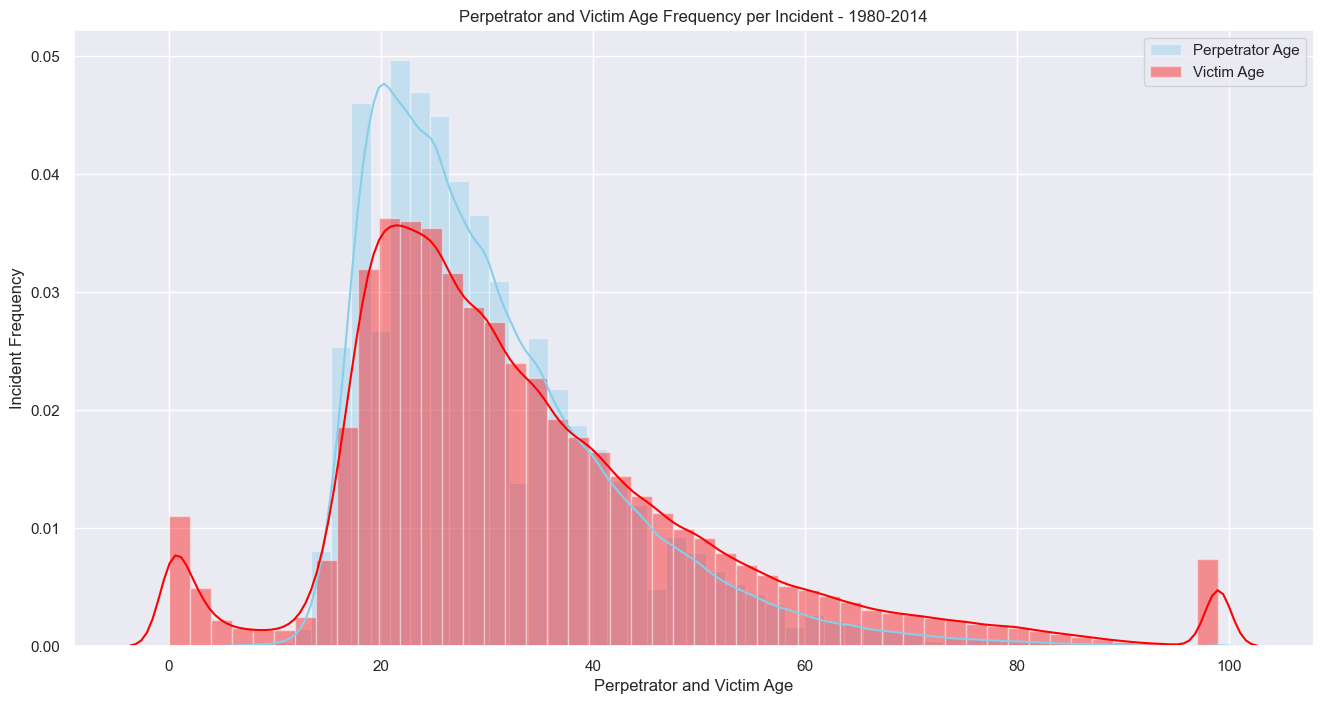

In [39]:
# select the data series to plot, color, and label
# to create 2 plots in one plane simply create 2 displots 
# labels, title and legend are then added using plt (matplotlib)
plt.subplots(figsize=(16, 8))
sns.distplot( data2["Perpetrator Age"] , color="skyblue", label="Perpetrator Age")
sns.distplot( data2["Victim Age"] , color="red", label="Victim Age")
plt.title('Perpetrator and Victim Age Frequency per Incident - 1980-2014')
plt.xlabel('Perpetrator and Victim Age')
plt.ylabel('Incident Frequency')
plt.legend()

C:\Users\Admin\AppData\Local\Temp\ipykernel_31424\1286067616.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(age_data_pd["Perpetrator Age"], color="skyblue", label="Perpetrator Age")
C:\Users\Admin\AppData\Local\Temp\ipykernel_31424\1286067616.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dis

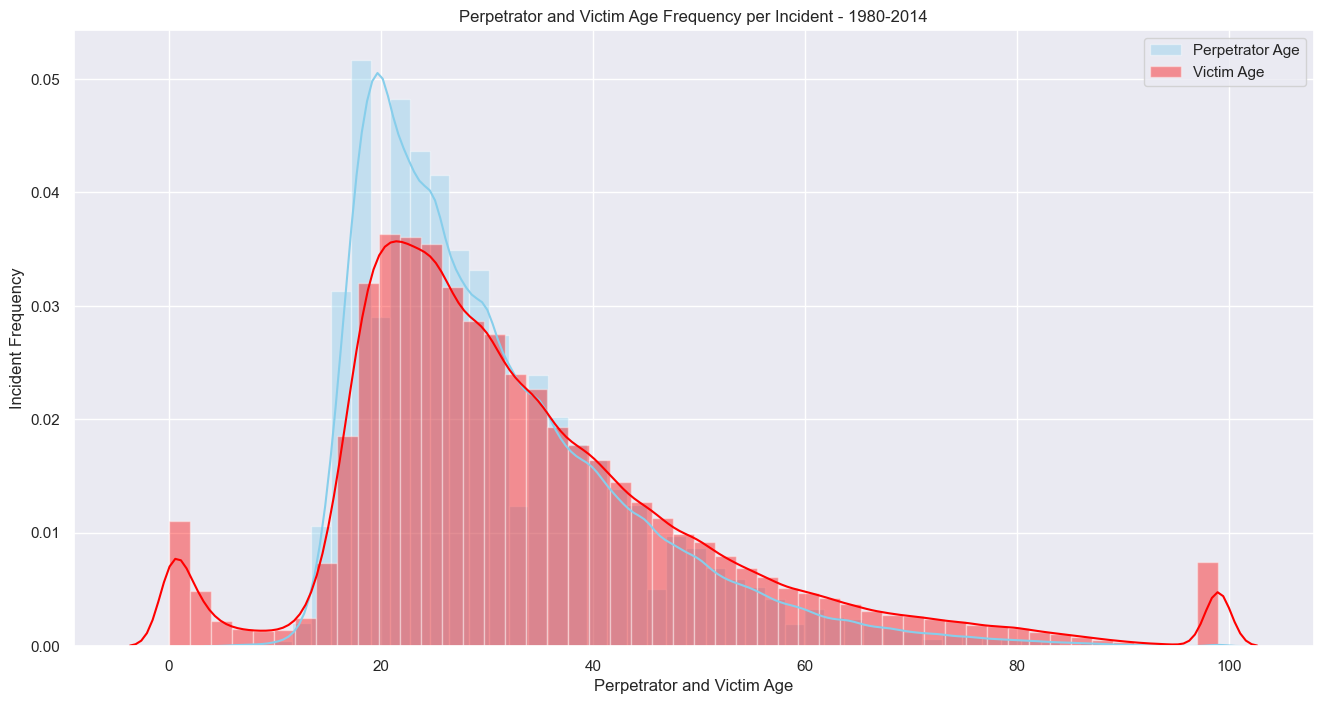

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the relevant columns to a Pandas DataFrame for plotting
age_data_pd = data2.select('Perpetrator Age', 'Victim Age').toPandas()

# Create the plot
plt.subplots(figsize=(16, 8))

# Plot the distributions
sns.distplot(age_data_pd["Perpetrator Age"], color="skyblue", label="Perpetrator Age")
sns.distplot(age_data_pd["Victim Age"], color="red", label="Victim Age")

# Add title and labels
plt.title('Perpetrator and Victim Age Frequency per Incident - 1980-2014')
plt.xlabel('Perpetrator and Victim Age')
plt.ylabel('Incident Frequency')

# Add legend
plt.legend()

# Show the plot
plt.show()

**Perpetrator and victim age mode**

In [40]:
data2['Perpetrator Age'].mode()

0    20
Name: Perpetrator Age, dtype: int32

In [48]:
from pyspark.sql import functions as F

# Step 1: Group by 'Perpetrator Age' and count the occurrences
age_counts = data2.groupBy('Perpetrator Age').agg(F.count('Perpetrator Age').alias('count'))

# Step 2: Find the mode by selecting the row with the maximum count
mode_value = age_counts.orderBy(F.col('count').desc()).first()['Perpetrator Age']

# Display the mode
print(f"The mode of 'Perpetrator Age' is: {mode_value}")

The mode of 'Perpetrator Age' is: 20


In [41]:
data2['Victim Age'].mode()

0    22
Name: Victim Age, dtype: int32

In [49]:
from pyspark.sql import functions as F

# Step 1: Group by 'Victim Age' and count the occurrences
victim_age_counts = data2.groupBy('Victim Age').agg(F.count('Victim Age').alias('count'))

# Step 2: Find the mode by selecting the row with the maximum count
victim_age_mode = victim_age_counts.orderBy(F.col('count').desc()).first()['Victim Age']

# Display the mode
print(f"The mode of 'Victim Age' is: {victim_age_mode}")

The mode of 'Victim Age' is: 22


We can apply **.describe()** to pandas series as well to look at the particular 'column' in a dataframe.

In [42]:
data2['Perpetrator Age'].describe()

count    638454.000000
mean         30.297293
std          11.769614
min           6.000000
25%          22.000000
50%          27.000000
75%          36.000000
max          99.000000
Name: Perpetrator Age, dtype: float64

In [50]:
# Get summary statistics for the 'Perpetrator Age' column
perp_age_stats = data2.select('Perpetrator Age').describe()

# Show the results
perp_age_stats.show()

+-------+------------------+
|summary|   Perpetrator Age|
+-------+------------------+
|  count|            638454|
|   mean| 30.41608792489357|
| stddev|12.645866236432703|
|    min|                 6|
|    max|                99|
+-------+------------------+



In [43]:
data2['Victim Age'].describe()

count    638454.000000
mean         33.567297
std          17.790771
min           0.000000
25%          22.000000
50%          30.000000
75%          42.000000
max          99.000000
Name: Victim Age, dtype: float64

In [51]:
# Get summary statistics for the 'Victim Age' column
victim_age_stats = data2.select('Victim Age').describe()

# Show the results
victim_age_stats.show()

+-------+------------------+
|summary|        Victim Age|
+-------+------------------+
|  count|            638454|
|   mean|  33.5671779016186|
| stddev|17.797603672759408|
|    min|                 0|
|    max|                99|
+-------+------------------+



**Pie chart - Perpetrator and Victim Age**<br>


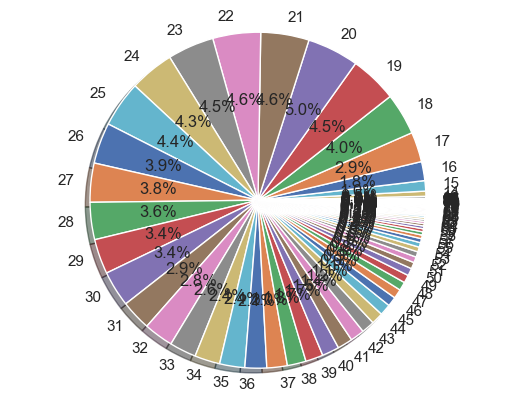

In [44]:
labels = data2['Perpetrator Age'].astype('category').cat.categories.tolist()
counts = data2['Perpetrator Age'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

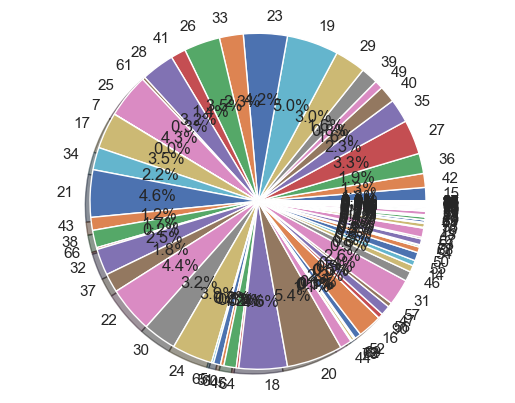

In [52]:
import matplotlib.pyplot as plt

# Step 1: Convert 'Perpetrator Age' to a Pandas DataFrame and calculate the counts
perp_age_counts = data2.groupBy('Perpetrator Age').count().toPandas()

# Step 2: Extract labels and sizes for the pie chart
labels = perp_age_counts['Perpetrator Age'].tolist()
sizes = perp_age_counts['count'].tolist()

# Step 3: Create the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)

# Step 4: Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')

# Show the plot
plt.show()

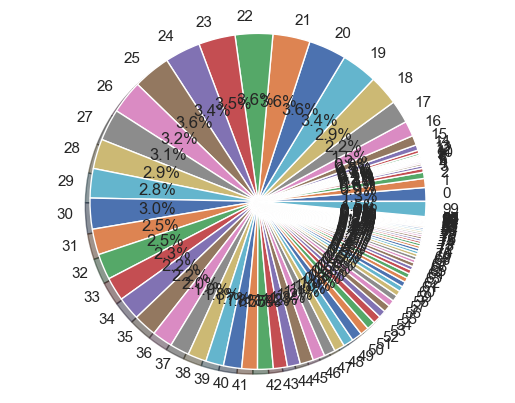

In [45]:
labels = data2['Victim Age'].astype('category').cat.categories.tolist()
counts = data2['Victim Age'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

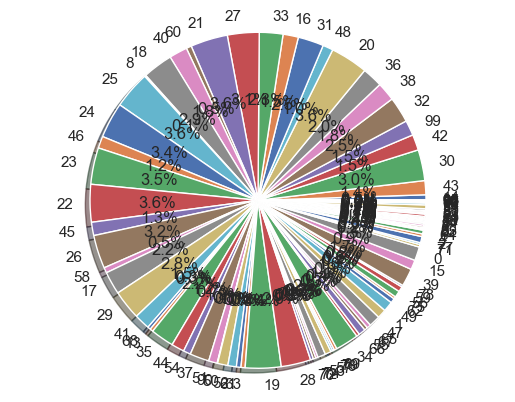

In [53]:
import matplotlib.pyplot as plt

# Step 1: Convert 'Victim Age' to a Pandas DataFrame and calculate the counts
victim_age_counts = data2.groupBy('Victim Age').count().toPandas()

# Step 2: Extract labels and sizes for the pie chart
labels = victim_age_counts['Victim Age'].tolist()
sizes = victim_age_counts['count'].tolist()

# Step 3: Create the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)

# Step 4: Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')

# Show the plot
plt.show()

**Has the age distribution change over the years?**<br>
Let's check whether the perpetrator and victim ages has changed over the period of 2 decades.. We will compare the perpetrator and victim age data from 1980-1985 to 2009-2014. 

In [46]:
# subset data for the 1980-1985 years
eighties = data2[data2['Year']<=1985]

# subset data for the 2009-2014 years 
modern = data2[data2["Year"]>=2009] 

In [54]:
# Step 1: Subset data for the 1980-1985 years
eighties = data2.filter(data2['Year'] <= 1985)

# Step 2: Subset data for the 2009-2014 years
modern = data2.filter(data2['Year'] >= 2009)

# Optional: Show the first few rows to verify
eighties.show(5)
modern.show(5)

+---------+-----------+-----------+----------------+---------+------+----+-------+--------+--------------------+------------+----------+----------+--------------------+---------------+---------------+--------------------+------------+-------------+------------+-----------------+-------------+
|Record ID|Agency Code|Agency Name|     Agency Type|     City| State|Year|  Month|Incident|          Crime Type|Crime Solved|Victim Sex|Victim Age|         Victim Race|Perpetrator Sex|Perpetrator Age|    Perpetrator Race|Relationship|       Weapon|Victim Count|Perpetrator Count|Record Source|
+---------+-----------+-----------+----------------+---------+------+----+-------+--------+--------------------+------------+----------+----------+--------------------+---------------+---------------+--------------------+------------+-------------+------------+-----------------+-------------+
|        1|    AK00101|  Anchorage|Municipal Police|Anchorage|Alaska|1980|January|       1|Murder or Manslau...|      

In [48]:
mode_eighties = eighties["Perpetrator Age"].mode()
print("Most frequent perpetrator age for years 1980-1985: ",mode_eighties)

Most frequent perpetrator age for years 1980-1985:  0    25
Name: Perpetrator Age, dtype: int32


In [56]:
from pyspark.sql import functions as F

# Step 1: Group by 'Perpetrator Age' and count the occurrences within the eighties subset
mode_eighties = eighties.groupBy('Perpetrator Age').agg(F.count('Perpetrator Age').alias('count'))

# Step 2: Find the mode by selecting the row with the maximum count
mode_value_eighties = mode_eighties.orderBy(F.col('count').desc()).first()['Perpetrator Age']

# Print the most frequent perpetrator age
print("Most frequent perpetrator age for years 1980-1985: ", mode_value_eighties)

Most frequent perpetrator age for years 1980-1985:  25


In [49]:
mode_eighties_perp = eighties["Victim Age"].mode()
print("Most frequent victim age for years 1980-1985: ",mode_eighties)

Most frequent victim age for years 1980-1985:  0    25
Name: Perpetrator Age, dtype: int32


In [57]:
from pyspark.sql import functions as F

# Step 1: Group by 'Victim Age' and count the occurrences within the eighties subset
mode_eighties_victim = eighties.groupBy('Victim Age').agg(F.count('Victim Age').alias('count'))

# Step 2: Find the mode by selecting the row with the maximum count
mode_value_eighties_victim = mode_eighties_victim.orderBy(F.col('count').desc()).first()['Victim Age']

# Print the most frequent victim age
print("Most frequent victim age for years 1980-1985: ", mode_value_eighties_victim)

Most frequent victim age for years 1980-1985:  25


Distribution of perpetrator age data for 1980-1985:

In [50]:
eighties["Perpetrator Age"].describe()

count    120976.000000
mean         31.306739
std          11.807745
min           6.000000
25%          23.000000
50%          29.000000
75%          37.000000
max          99.000000
Name: Perpetrator Age, dtype: float64

In [58]:
# Get summary statistics for the 'Perpetrator Age' column within the eighties subset
perp_age_stats_eighties = eighties.select('Perpetrator Age').describe()

# Show the results
perp_age_stats_eighties.show()

+-------+-----------------+
|summary|  Perpetrator Age|
+-------+-----------------+
|  count|           120976|
|   mean|31.35367345589208|
| stddev|12.55930958712948|
|    min|                6|
|    max|               99|
+-------+-----------------+



In [51]:
eighties["Victim Age"].describe()

count    120976.000000
mean         35.075676
std          18.234217
min           0.000000
25%          23.000000
50%          31.000000
75%          43.000000
max          99.000000
Name: Victim Age, dtype: float64

In [59]:
# Get summary statistics for the 'Victim Age' column within the eighties subset
victim_age_stats_eighties = eighties.select('Victim Age').describe()

# Show the results
victim_age_stats_eighties.show()

+-------+------------------+
|summary|        Victim Age|
+-------+------------------+
|  count|            120976|
|   mean|35.075304192567124|
| stddev|18.240645288924313|
|    min|                 0|
|    max|                99|
+-------+------------------+



Mode of perpetrator age data for 2009-2014:

In [53]:
modern["Perpetrator Age"].mode()

0    20
Name: Perpetrator Age, dtype: int32

In [61]:
from pyspark.sql import functions as F

# Step 1: Group by 'Perpetrator Age' and count the occurrences within the modern subset
mode_modern_perp = modern.groupBy('Perpetrator Age').agg(F.count('Perpetrator Age').alias('count'))

# Step 2: Find the mode by selecting the row with the maximum count
mode_value_modern_perp = mode_modern_perp.orderBy(F.col('count').desc()).first()['Perpetrator Age']

# Print the most frequent perpetrator age
print("Most frequent perpetrator age for years 2009-2014: ", mode_value_modern_perp)

Most frequent perpetrator age for years 2009-2014:  20


In [54]:
modern["Victim Age"].mode()

0    22
Name: Victim Age, dtype: int32

In [62]:
from pyspark.sql import functions as F

# Step 1: Group by 'Victim Age' and count the occurrences within the modern subset
mode_modern_victim = modern.groupBy('Victim Age').agg(F.count('Victim Age').alias('count'))

# Step 2: Find the mode by selecting the row with the maximum count
mode_value_modern_victim = mode_modern_victim.orderBy(F.col('count').desc()).first()['Victim Age']

# Print the most frequent victim age
print("Most frequent victim age for years 2009-2014: ", mode_value_modern_victim)

Most frequent victim age for years 2009-2014:  22


Distribution of perpetrator age data for 2009-2014:

In [55]:
modern["Perpetrator Age"].describe()

count    89526.000000
mean        31.762840
std         12.427338
min          6.000000
25%         22.000000
50%         29.000000
75%         38.000000
max         99.000000
Name: Perpetrator Age, dtype: float64

In [63]:
# Get summary statistics for the 'Perpetrator Age' column within the modern subset
perp_age_stats_modern = modern.select('Perpetrator Age').describe()

# Show the results
perp_age_stats_modern.show()

+-------+------------------+
|summary|   Perpetrator Age|
+-------+------------------+
|  count|             89526|
|   mean|31.862151777137367|
| stddev|13.332936340349494|
|    min|                 6|
|    max|                99|
+-------+------------------+



In [56]:
modern["Victim Age"].describe()

count    89526.000000
mean        33.851864
std         17.268654
min          0.000000
25%         22.000000
50%         30.000000
75%         44.000000
max         99.000000
Name: Victim Age, dtype: float64

In [64]:
# Get summary statistics for the 'Victim Age' column within the modern subset
victim_age_stats_modern = modern.select('Victim Age').describe()

# Show the results
victim_age_stats_modern.show()

+-------+------------------+
|summary|        Victim Age|
+-------+------------------+
|  count|             89526|
|   mean|33.853349864843736|
| stddev|17.278398065612738|
|    min|                 0|
|    max|                99|
+-------+------------------+



**Maping peprpetrator and victim ages into groups**<br>

In [57]:
# create a function that will take 1 argument
# if that value (argument) is smaller than 21 return child, if older than 60 return elder, otherwise its adult
def age_group(x):
    if x <21:
        return 'child'
    if x > 60:
        return 'elder'
    else:
        return 'adult'

# Create a copy as we will only use this column for these charts
data3 = data2.copy()
# Create a new column (series) that will have the same data as perpetrator and victim age
data3['Perpetrator_Age_Group'] = data3['Perpetrator Age']
data3['Victim_Age_Group'] = data3['Victim Age']
# apply the function above to the new series 
data3['Perpetrator_Age_Group'] = data3['Perpetrator_Age_Group'].apply(age_group)
data3['Victim_Age_Group'] = data3['Victim_Age_Group'].apply(age_group)
# display first 3 rows
data3.head(3)

Record ID Agency Code Agency Name       Agency Type       City   State  \
0          1     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
1          2     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
2          3     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   

   Year    Month  Incident              Crime Type  ... Perpetrator Sex  \
0  1980  January         1  Murder or Manslaughter  ...            Male   
1  1980    March         1  Murder or Manslaughter  ...            Male   
2  1980    March         2  Murder or Manslaughter  ...         Unknown   

  Perpetrator Age               Perpetrator Race  Relationship         Weapon  \
0              15  Native American/Alaska Native  Acquaintance   Blunt Object   
1              42                          White  Acquaintance  Strangulation   
2              42                        Unknown       Unknown        Unknown   

   Victim Count Perpetrator Count Record Source Perpetrator_Age_Group  \
0             2                 1           FBI                 child   
1             2                 1           FBI                 adult   
2             2                 1           FBI                 adult   

   Victim_Age_Group  
0             child  
1             adult  
2             adult  

[3 rows x 24 columns]

In [65]:
from pyspark.sql.functions import when, col

# Step 1: Create a copy of the DataFrame (in PySpark, this is typically done by reassigning the DataFrame)
data3 = data2

# Step 2: Define the conditions for the age groups
data3 = data3.withColumn('Perpetrator_Age_Group',
                         when(col('Perpetrator Age') < 21, 'child')
                         .when(col('Perpetrator Age') > 60, 'elder')
                         .otherwise('adult'))

data3 = data3.withColumn('Victim_Age_Group',
                         when(col('Victim Age') < 21, 'child')
                         .when(col('Victim Age') > 60, 'elder')
                         .otherwise('adult'))

# Step 3: Show the first 3 rows
data3.select('Perpetrator_Age_Group', 'Victim_Age_Group').show(3)

+---------------------+----------------+
|Perpetrator_Age_Group|Victim_Age_Group|
+---------------------+----------------+
|                child|           child|
|                adult|           adult|
|                adult|           adult|
+---------------------+----------------+
only showing top 3 rows



**What age group is the most predominent for perpetrators and victims?**<br>
Value counts, counts the number of times the value occurs in the data. From this we see that adults represent the most data points for both perpetrators and victims. This is not suprising since the child group only has the ages 6-20. From the data we see that there are more victims that are elders compared to perpetrators. 

Text(0, 0.5, 'Value Counts')

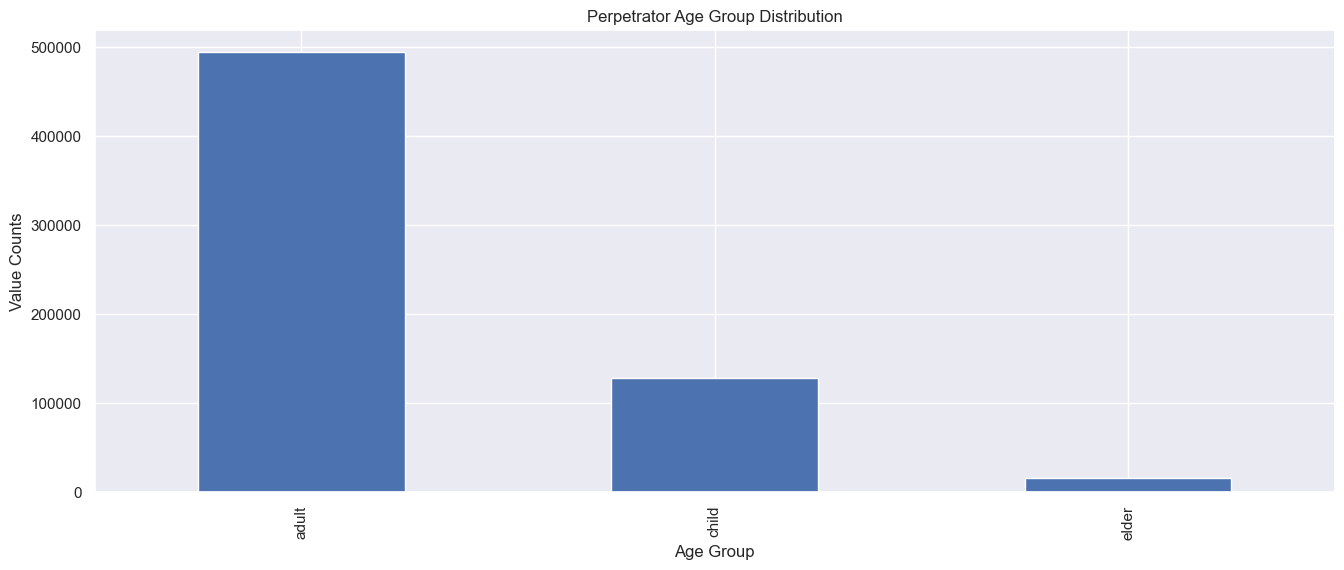

In [58]:
# pick a data frame series, calculate the value counts and plot a bar chart
data3['Perpetrator_Age_Group'].value_counts().plot(kind='bar', figsize=[16,6])
# assign title and labels
plt.title('Perpetrator Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Value Counts')

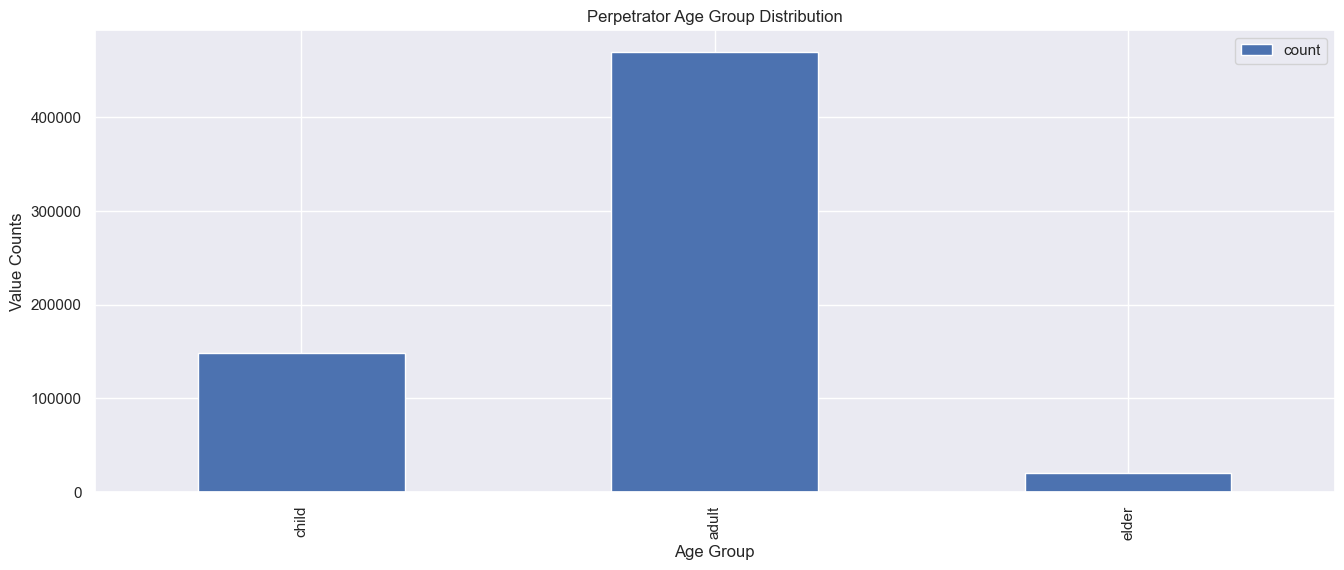

In [66]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# Step 1: Calculate the value counts for the 'Perpetrator_Age_Group' column
age_group_counts = data3.groupBy('Perpetrator_Age_Group').agg(F.count('Perpetrator_Age_Group').alias('count'))

# Step 2: Convert the result to a Pandas DataFrame for plotting
age_group_counts_pd = age_group_counts.toPandas()

# Step 3: Plot the bar chart using Matplotlib
age_group_counts_pd.plot(x='Perpetrator_Age_Group', y='count', kind='bar', figsize=[16, 6])

# Step 4: Assign title and labels
plt.title('Perpetrator Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Value Counts')

# Display the plot
plt.show()

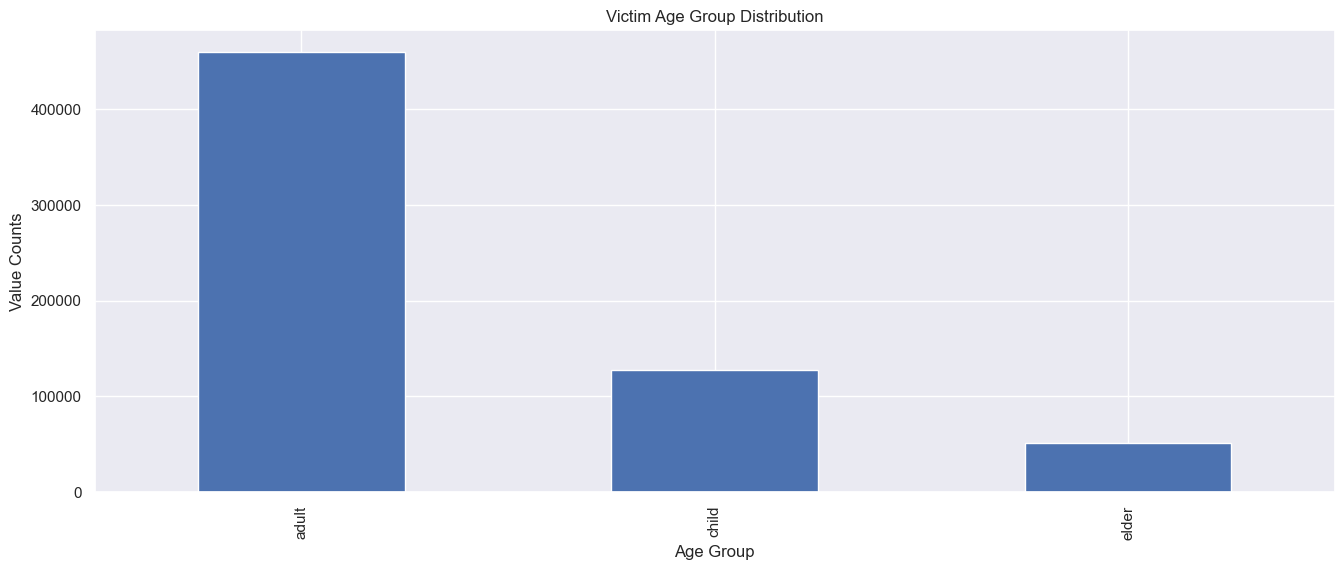

In [59]:
# pick a data frame series, calculate the value counts and plot a bar chart
data3['Victim_Age_Group'].value_counts().plot(kind='bar',figsize=[16,6])
# assign title and labels
plt.title('Victim Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Value Counts')
plt.show()

# 3. Race and Sex

C:\Users\Admin\AppData\Local\Temp\ipykernel_31060\2382524075.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='Perpetrator Race',y='Incident',data=data2, kind='bar',aspect=3,ci=None)
C:\Users\Admin\AppData\Local\Temp\ipykernel_31060\2382524075.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='Victim Race',y='Incident',data=data2, kind='bar',aspect=3,ci=None)


Text(0.5, 12.44444444444443, 'Race')

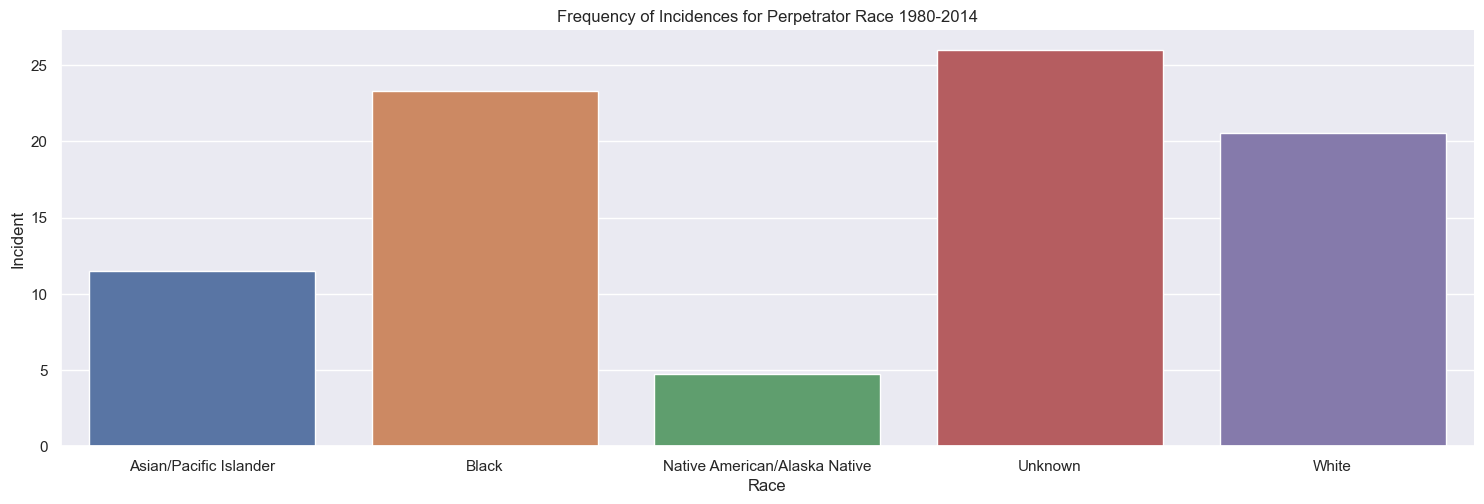

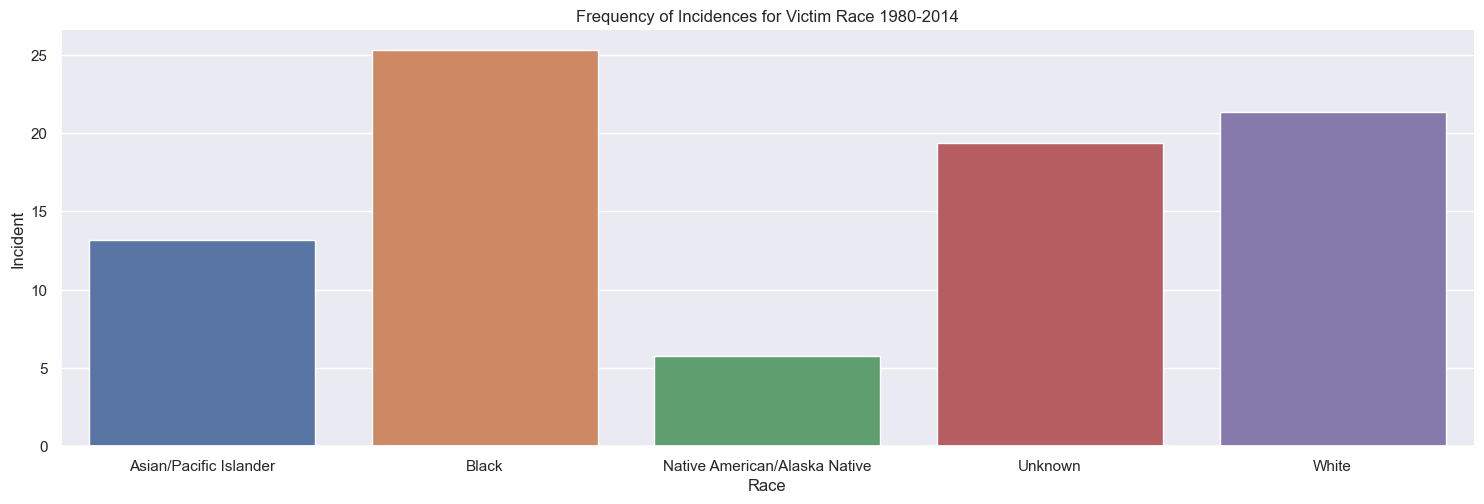

In [60]:
sns.catplot(x='Perpetrator Race',y='Incident',data=data2, kind='bar',aspect=3,ci=None)
plt.title('Frequency of Incidences for Perpetrator Race 1980-2014')
plt.xlabel('Race')
sns.catplot(x='Victim Race',y='Incident',data=data2, kind='bar',aspect=3,ci=None)
plt.title('Frequency of Incidences for Victim Race 1980-2014')
plt.xlabel('Race')

C:\Users\Admin\AppData\Local\Temp\ipykernel_31424\449216778.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='Perpetrator Race', y='Incident', data=perp_race_counts, kind='bar', aspect=3, ci=None)


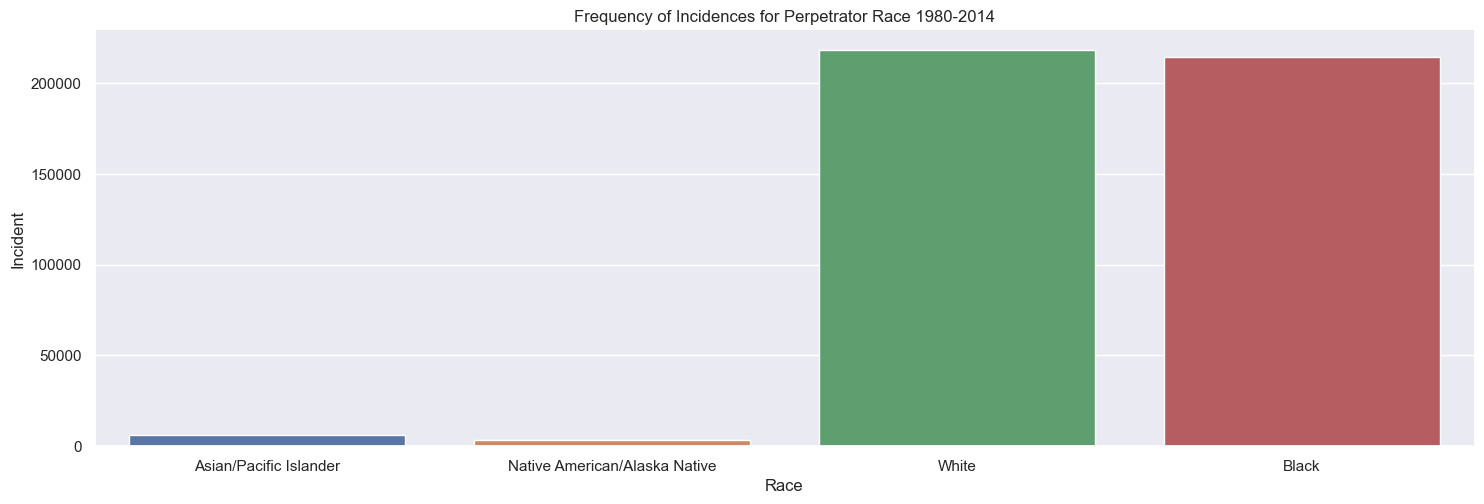

C:\Users\Admin\AppData\Local\Temp\ipykernel_31424\449216778.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='Victim Race', y='Incident', data=victim_race_counts, kind='bar', aspect=3, ci=None)


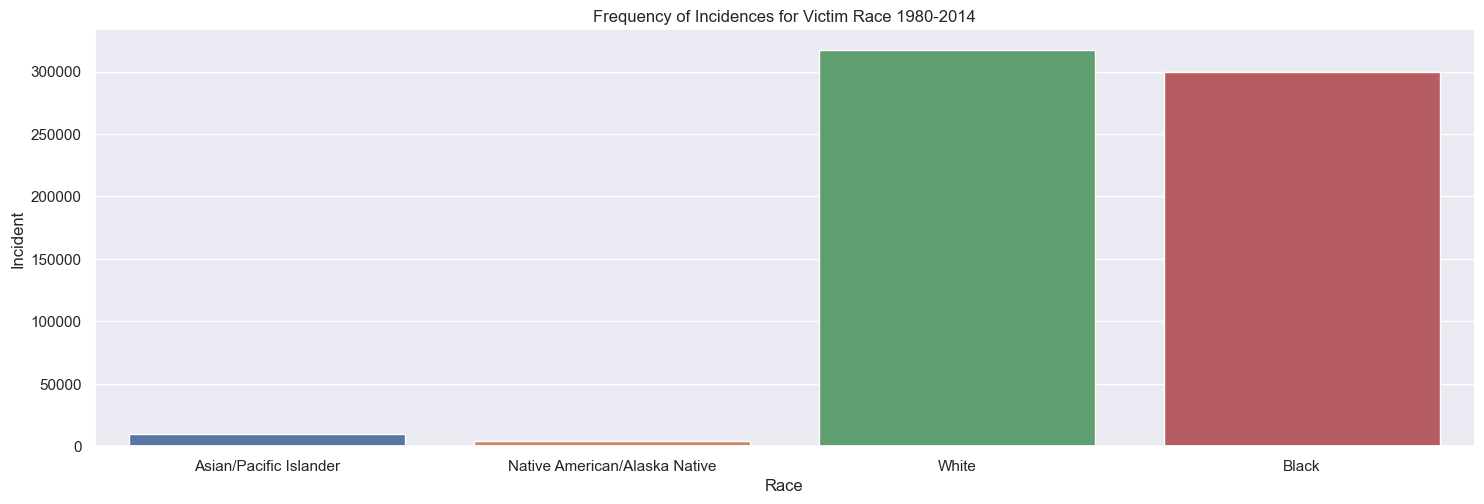

In [68]:
from pyspark.sql import functions as F
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Group by 'Perpetrator Race' and count the number of 'Incident' occurrences
perp_race_counts = data2.groupBy('Perpetrator Race').agg(F.count('Incident').alias('Incident')).toPandas()

# Step 2: Plot the bar chart for Perpetrator Race
sns.catplot(x='Perpetrator Race', y='Incident', data=perp_race_counts, kind='bar', aspect=3, ci=None)
plt.title('Frequency of Incidences for Perpetrator Race 1980-2014')
plt.xlabel('Race')
plt.show()

# Step 3: Group by 'Victim Race' and count the number of 'Incident' occurrences
victim_race_counts = data2.groupBy('Victim Race').agg(F.count('Incident').alias('Incident')).toPandas()

# Step 4: Plot the bar chart for Victim Race
sns.catplot(x='Victim Race', y='Incident', data=victim_race_counts, kind='bar', aspect=3, ci=None)
plt.title('Frequency of Incidences for Victim Race 1980-2014')
plt.xlabel('Race')
plt.show()

**What is the age group distribution for each race?**<br>

C:\Users\Admin\AppData\Local\Temp\ipykernel_31060\688734448.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(data=data3,x='Perpetrator Race',y='Incident',hue='Perpetrator_Age_Group',kind='bar',ci=None,aspect=3)
C:\Users\Admin\AppData\Local\Temp\ipykernel_31060\688734448.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(data=data3,x='Victim Race',y='Incident',hue='Victim_Age_Group',kind='bar',ci=None,aspect=3)


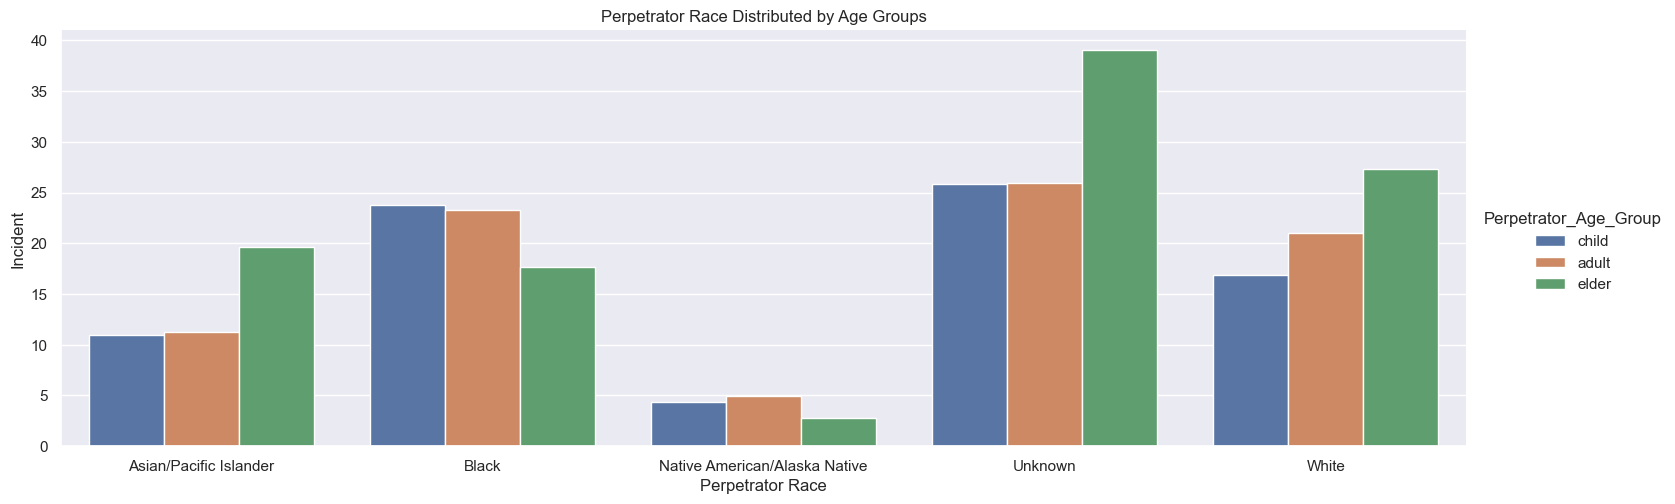

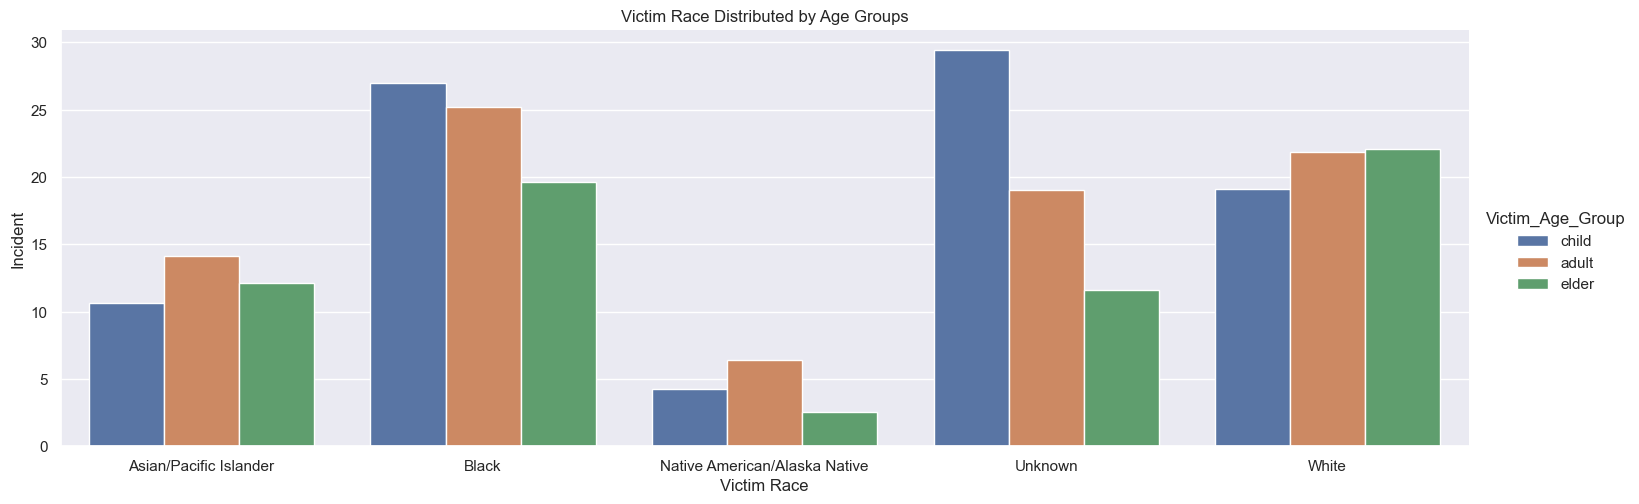

In [61]:
sns.catplot(data=data3,x='Perpetrator Race',y='Incident',hue='Perpetrator_Age_Group',kind='bar',ci=None,aspect=3)
plt.title('Perpetrator Race Distributed by Age Groups')
sns.catplot(data=data3,x='Victim Race',y='Incident',hue='Victim_Age_Group',kind='bar',ci=None,aspect=3)
plt.title('Victim Race Distributed by Age Groups')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_31424\4256253988.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(data=perp_race_age_counts, x='Perpetrator Race', y='Incident', hue='Perpetrator_Age_Group', kind='bar', ci=None, aspect=3)
C:\Users\Admin\AppData\Local\Temp\ipykernel_31424\4256253988.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(data=victim_race_age_counts, x='Victim Race', y='Incident', hue='Victim_Age_Group', kind='bar', ci=None, aspect=3)


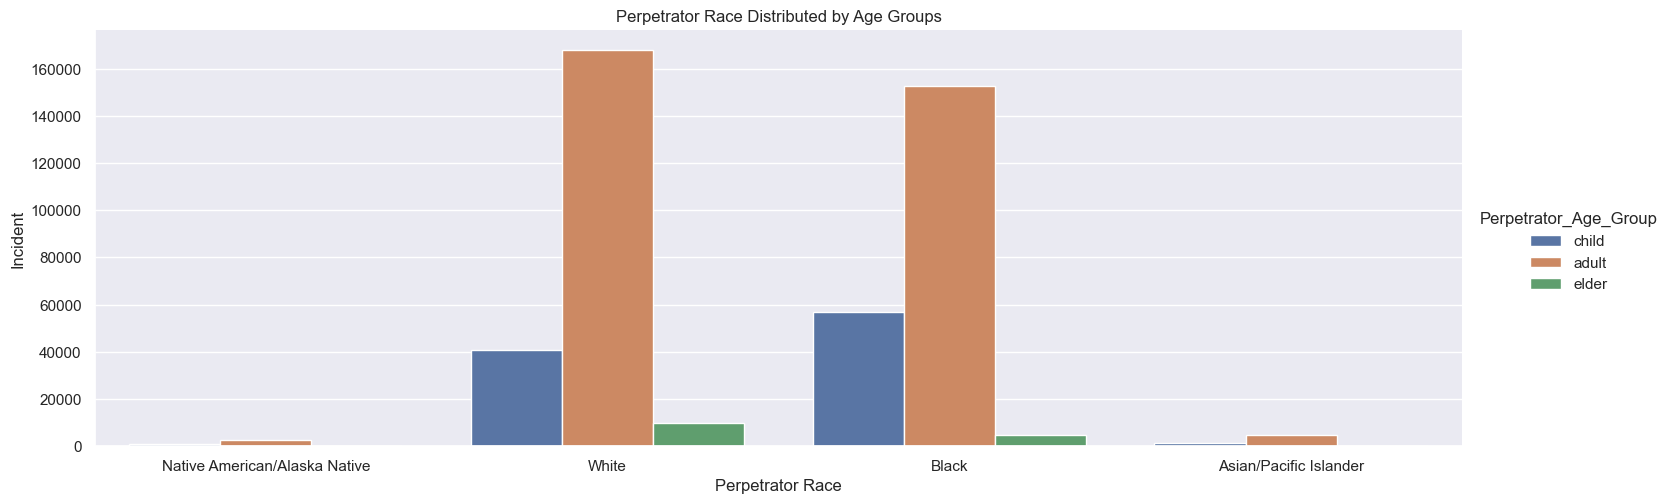

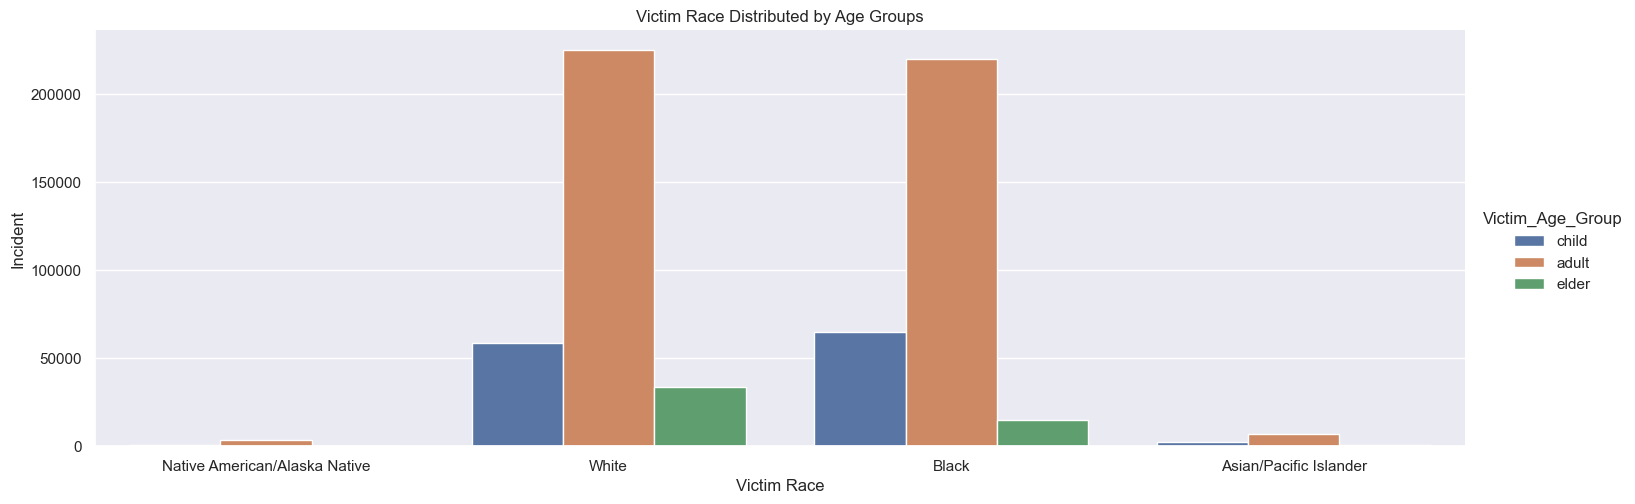

In [69]:
from pyspark.sql import functions as F
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Group by 'Perpetrator Race' and 'Perpetrator_Age_Group', and count the number of 'Incident' occurrences
perp_race_age_counts = data3.groupBy('Perpetrator Race', 'Perpetrator_Age_Group').agg(F.count('Incident').alias('Incident')).toPandas()

# Step 2: Plot the bar chart for Perpetrator Race distributed by Age Groups
sns.catplot(data=perp_race_age_counts, x='Perpetrator Race', y='Incident', hue='Perpetrator_Age_Group', kind='bar', ci=None, aspect=3)
plt.title('Perpetrator Race Distributed by Age Groups')

# Step 3: Group by 'Victim Race' and 'Victim_Age_Group', and count the number of 'Incident' occurrences
victim_race_age_counts = data3.groupBy('Victim Race', 'Victim_Age_Group').agg(F.count('Incident').alias('Incident')).toPandas()

# Step 4: Plot the bar chart for Victim Race distributed by Age Groups
sns.catplot(data=victim_race_age_counts, x='Victim Race', y='Incident', hue='Victim_Age_Group', kind='bar', ci=None, aspect=3)
plt.title('Victim Race Distributed by Age Groups')

# Show the plots
plt.show()

**Perpetrator and victim sex distribution for each race?**<br>

C:\Users\Admin\AppData\Local\Temp\ipykernel_31060\2259039629.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='Perpetrator Race',y='Incident',hue='Perpetrator Sex',data=data2, kind='bar',aspect=3,ci=None)
C:\Users\Admin\AppData\Local\Temp\ipykernel_31060\2259039629.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='Victim Race',y='Incident',hue='Victim Sex',data=data2, kind='bar',aspect=3,ci=None)


Text(0.5, 32.99999999999997, 'Race and Sex')

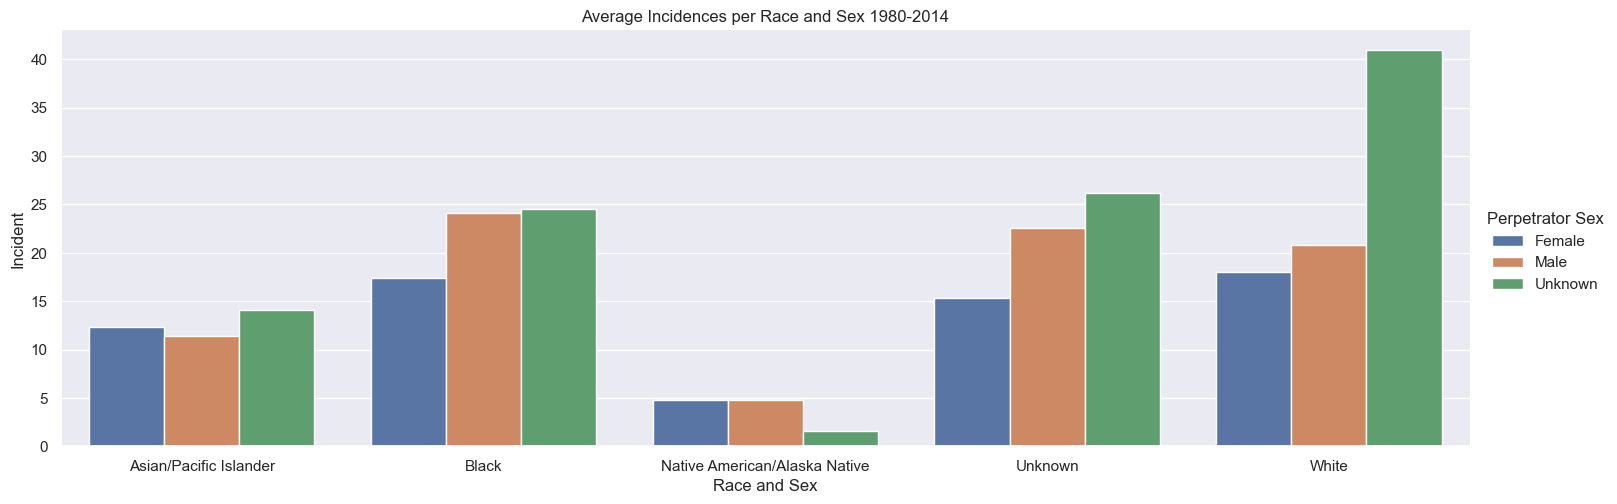

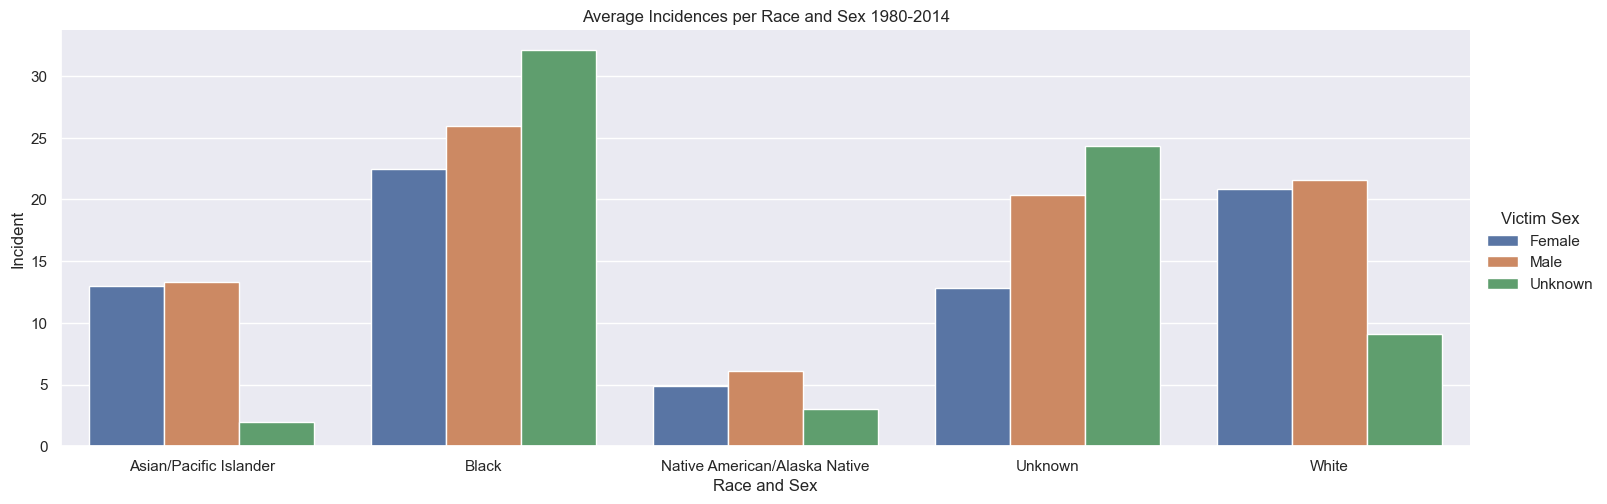

In [62]:
sns.catplot(x='Perpetrator Race',y='Incident',hue='Perpetrator Sex',data=data2, kind='bar',aspect=3,ci=None)
plt.title('Average Incidences per Race and Sex 1980-2014')
plt.xlabel('Race and Sex')
sns.catplot(x='Victim Race',y='Incident',hue='Victim Sex',data=data2, kind='bar',aspect=3,ci=None)
plt.title('Average Incidences per Race and Sex 1980-2014')
plt.xlabel('Race and Sex')

C:\Users\Admin\AppData\Local\Temp\ipykernel_31424\2014536523.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='Perpetrator Race', y='Incident', hue='Perpetrator Sex', data=perp_race_sex_counts, kind='bar', aspect=3, ci=None)
C:\Users\Admin\AppData\Local\Temp\ipykernel_31424\2014536523.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='Victim Race', y='Incident', hue='Victim Sex', data=victim_race_sex_counts, kind='bar', aspect=3, ci=None)


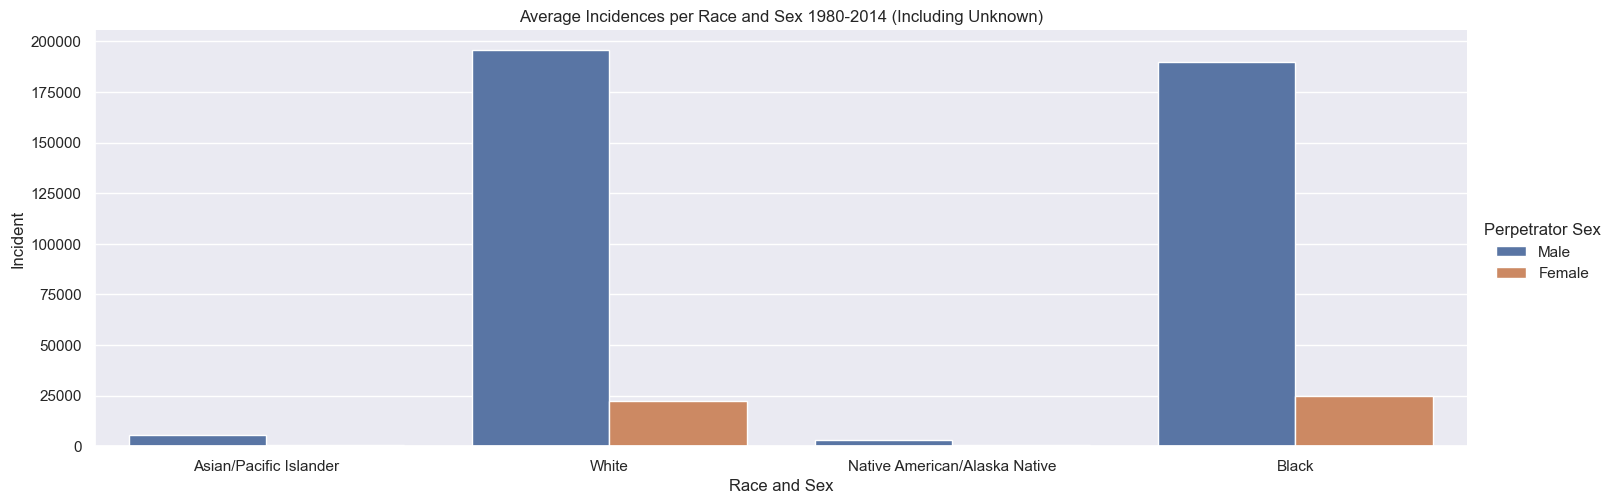

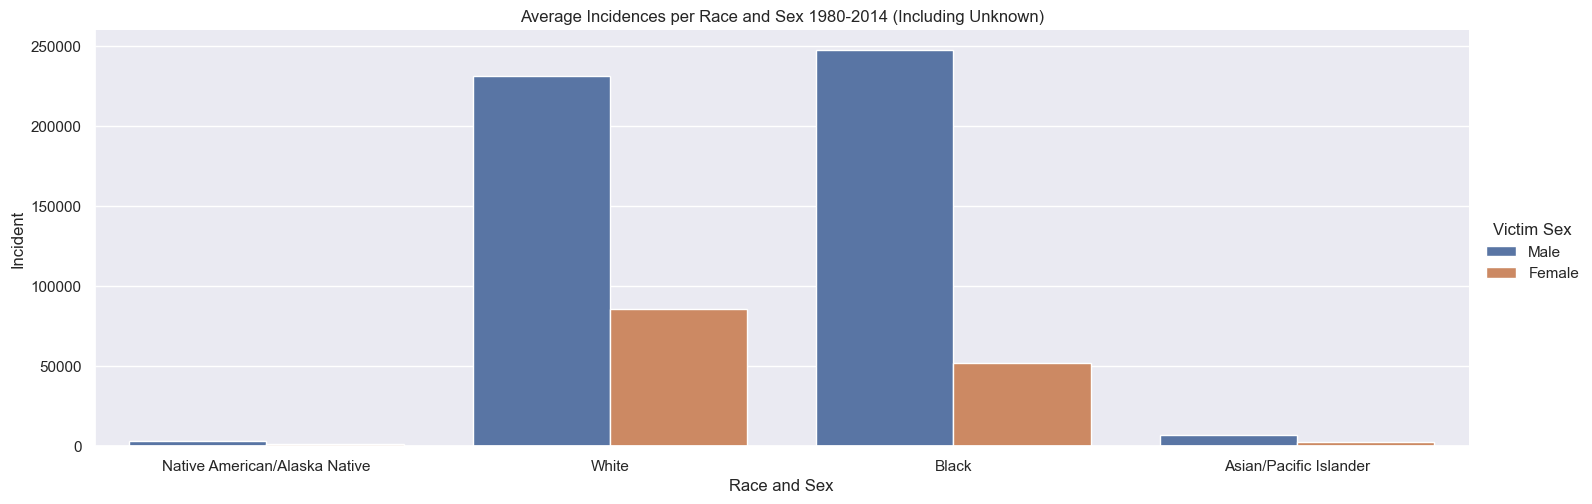

In [72]:
from pyspark.sql import functions as F
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Group by 'Perpetrator Race' and 'Perpetrator Sex', and count the number of 'Incident' occurrences
perp_race_sex_counts = data2.groupBy('Perpetrator Race', 'Perpetrator Sex').agg(F.count('Incident').alias('Incident')).toPandas()

# Step 2: Plot the bar chart for Perpetrator Race and Sex, including "Unknown"
sns.catplot(x='Perpetrator Race', y='Incident', hue='Perpetrator Sex', data=perp_race_sex_counts, kind='bar', aspect=3, ci=None)
plt.title('Average Incidences per Race and Sex 1980-2014 (Including Unknown)')
plt.xlabel('Race and Sex')

# Step 3: Group by 'Victim Race' and 'Victim Sex', and count the number of 'Incident' occurrences
victim_race_sex_counts = data2.groupBy('Victim Race', 'Victim Sex').agg(F.count('Incident').alias('Incident')).toPandas()

# Step 4: Plot the bar chart for Victim Race and Sex, including "Unknown"
sns.catplot(x='Victim Race', y='Incident', hue='Victim Sex', data=victim_race_sex_counts, kind='bar', aspect=3, ci=None)
plt.title('Average Incidences per Race and Sex 1980-2014 (Including Unknown)')
plt.xlabel('Race and Sex')

# Show the plots
plt.show()

# 4. Relationship

As there are many different relationship values we will group them together in 4 different categories: 
1. Unknown 
    - Contains relationships: Unknown
2. Family (for close family members)
    - Contains relationships: Wife, husband, brother, sister, step-daughter, step-son, son, mother, common-law-husband,
        common-law-wife, step-father, step-momther, daughter, in-law, ex-husband, ex-wife
3. Outer family
    - Contains relationships: Stranger, girlfriend, ex-husband, ex-wife, boyfriend, boyfriend/girlfriend
4. Not family
    - Contains relationships: Neighbor, employee, employer, acquaintance, friend
        
From this we can already see that there are more values available for family and outer family members. 

In [63]:
replace_map_relationship = {'Acquaintance': 'Not family', 'Unknown': 'Unknown', 'Wife': 'Family', 
                                'Stranger': 'Not family','Girlfriend': 'Outer family', 'Ex-Husband': 'Family', 
                                'Brother': 'Family' , 'Stepdaughter': 'Family' , 'Husband': 'Family',
                                'Sister': 'Family','Friend': 'Outer family', 'Neighbor': 'Not family', 
                                'Father': 'Family','In-Law': 'Family', 'Son':'Family',
       'Ex-Wife':'Family', 'Boyfriend':'Outer family', 'Mother':'Family', 'Common-Law Husband':'Family',
       'Common-Law Wife':'Family', 'Stepfather':'Family', 'Stepson':'Family', 'Stepmother':'Family',
       'Daughter':'Family', 'Boyfriend/Girlfriend':'Outer family', 'Employer':'Not family', 'Employee':'Not family'
                                }

data3['relationship_group'] = data['Relationship']
data3['relationship_group'] = data3['relationship_group'].map(replace_map_relationship)

In [73]:
from pyspark.sql.functions import when, col

# Step 1: Create a copy of the 'Relationship' column
data3 = data2.withColumn('relationship_group', col('Relationship'))

# Step 2: Apply the mapping using when() and otherwise() for each case
data3 = data3.withColumn('relationship_group', 
    when(col('Relationship') == 'Acquaintance', 'Not family')
    .when(col('Relationship') == 'Unknown', 'Unknown')
    .when(col('Relationship') == 'Wife', 'Family')
    .when(col('Relationship') == 'Stranger', 'Not family')
    .when(col('Relationship') == 'Girlfriend', 'Outer family')
    .when(col('Relationship') == 'Ex-Husband', 'Family')
    .when(col('Relationship') == 'Brother', 'Family')
    .when(col('Relationship') == 'Stepdaughter', 'Family')
    .when(col('Relationship') == 'Husband', 'Family')
    .when(col('Relationship') == 'Sister', 'Family')
    .when(col('Relationship') == 'Friend', 'Outer family')
    .when(col('Relationship') == 'Neighbor', 'Not family')
    .when(col('Relationship') == 'Father', 'Family')
    .when(col('Relationship') == 'In-Law', 'Family')
    .when(col('Relationship') == 'Son', 'Family')
    .when(col('Relationship') == 'Ex-Wife', 'Family')
    .when(col('Relationship') == 'Boyfriend', 'Outer family')
    .when(col('Relationship') == 'Mother', 'Family')
    .when(col('Relationship') == 'Common-Law Husband', 'Family')
    .when(col('Relationship') == 'Common-Law Wife', 'Family')
    .when(col('Relationship') == 'Stepfather', 'Family')
    .when(col('Relationship') == 'Stepson', 'Family')
    .when(col('Relationship') == 'Stepmother', 'Family')
    .when(col('Relationship') == 'Daughter', 'Family')
    .when(col('Relationship') == 'Boyfriend/Girlfriend', 'Outer family')
    .when(col('Relationship') == 'Employer', 'Not family')
    .when(col('Relationship') == 'Employee', 'Not family')
    .otherwise('Unknown')  # Just in case any other value is encountered
)

# Show the resulting DataFrame to verify the mapping
data3.select('Relationship', 'relationship_group').show(10)

+------------+------------------+
|Relationship|relationship_group|
+------------+------------------+
|Acquaintance|        Not family|
|Acquaintance|        Not family|
|        null|           Unknown|
|Acquaintance|        Not family|
|        null|           Unknown|
|Acquaintance|        Not family|
|        Wife|            Family|
|        Wife|            Family|
|        null|           Unknown|
|        null|           Unknown|
+------------+------------------+
only showing top 10 rows



**What relationship group has the most homicides?**<br>

C:\Users\Admin\AppData\Local\Temp\ipykernel_31060\2262216524.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='relationship_group',y='Incident',data=data3, kind='bar',aspect=3,ci=None)


Text(0.5, 12.44444444444443, 'Relationship Groups')

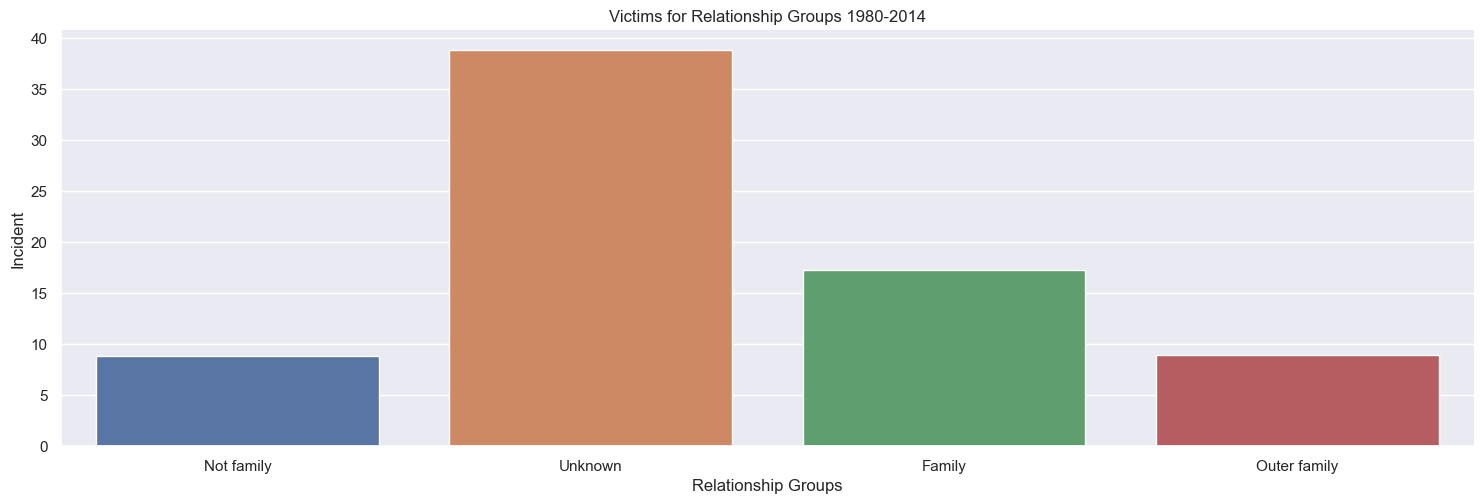

In [64]:
sns.catplot(x='relationship_group',y='Incident',data=data3, kind='bar',aspect=3,ci=None)
plt.title('Victims for Relationship Groups 1980-2014')
plt.xlabel('Relationship Groups')

C:\Users\Admin\AppData\Local\Temp\ipykernel_31424\2214564718.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='relationship_group', y='Incident', data=relationship_group_counts, kind='bar', aspect=3, ci=None)


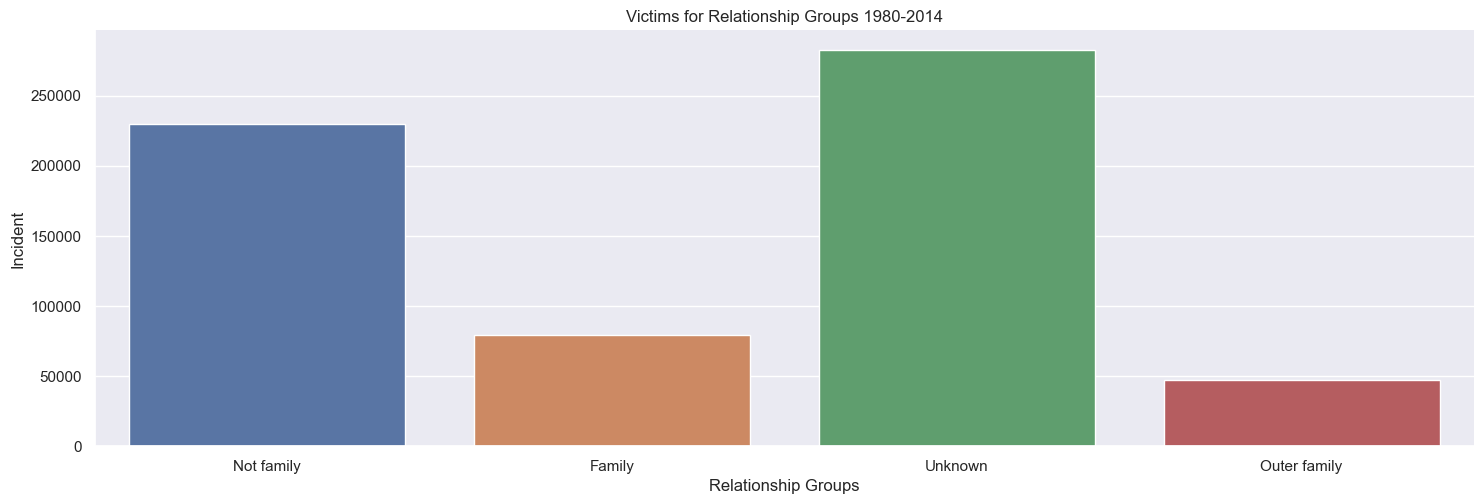

In [74]:
from pyspark.sql import functions as F
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Group by 'relationship_group' and count the number of 'Incident' occurrences
relationship_group_counts = data3.groupBy('relationship_group').agg(F.count('Incident').alias('Incident')).toPandas()

# Step 2: Plot the bar chart for Relationship Groups
sns.catplot(x='relationship_group', y='Incident', data=relationship_group_counts, kind='bar', aspect=3, ci=None)
plt.title('Victims for Relationship Groups 1980-2014')
plt.xlabel('Relationship Groups')

# Show the plot
plt.show()

# 5. Weapon

In [65]:
data3['Relationship'].value_counts().head(5)

Unknown         273013
Acquaintance    126018
Stranger         96593
Wife             23187
Friend           21945
Name: Relationship, dtype: int64

In [75]:
from pyspark.sql import functions as F

# Step 1: Count the occurrences of each value in the 'Relationship' column
relationship_counts = data3.groupBy('Relationship').agg(F.count('Relationship').alias('count'))

# Step 2: Order by count in descending order and take the top 5
top_5_relationships = relationship_counts.orderBy(F.col('count').desc()).limit(5)

# Step 3: Show the results
top_5_relationships.show()

+------------+------+
|Relationship| count|
+------------+------+
|Acquaintance|126018|
|    Stranger| 96593|
|        Wife| 23187|
|      Friend| 21945|
|  Girlfriend| 16465|
+------------+------+



Text(0, 0.5, 'Value Counts')

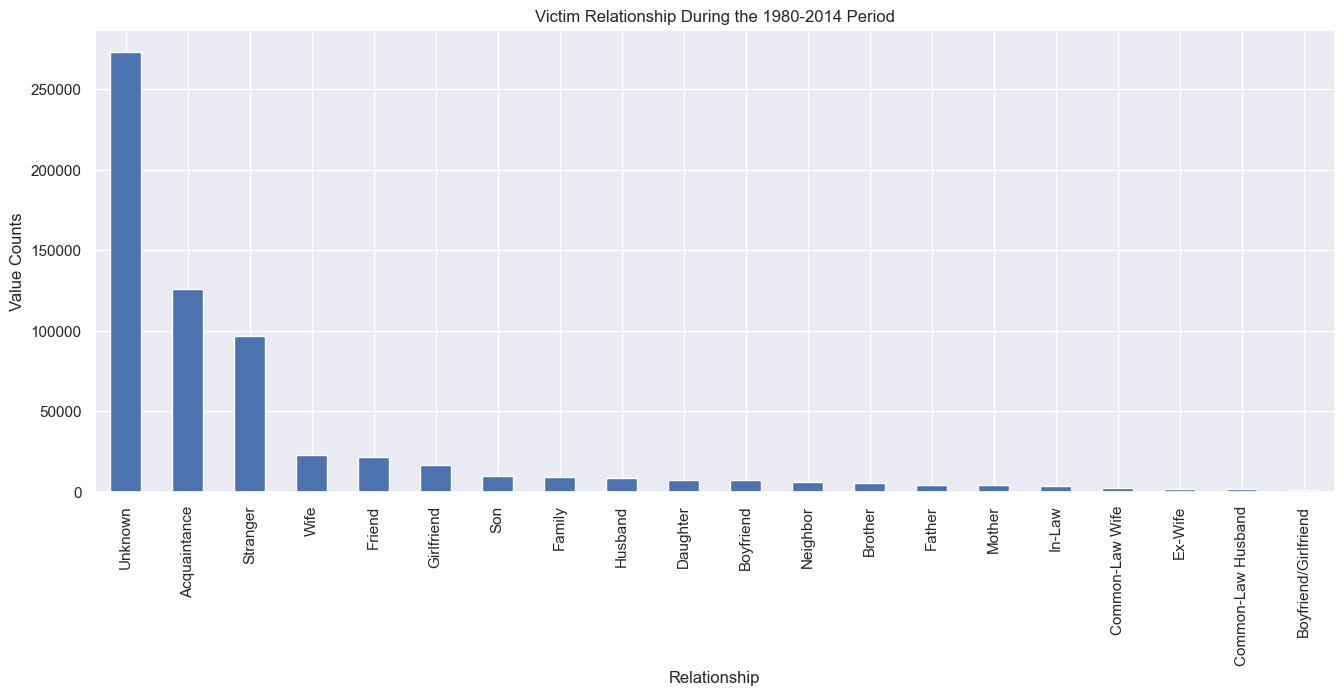

In [66]:
data3['Relationship'].value_counts().head(20).plot(kind='bar',figsize=[16,6])
plt.title('Victim Relationship During the 1980-2014 Period')
plt.xlabel('Relationship')
plt.ylabel('Value Counts')

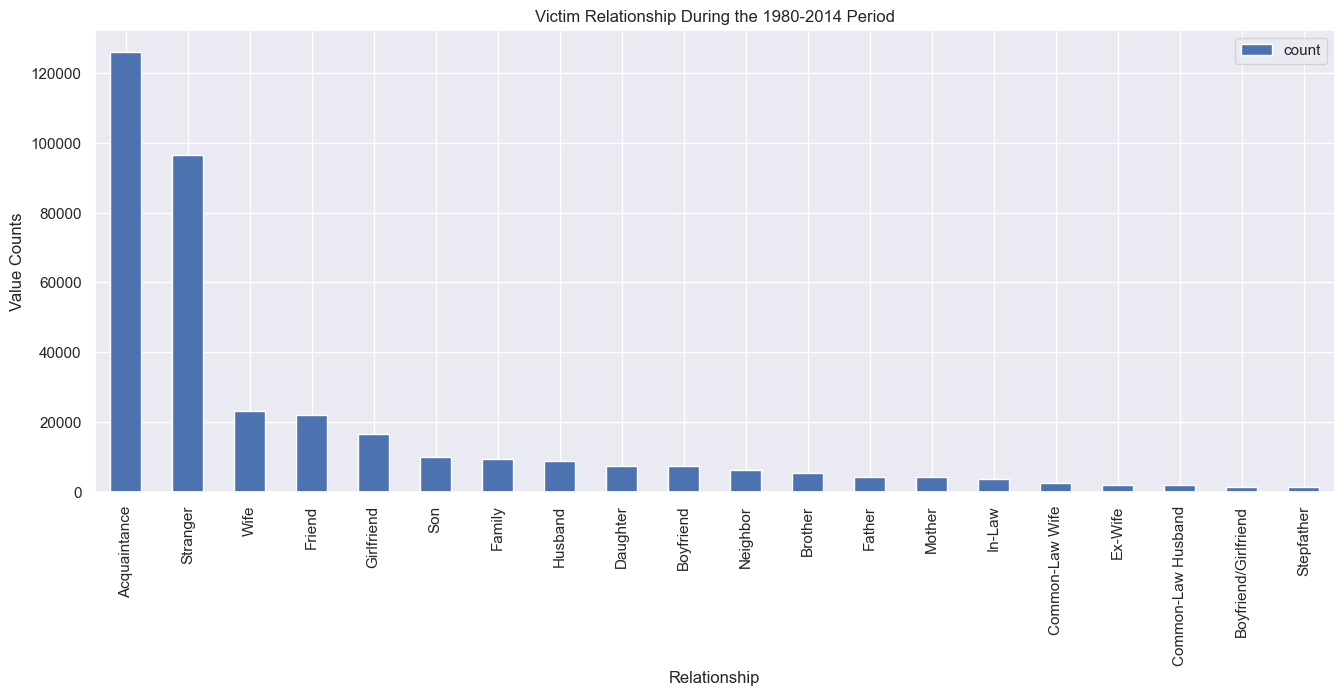

In [76]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# Step 1: Count the occurrences of each value in the 'Relationship' column
relationship_counts = data3.groupBy('Relationship').agg(F.count('Relationship').alias('count'))

# Step 2: Order by count in descending order and take the top 20
top_20_relationships = relationship_counts.orderBy(F.col('count').desc()).limit(20)

# Step 3: Convert the result to a Pandas DataFrame for plotting
top_20_relationships_pd = top_20_relationships.toPandas()

# Step 4: Plot the bar chart using Matplotlib
top_20_relationships_pd.plot(x='Relationship', y='count', kind='bar', figsize=[16, 6])

# Add title and labels
plt.title('Victim Relationship During the 1980-2014 Period')
plt.xlabel('Relationship')
plt.ylabel('Value Counts')

# Show the plot
plt.show()

**What is the most common weapon used in homicides?**<br>

In [67]:
# count the values of the weapon data frame series
data2['Weapon'].value_counts()

Handgun          317484
Knife             94962
Blunt Object      67337
Firearm           46980
Unknown           33192
Shotgun           30722
Rifle             23347
Strangulation      8110
Fire               6173
Suffocation        3968
Gun                2206
Drugs              1588
Drowning           1204
Explosives          537
Poison              454
Fall                190
Name: Weapon, dtype: int64

In [77]:
from pyspark.sql import functions as F

# Step 1: Count the occurrences of each value in the 'Weapon' column
weapon_counts = data2.groupBy('Weapon').agg(F.count('Weapon').alias('count'))

# Step 2: Order by count in descending order to see the most common weapons first
weapon_counts = weapon_counts.orderBy(F.col('count').desc())

# Step 3: Show the result
weapon_counts.show()

+-------------+------+
|       Weapon| count|
+-------------+------+
|      Handgun|317484|
|        Knife| 94962|
| Blunt Object| 67337|
|      Firearm| 46980|
|      Shotgun| 30722|
|        Rifle| 23347|
|Strangulation|  8110|
|         Fire|  6173|
|  Suffocation|  3968|
|          Gun|  2206|
|        Drugs|  1588|
|     Drowning|  1204|
|   Explosives|   537|
|       Poison|   454|
|         Fall|   190|
|         null|     0|
+-------------+------+



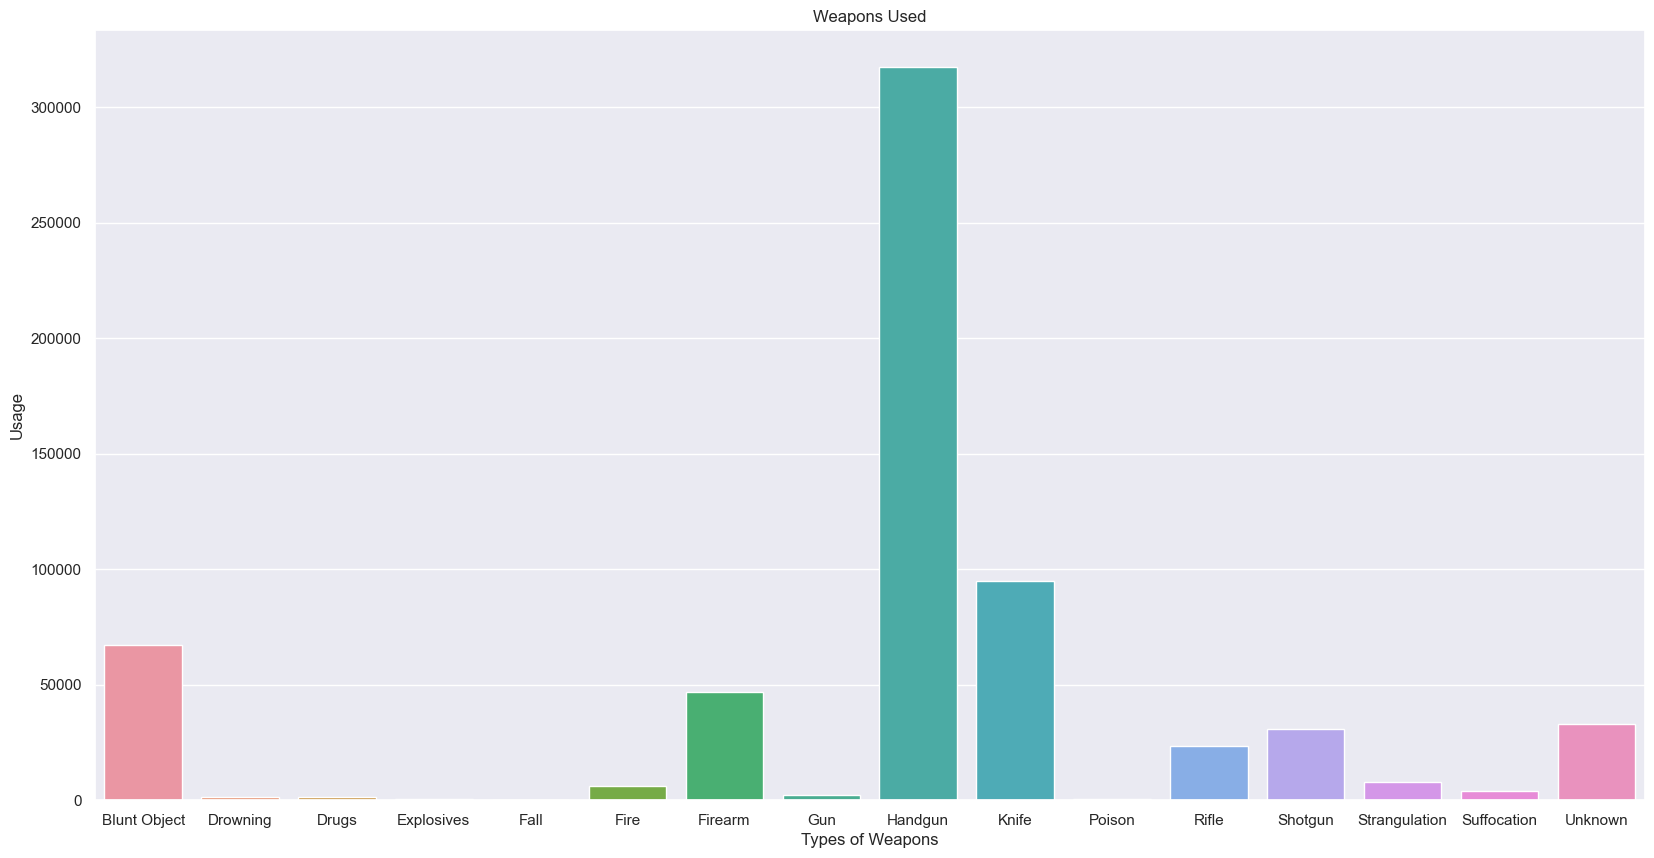

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the subplot with the specified chart size
count, ax = plt.subplots(figsize=(20, 10))

# Create a countplot using the column 'Weapon' from the DataFrame 'data2'
ax = sns.countplot(x='Weapon', data=data2)  # Use 'x=' to specify the column

# Set the title and labels
ax.set_title('Weapons Used')
ax.set_xlabel('Types of Weapons')
ax.set_ylabel('Usage')

# Display the plot
plt.show()

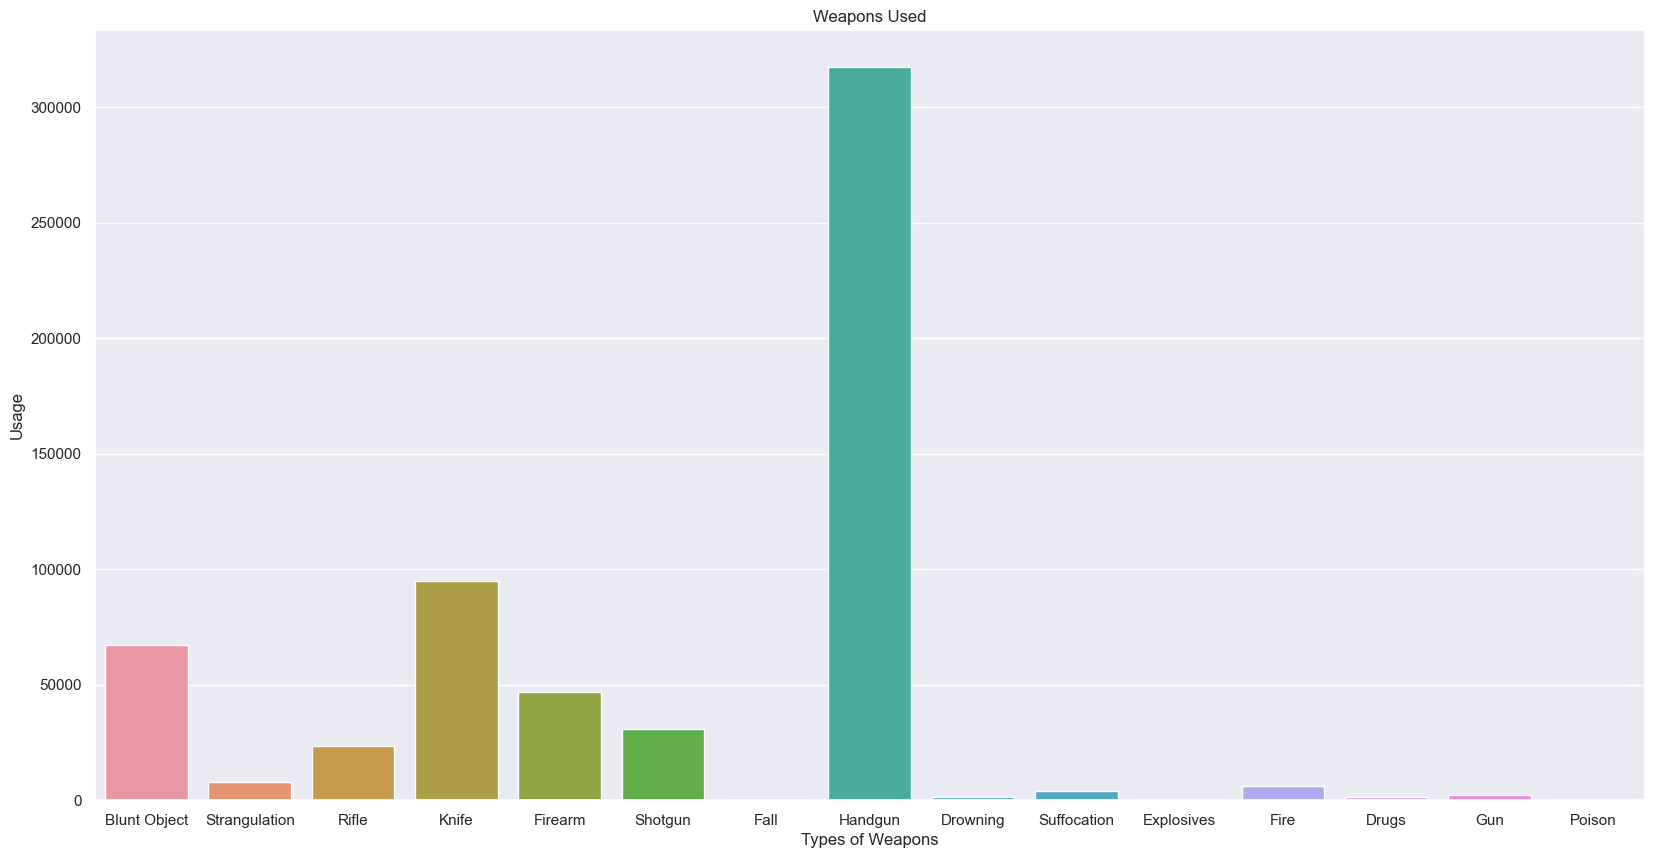

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the PySpark DataFrame to a Pandas DataFrame
data2_pd = data2.toPandas()

# Set up the subplot with the specified chart size
plt.figure(figsize=(20, 10))

# Create a countplot using the column 'Weapon' from the Pandas DataFrame
sns.countplot(x='Weapon', data=data2_pd)

# Set the title and labels
plt.title('Weapons Used')
plt.xlabel('Types of Weapons')
plt.ylabel('Usage')

# Display the plot
plt.show()

# 6. Perpetrator and Victim Count

In [69]:
data2['Perpetrator Count'].value_counts()

1     613583
2      15777
3       6531
4       1489
5        592
6        207
7        129
8         52
9         52
10        42
Name: Perpetrator Count, dtype: int64

In [83]:
from pyspark.sql import functions as F

# Group by 'Perpetrator Count' and count occurrences
perpetrator_count_df = data2.groupBy('Perpetrator Count').count()

# Show the result
perpetrator_count_df.show()

+-----------------+------+
|Perpetrator Count| count|
+-----------------+------+
|                1|613583|
|                6|   207|
|                3|  6531|
|                5|   592|
|                9|    52|
|                4|  1489|
|                8|    52|
|                7|   129|
|               10|    42|
|                2| 15777|
+-----------------+------+



In [70]:
data2['Victim Count'].value_counts()

2     594215
1      38750
3       2847
4       1084
5        510
9        290
6        286
7        168
10       160
8        144
Name: Victim Count, dtype: int64

In [84]:
from pyspark.sql import functions as F

# Group by 'Victim Count' and count occurrences
victim_count_df = data2.groupBy('Victim Count').count()

# Show the result
victim_count_df.show()

+------------+------+
|Victim Count| count|
+------------+------+
|           1| 38750|
|           6|   286|
|           3|  2847|
|           5|   510|
|           9|   290|
|           4|  1084|
|           8|   144|
|           7|   168|
|           2|594215|
|          10|   160|
+------------+------+



# 7. Data Correlation

**How is the homicide data correlated?**<br>
The biggest correlation is with the year and record ID which does not mean anything. We see that the data is not strongly correlated. The best correlation is between perpetrator and between victim age (26.28%) and incident and year (12.41%).

In [71]:
# apply the correlation calculation to the data
correlation = data2.corr()
correlation

C:\Users\Admin\AppData\Local\Temp\ipykernel_31060\3113094616.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data2.corr()


Record ID      Year  Incident  Victim Age  Perpetrator Age  \
Record ID           1.000000  0.997286  0.116943   -0.021884         0.007061   
Year                0.997286  1.000000  0.124125   -0.019961         0.011815   
Incident            0.116943  0.124125  1.000000   -0.004408         0.007587   
Victim Age         -0.021884 -0.019961 -0.004408    1.000000         0.262811   
Perpetrator Age     0.007061  0.011815  0.007587    0.262811         1.000000   
Victim Count       -0.021605 -0.021993 -0.002660   -0.010340        -0.002866   
Perpetrator Count   0.052958  0.052174  0.004586   -0.023801        -0.089503   

                   Victim Count  Perpetrator Count  
Record ID             -0.021605           0.052958  
Year                  -0.021993           0.052174  
Incident              -0.002660           0.004586  
Victim Age            -0.010340          -0.023801  
Perpetrator Age       -0.002866          -0.089503  
Victim Count           1.000000           0.017030  
Perpetrator Count      0.017030           1.000000

In [86]:
from pyspark.sql import SparkSession
from pyspark.sql.types import FloatType, IntegerType, DoubleType

# Create a Spark session (if not already created)
spark = SparkSession.builder.appName("CorrelationCalculation").getOrCreate()

# Assuming data2 is your PySpark DataFrame

# Check column types
data2.printSchema()

# Filter numeric columns
numeric_columns = [field.name for field in data2.schema.fields if isinstance(field.dataType, (FloatType, IntegerType, DoubleType))]

# Initialize a dictionary to store correlation results
correlation_dict = {}

# Compute pairwise correlations for numeric columns
for i in range(len(numeric_columns)):
    for j in range(i + 1, len(numeric_columns)):
        col1 = numeric_columns[i]
        col2 = numeric_columns[j]

        # Calculate correlation between col1 and col2
        try:
            correlation = data2.stat.corr(col1, col2)
            correlation_dict[(col1, col2)] = correlation
        except Exception as e:
            print(f"Error calculating correlation between {col1} and {col2}: {e}")

# Print the correlation results
for (col1, col2), correlation in correlation_dict.items():
    print(f'Correlation between {col1} and {col2}: {correlation}')

root
 |-- Record ID: integer (nullable = true)
 |-- Agency Code: string (nullable = true)
 |-- Agency Name: string (nullable = true)
 |-- Agency Type: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: string (nullable = true)
 |-- Incident: integer (nullable = true)
 |-- Crime Type: string (nullable = true)
 |-- Crime Solved: string (nullable = true)
 |-- Victim Sex: string (nullable = true)
 |-- Victim Age: integer (nullable = true)
 |-- Victim Race: string (nullable = true)
 |-- Perpetrator Sex: string (nullable = true)
 |-- Perpetrator Age: integer (nullable = true)
 |-- Perpetrator Race: string (nullable = true)
 |-- Relationship: string (nullable = true)
 |-- Weapon: string (nullable = true)
 |-- Victim Count: integer (nullable = true)
 |-- Perpetrator Count: integer (nullable = true)
 |-- Record Source: string (nullable = true)

Correlation between Record ID and Year: 0.99728579079025

<Axes: >

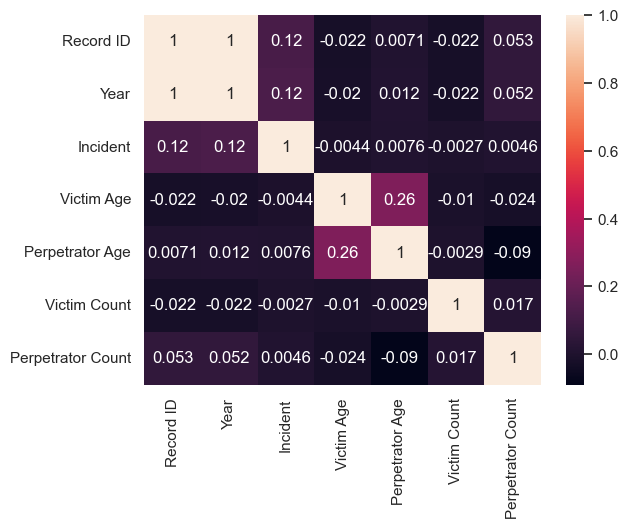

In [72]:
# Viziulize the correlation 
sns.heatmap(correlation,annot=True)

root
 |-- Record ID: integer (nullable = true)
 |-- Agency Code: string (nullable = true)
 |-- Agency Name: string (nullable = true)
 |-- Agency Type: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: string (nullable = true)
 |-- Incident: integer (nullable = true)
 |-- Crime Type: string (nullable = true)
 |-- Crime Solved: string (nullable = true)
 |-- Victim Sex: string (nullable = true)
 |-- Victim Age: integer (nullable = true)
 |-- Victim Race: string (nullable = true)
 |-- Perpetrator Sex: string (nullable = true)
 |-- Perpetrator Age: integer (nullable = true)
 |-- Perpetrator Race: string (nullable = true)
 |-- Relationship: string (nullable = true)
 |-- Weapon: string (nullable = true)
 |-- Victim Count: integer (nullable = true)
 |-- Perpetrator Count: integer (nullable = true)
 |-- Record Source: string (nullable = true)



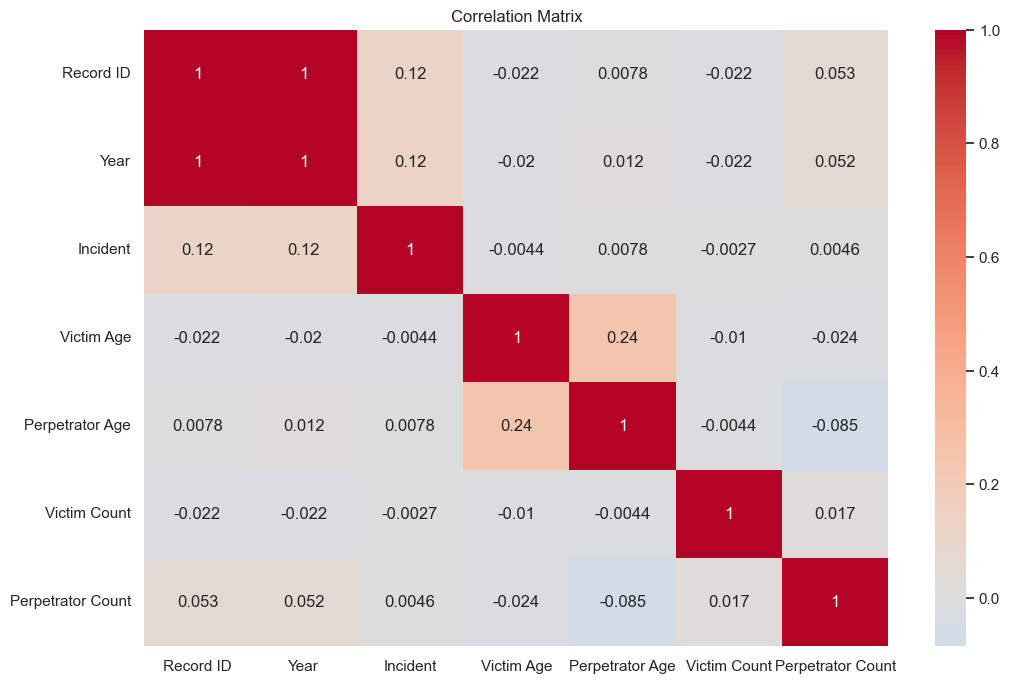

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.types import FloatType, IntegerType, DoubleType

# Create a Spark session (if not already created)
spark = SparkSession.builder.appName("CorrelationCalculation").getOrCreate()

# Assuming data2 is your PySpark DataFrame

# Check column types
data2.printSchema()

# Filter numeric columns
numeric_columns = [field.name for field in data2.schema.fields if isinstance(field.dataType, (FloatType, IntegerType, DoubleType))]

# Initialize a dictionary to store correlation results
correlation_dict = {}

# Compute pairwise correlations for numeric columns
for i in range(len(numeric_columns)):
    for j in range(i + 1, len(numeric_columns)):
        col1 = numeric_columns[i]
        col2 = numeric_columns[j]

        # Calculate correlation between col1 and col2
        try:
            correlation = data2.stat.corr(col1, col2)
            correlation_dict[(col1, col2)] = correlation
        except Exception as e:
            print(f"Error calculating correlation between {col1} and {col2}: {e}")

# Create a Pandas DataFrame for the correlation matrix
correlation_matrix = pd.DataFrame(index=numeric_columns, columns=numeric_columns)

# Fill the DataFrame with correlation values
for (col1, col2), correlation in correlation_dict.items():
    correlation_matrix.loc[col1, col2] = correlation
    correlation_matrix.loc[col2, col1] = correlation  # Since correlation is symmetric

# Set diagonal values to 1
for col in numeric_columns:
    correlation_matrix.loc[col, col] = 1

# Convert the correlation matrix to numeric type
correlation_matrix = correlation_matrix.astype(float)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# 8. Decision Tree

# One-Hot encoding
- The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly.

In [73]:
# create a copy of the clean data
data2_onehot = data2.copy()
# convert category value into an new column and assign it a value
data2_onehot = pd.get_dummies(data2_onehot, columns=['Victim Sex','Victim Race','Relationship'], 
                              prefix = ['Victim Sex','Victim Race','Relationship'])

print(data2_onehot.head())

   Record ID Agency Code Agency Name       Agency Type       City   State  \
0          1     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
1          2     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
2          3     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
3          4     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
4          5     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   

   Year    Month  Incident              Crime Type  ... Relationship_Neighbor  \
0  1980  January         1  Murder or Manslaughter  ...                     0   
1  1980    March         1  Murder or Manslaughter  ...                     0   
2  1980    March         2  Murder or Manslaughter  ...                     0   
3  1980    April         1  Murder or Manslaughter  ...                     0   
4  1980    April         2  Murder or Manslaughter  ...                     0   

   Relationship_Sister Relationship_Son  Relations

In [90]:
from pyspark.sql import SparkSession
from pyspark.sql.types import FloatType, IntegerType, DoubleType
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline
import pyspark.sql.functions as F

# Create a Spark session (if not already created)
spark = SparkSession.builder.appName("OneHotEncoding").getOrCreate()

# Assuming data2 is your PySpark DataFrame

# Check column types
data2.printSchema()

# Filter numeric columns
numeric_columns = [field.name for field in data2.schema.fields if isinstance(field.dataType, (FloatType, IntegerType, DoubleType))]

# List of categorical columns to encode
categorical_cols = ['Victim Sex', 'Victim Race', 'Relationship']

# Check for missing values in categorical columns
for col in categorical_cols:
    missing_count = data2.filter(F.col(col).isNull()).count()
    if missing_count > 0:
        print(f"Column '{col}' has {missing_count} missing values.")
        # Optionally handle missing values
        data2 = data2.fillna({col: 'Unknown'})

# Create StringIndexer and OneHotEncoder stages for each categorical column
indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_index") for col in categorical_cols]
encoders = [OneHotEncoder(inputCols=[f"{col}_index"], outputCols=[f"{col}_onehot"]) for col in categorical_cols]

# Create a pipeline with the stages
pipeline = Pipeline(stages=indexers + encoders)

# Fit and transform the data
model = pipeline.fit(data2)
data2_onehot = model.transform(data2)

# Drop the original categorical columns and index columns
data2_onehot = data2_onehot.drop(*[f"{col}_index" for col in categorical_cols])

# Show the result (specify the number of rows to display)
data2_onehot.show(truncate=False, n=10)

root
 |-- Record ID: integer (nullable = true)
 |-- Agency Code: string (nullable = true)
 |-- Agency Name: string (nullable = true)
 |-- Agency Type: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: string (nullable = true)
 |-- Incident: integer (nullable = true)
 |-- Crime Type: string (nullable = true)
 |-- Crime Solved: string (nullable = true)
 |-- Victim Sex: string (nullable = true)
 |-- Victim Age: integer (nullable = true)
 |-- Victim Race: string (nullable = true)
 |-- Perpetrator Sex: string (nullable = true)
 |-- Perpetrator Age: integer (nullable = true)
 |-- Perpetrator Race: string (nullable = true)
 |-- Relationship: string (nullable = true)
 |-- Weapon: string (nullable = true)
 |-- Victim Count: integer (nullable = true)
 |-- Perpetrator Count: integer (nullable = true)
 |-- Record Source: string (nullable = true)

Column 'Victim Race' has 6676 missing values.
Column 'Re

In [74]:
# drop the columns we will not use in the decision tree
dec_tree_cols = data2_onehot.drop(columns=['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Weapon', 'Perpetrator Count', 'Record Source'])


In [91]:
# List of columns to drop
columns_to_drop = ['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
                    'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
                    'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
                    'Weapon', 'Perpetrator Count', 'Record Source']

# Drop the specified columns
data2_dec_tree = data2_onehot.drop(*columns_to_drop)

# Show the result to verify
data2_dec_tree.show(truncate=False)

+----------+----------+-----------------------------+------------+------------+-----------------+------------------+-------------------+
|Victim Sex|Victim Age|Victim Race                  |Relationship|Victim Count|Victim Sex_onehot|Victim Race_onehot|Relationship_onehot|
+----------+----------+-----------------------------+------------+------------+-----------------+------------------+-------------------+
|Male      |14        |Native American/Alaska Native|Acquaintance|2           |(1,[0],[1.0])    |(4,[],[])         |(27,[1],[1.0])     |
|Male      |43        |White                        |Acquaintance|2           |(1,[0],[1.0])    |(4,[0],[1.0])     |(27,[1],[1.0])     |
|Female    |30        |Native American/Alaska Native|Unknown     |2           |(1,[],[])        |(4,[],[])         |(27,[0],[1.0])     |
|Male      |43        |White                        |Acquaintance|2           |(1,[0],[1.0])    |(4,[0],[1.0])     |(27,[1],[1.0])     |
|Female    |30        |Native American/Al

In [75]:
# add a target label we want to predict from clean data to the end of the dataframe
dec_tree_cols['Crime Solved'] = data2['Crime Solved']
# Create a dictionary to replace crimes solved with 1 and not solved with 0 
replace_map = {'Yes': 1,'No':0}
# Use the dictionary on a crimes solved column
dec_tree_cols = dec_tree_cols.replace({"Crime Solved": replace_map})
# display first 5 rows
dec_tree_cols.head()

Victim Age  Victim Count  Victim Sex_Female  Victim Sex_Male  \
0          14             2                  0                1   
1          43             2                  0                1   
2          30             2                  1                0   
3          43             2                  0                1   
4          30             2                  1                0   

   Victim Sex_Unknown  Victim Race_Asian/Pacific Islander  Victim Race_Black  \
0                   0                                   0                  0   
1                   0                                   0                  0   
2                   0                                   0                  0   
3                   0                                   0                  0   
4                   0                                   0                  0   

   Victim Race_Native American/Alaska Native  Victim Race_Unknown  \
0                                          1                    0   
1                                          0                    0   
2                                          1                    0   
3                                          0                    0   
4                                          1                    0   

   Victim Race_White  ...  Relationship_Sister  Relationship_Son  \
0                  0  ...                    0                 0   
1                  1  ...                    0                 0   
2                  0  ...                    0                 0   
3                  1  ...                    0                 0   
4                  0  ...                    0                 0   

   Relationship_Stepdaughter  Relationship_Stepfather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   Relationship_Stepmother  Relationship_Stepson  Relationship_Stranger  \
0                        0                     0                      0   
1                        0                     0                      0   
2                        0                     0                      0   
3                        0                     0                      0   
4                        0                     0                      0   

   Relationship_Unknown  Relationship_Wife  Crime Solved  
0                     0                  0             1  
1                     0                  0             1  
2                     1                  0             0  
3                     0                  0             1  
4                     1                  0             0  

[5 rows x 39 columns]

In [92]:
from pyspark.sql.functions import when, col

# Assuming data2 and data2_onehot are your PySpark DataFrames

# Add the 'Crime Solved' column to the DataFrame
data2_dec_tree = data2_onehot.withColumn('Crime Solved', col('Crime Solved'))

# Create a mapping dictionary to replace 'Yes' with 1 and 'No' with 0
replace_map = {'Yes': 1, 'No': 0}

# Apply the mapping to 'Crime Solved' column
data2_dec_tree = data2_dec_tree.withColumn('Crime Solved', 
                                           when(col('Crime Solved') == 'Yes', 1)
                                           .otherwise(0))

# Show the first 5 rows
data2_dec_tree.show(5, truncate=False)

+---------+-----------+-----------+----------------+---------+------+----+-------+--------+----------------------+------------+----------+----------+-----------------------------+---------------+---------------+-----------------------------+------------+-------------+------------+-----------------+-------------+-----------------+------------------+-------------------+
|Record ID|Agency Code|Agency Name|Agency Type     |City     |State |Year|Month  |Incident|Crime Type            |Crime Solved|Victim Sex|Victim Age|Victim Race                  |Perpetrator Sex|Perpetrator Age|Perpetrator Race             |Relationship|Weapon       |Victim Count|Perpetrator Count|Record Source|Victim Sex_onehot|Victim Race_onehot|Relationship_onehot|
+---------+-----------+-----------+----------------+---------+------+----+-------+--------+----------------------+------------+----------+----------+-----------------------------+---------------+---------------+-----------------------------+------------+----

In [76]:
# Overview of the columns in the data frame
dec_tree_cols.columns

Index(['Victim Age', 'Victim Count', 'Victim Sex_Female', 'Victim Sex_Male',
       'Victim Sex_Unknown', 'Victim Race_Asian/Pacific Islander',
       'Victim Race_Black', 'Victim Race_Native American/Alaska Native',
       'Victim Race_Unknown', 'Victim Race_White', 'Relationship_Acquaintance',
       'Relationship_Boyfriend', 'Relationship_Boyfriend/Girlfriend',
       'Relationship_Brother', 'Relationship_Common-Law Husband',
       'Relationship_Common-Law Wife', 'Relationship_Daughter',
       'Relationship_Employee', 'Relationship_Employer',
       'Relationship_Ex-Husband', 'Relationship_Ex-Wife',
       'Relationship_Family', 'Relationship_Father', 'Relationship_Friend',
       'Relationship_Girlfriend', 'Relationship_Husband',
       'Relationship_In-Law', 'Relationship_Mother', 'Relationship_Neighbor',
       'Relationship_Sister', 'Relationship_Son', 'Relationship_Stepdaughter',
       'Relationship_Stepfather', 'Relationship_Stepmother',
       'Relationship_Stepson', 'Rela

In [93]:
from pyspark.sql.functions import when, col

# Assuming data2 and data2_onehot are your PySpark DataFrames

# Add the 'Crime Solved' column to the DataFrame
data2_dec_tree = data2_onehot.withColumn('Crime Solved', col('Crime Solved'))

# Create a mapping dictionary to replace 'Yes' with 1 and 'No' with 0
replace_map = {'Yes': 1, 'No': 0}

# Apply the mapping to 'Crime Solved' column
data2_dec_tree = data2_dec_tree.withColumn('Crime Solved', 
                                           when(col('Crime Solved') == 'Yes', 1)
                                           .otherwise(0))

# Print the schema of the DataFrame to get an overview of the columns
data2_dec_tree.printSchema()

# Get and print the column names
column_names = data2_dec_tree.columns
print(column_names)

root
 |-- Record ID: integer (nullable = true)
 |-- Agency Code: string (nullable = true)
 |-- Agency Name: string (nullable = true)
 |-- Agency Type: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: string (nullable = true)
 |-- Incident: integer (nullable = true)
 |-- Crime Type: string (nullable = true)
 |-- Crime Solved: integer (nullable = false)
 |-- Victim Sex: string (nullable = true)
 |-- Victim Age: integer (nullable = true)
 |-- Victim Race: string (nullable = false)
 |-- Perpetrator Sex: string (nullable = true)
 |-- Perpetrator Age: integer (nullable = true)
 |-- Perpetrator Race: string (nullable = true)
 |-- Relationship: string (nullable = false)
 |-- Weapon: string (nullable = true)
 |-- Victim Count: integer (nullable = true)
 |-- Perpetrator Count: integer (nullable = true)
 |-- Record Source: string (nullable = true)
 |-- Victim Sex_onehot: vector (nullable = true)
 |--

## What is a decision tree?

A **decision tree** is a graph that uses a branching method to illustrate every possible outcome of a decision.

The **value** line in each box is telling us how many samples at that node fall into each category, in order. That's why, in each box, the numbers in value add up to the number shown in sample. For instance, in relationship unknown box, 133180,313737=446917 (number of samples). So this means if you reach this node, there were 133180 data points in category 1, and 313737 in category 2.

**Gini index** or Gini impurity measures the degree or probability of a particular variable being wrongly classified when it is randomly chosen. 

Each element of the domain of the classification is called a **class**. A decision tree or a classification tree is a tree in which each internal (non-leaf) node is labeled with an input feature. The splitting is based on a set of splitting rules based on classification features.

In [77]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import accuracy_score, classification_report,roc_curve,roc_auc_score #Import scikit-learn metrics module for accuracy calculation

In [78]:
#split dataset in features and target variable
feature_cols = ['Victim Age', 'Victim Count', 'Victim Sex_Female', 'Victim Sex_Male',
       'Victim Sex_Unknown', 'Victim Race_Asian/Pacific Islander',
       'Victim Race_Black', 'Victim Race_Native American/Alaska Native',
       'Victim Race_Unknown', 'Victim Race_White', 'Relationship_Acquaintance',
       'Relationship_Boyfriend', 'Relationship_Boyfriend/Girlfriend',
       'Relationship_Brother', 'Relationship_Common-Law Husband',
       'Relationship_Common-Law Wife', 'Relationship_Daughter',
       'Relationship_Employee', 'Relationship_Employer',
       'Relationship_Ex-Husband', 'Relationship_Ex-Wife',
       'Relationship_Family', 'Relationship_Father', 'Relationship_Friend',
       'Relationship_Girlfriend', 'Relationship_Husband',
       'Relationship_In-Law', 'Relationship_Mother', 'Relationship_Neighbor',
       'Relationship_Sister', 'Relationship_Son', 'Relationship_Stepdaughter',
       'Relationship_Stepfather', 'Relationship_Stepmother',
       'Relationship_Stepson', 'Relationship_Stranger', 'Relationship_Unknown',
       'Relationship_Wife']
X = dec_tree_cols[feature_cols] # Features
y = dec_tree_cols['Crime Solved'] # Target variable

In [79]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

We had to adjust the size of the tree as it was innitially too complicated. So we specified the maximum depth and the maximum number of leaf nodes. The **maximum depth** of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. Grow a tree with **max_leaf_nodes** in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

In [80]:
# Create Decision Tree classifer object
# adjust the model size
clf = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=10)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

The model accuracy is 83.38%. Great! But accuracy can be biased so we will create a confusion matrix.

In [81]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8338232299764536


### Results
Based on the data the model can predict with 66% *accuracy* for when the crime will not be solved and 96% when it will be solved. 

*Recall* tells us, out of all the positive classes, how much we predicted correctly. It should be high as possible. For us the recall to predict whether the victim crime will not be solved is 93%, and 79% when it will be. 

*F-Score:* It is difficult to compare two models with low precision and high recall or vice versa. So to make them comparable, we use F-Score. F-score helps to measure Recall and Precision at the same time. It uses Harmonic Mean in place of Arithmetic Mean by punishing the extreme values more. For cases that will not be solved is 77% and those which will be is 87%. 

From these we can see that we have a solid model to predict whether the crime will be solved based on the victim data. 

In [82]:
# print the classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.93      0.77     57102
           1       0.96      0.79      0.87    134435

    accuracy                           0.83    191537
   macro avg       0.81      0.86      0.82    191537
weighted avg       0.87      0.83      0.84    191537



An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:
- True Positive Rate (trp)
- False Positive Rate (fpr)

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives.

AUC stands for "Area under the ROC Curve. That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


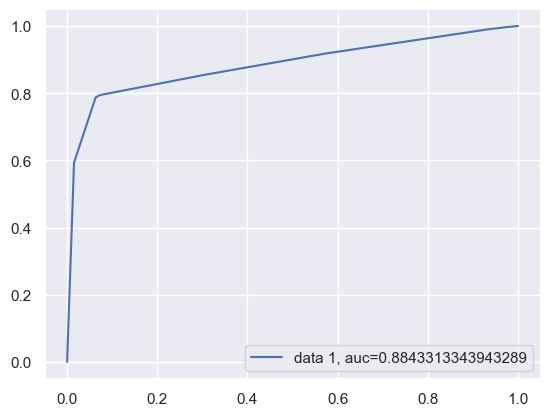

In [83]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

What is the value of the area under the roc curve (AUC) to conclude that a classifier is excellent? The AUC value lies between 0.5 to 1 where 0.5 denotes a bad classifer and 1 denotes an excellent classifier. 

Our classifier is quite good.

In [84]:
print('False positive rate is: ',fpr)
print('True positive rate is: ',tpr)
print('Receiver operating characteristic curve is: ',auc)

False positive rate is:  [0.         0.01535848 0.06309761 0.06332528 0.0707681  0.07565409
 0.30620644 0.5749711  0.93746279 0.97735631 1.        ]
True positive rate is:  [0.         0.593283   0.78699743 0.78725034 0.79329788 0.79518727
 0.85502287 0.91848105 0.99088779 0.99708409 1.        ]
Receiver operating characteristic curve is:  0.8843313343943289


Here we display the tree, but we need better graphics. So, we will need to use the model called graphviz that will let us display a nice chart. 

[Text(0.32142857142857145, 0.9285714285714286, 'x[36] <= 0.5\ngini = 0.418\nsamples = 446917\nvalue = [133180, 313737]'),
 Text(0.14285714285714285, 0.7857142857142857, 'x[35] <= 0.5\ngini = 0.065\nsamples = 256038\nvalue = [8558, 247480]'),
 Text(0.07142857142857142, 0.6428571428571429, 'gini = 0.022\nsamples = 188213\nvalue = [2053, 186160]'),
 Text(0.21428571428571427, 0.6428571428571429, 'gini = 0.173\nsamples = 67825\nvalue = [6505, 61320]'),
 Text(0.5, 0.7857142857142857, 'x[0] <= 6.5\ngini = 0.453\nsamples = 190879\nvalue = [124622, 66257]'),
 Text(0.35714285714285715, 0.6428571428571429, 'x[0] <= 0.5\ngini = 0.476\nsamples = 4201\nvalue = [1636, 2565]'),
 Text(0.2857142857142857, 0.5, 'gini = 0.499\nsamples = 1282\nvalue = [663, 619]'),
 Text(0.42857142857142855, 0.5, 'gini = 0.444\nsamples = 2919\nvalue = [973, 1946]'),
 Text(0.6428571428571429, 0.6428571428571429, 'x[0] <= 22.5\ngini = 0.45\nsamples = 186678\nvalue = [122986, 63692]'),
 Text(0.5714285714285714, 0.5, 'gini = 0

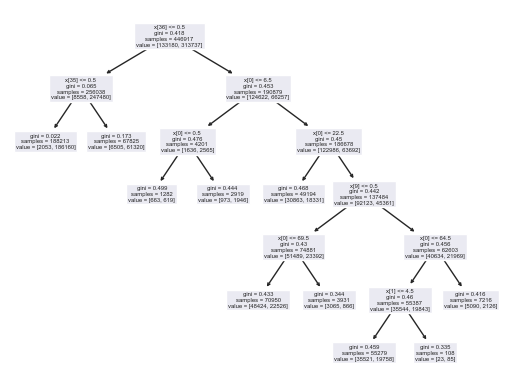

In [85]:
# Display the tree 
plot_tree(clf)

## Decision Tree Using Graphviz

In [86]:
!pip install graphviz
!pip install six
!pip install pydotplus
import graphviz  # lets us display the tree in Jupyter
from sklearn.tree import export_graphviz
from io import StringIO  # Use StringIO from io module
from IPython.display import Image  
import pydotplus
import six
from IPython.display import Image  
import pydotplus


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


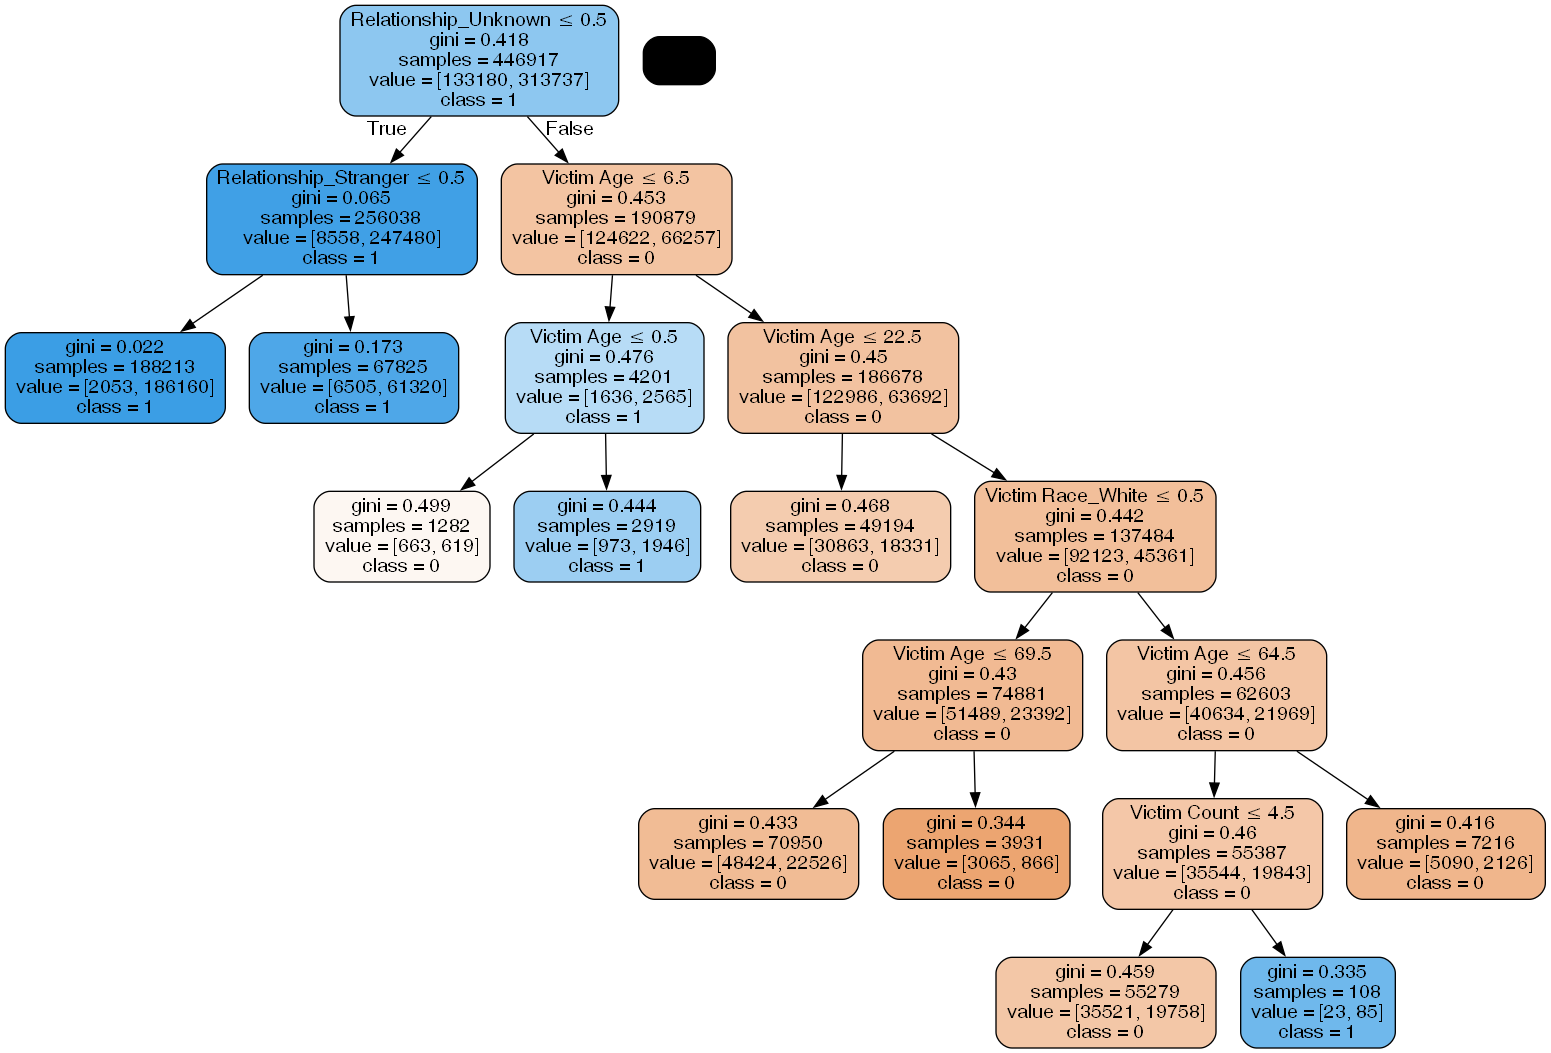

In [87]:
# StringIO() --> Read and write strings as files
# save it in a variable 
dot_data = StringIO()
# write clf data into a file, out_file = use StringIO() function
# filled = when true paint nodes to indicate majority class for classification, extremity of values for regression,
    # or purity of node for multi-output 
# Rounded = When set to True, draw node boxes with rounded corners and use Helvetica fonts instead of Times-Roman
# When set to True, do not ignore special characters for PostScript compatibility
# feature_names = Names of each of the features (0 and 1 for us)
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
# convert file to png 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# specify the name of the png file
graph.write_png('./crime_solved.png')
# display the decision tree in jupiter 
Image(graph.create_png())